# **Evaluating Intraregional Migration Patterns in the Philippines through Machine Learning Algorithms**

Data Science 103 Final Project by Group 7:
 * Dionisio, Geryco Eugynn
 * Navarro, Carl Gabriel
 * Que, Michael Dave
 * Tagabucba, Hanz Adrian


# Introduction

## Relevance
An article from the Business Mirrors mentioned that Metro Manila has been a core area for commerce and education in the Philippines, and that job seekers within and outside Metro Manila travel to the city to seek employment. However, while these findings reflect the growth and development in the capital, they also reveal the underlying disparities within the Philippines, particularly in the unequal development in distant provinces. For instance, in 2022, data from the Philippine Institute of Development Studies (n.d.) shows that the Gross Regional Domestic Product (GRDP) per capita in Metro Manila was substantially higher than other areas, being double the size of the national average and about eight times higher than the region with the lowest GRDP per capita. This stark developmental imbalance drives people from rural areas to relocate to Metro Manila in search of better job opportunities and higher wages (Dela Cruz, 2019). However, this intraregional migration poses problems with proper utilization of distant provinces with rich natural resources and talent. With these factors in mind, there is evidence to suggest a significant problem in the Philippines where other provinces are underutilized and left out but who can also have a potential to deliver the opportunities that Metro Manila offers. Thus, this project is compelled to contribute to this research by understanding internal and external factors that influence intraregional migration. More specification, we answer the research question: **What makes a province an ideal location for Filipinos to relocate?**. This research utilizes survey-level  data from the 2018 National Migration Survey sourced from the Philippine Statistics Authority (PSA), which captures comprehensive details on the migration and socio-economic patterns of Filipinos.

## Objectives
 1. **Identify Key Determinants:** To determine the key factors influencing relocation decisions, focusing variables such as personal factors related to income, gender, and provincial factors such as poverty rate, number of disasters, population density, unemployment rate, and their risks of natural distasters.
 2. **Develop Predictive Models:** To apply machine learning algorithms to create predictive models to determine the ideal provinces for relocation based on the identified determinants. The three machine learning models utilized were KNN Classification, Random Forest Classification, and Logistic Regression.
 3. **Analyze Results:** To evaluate the effectiveness of different machine learning models in predicting ideal relocation provinces (whether machine learning models would predict at a higher accuracy than traditional econometrics methodologies) and to identify which factors weigh more heavily in these predictions.



# Methodological Framework

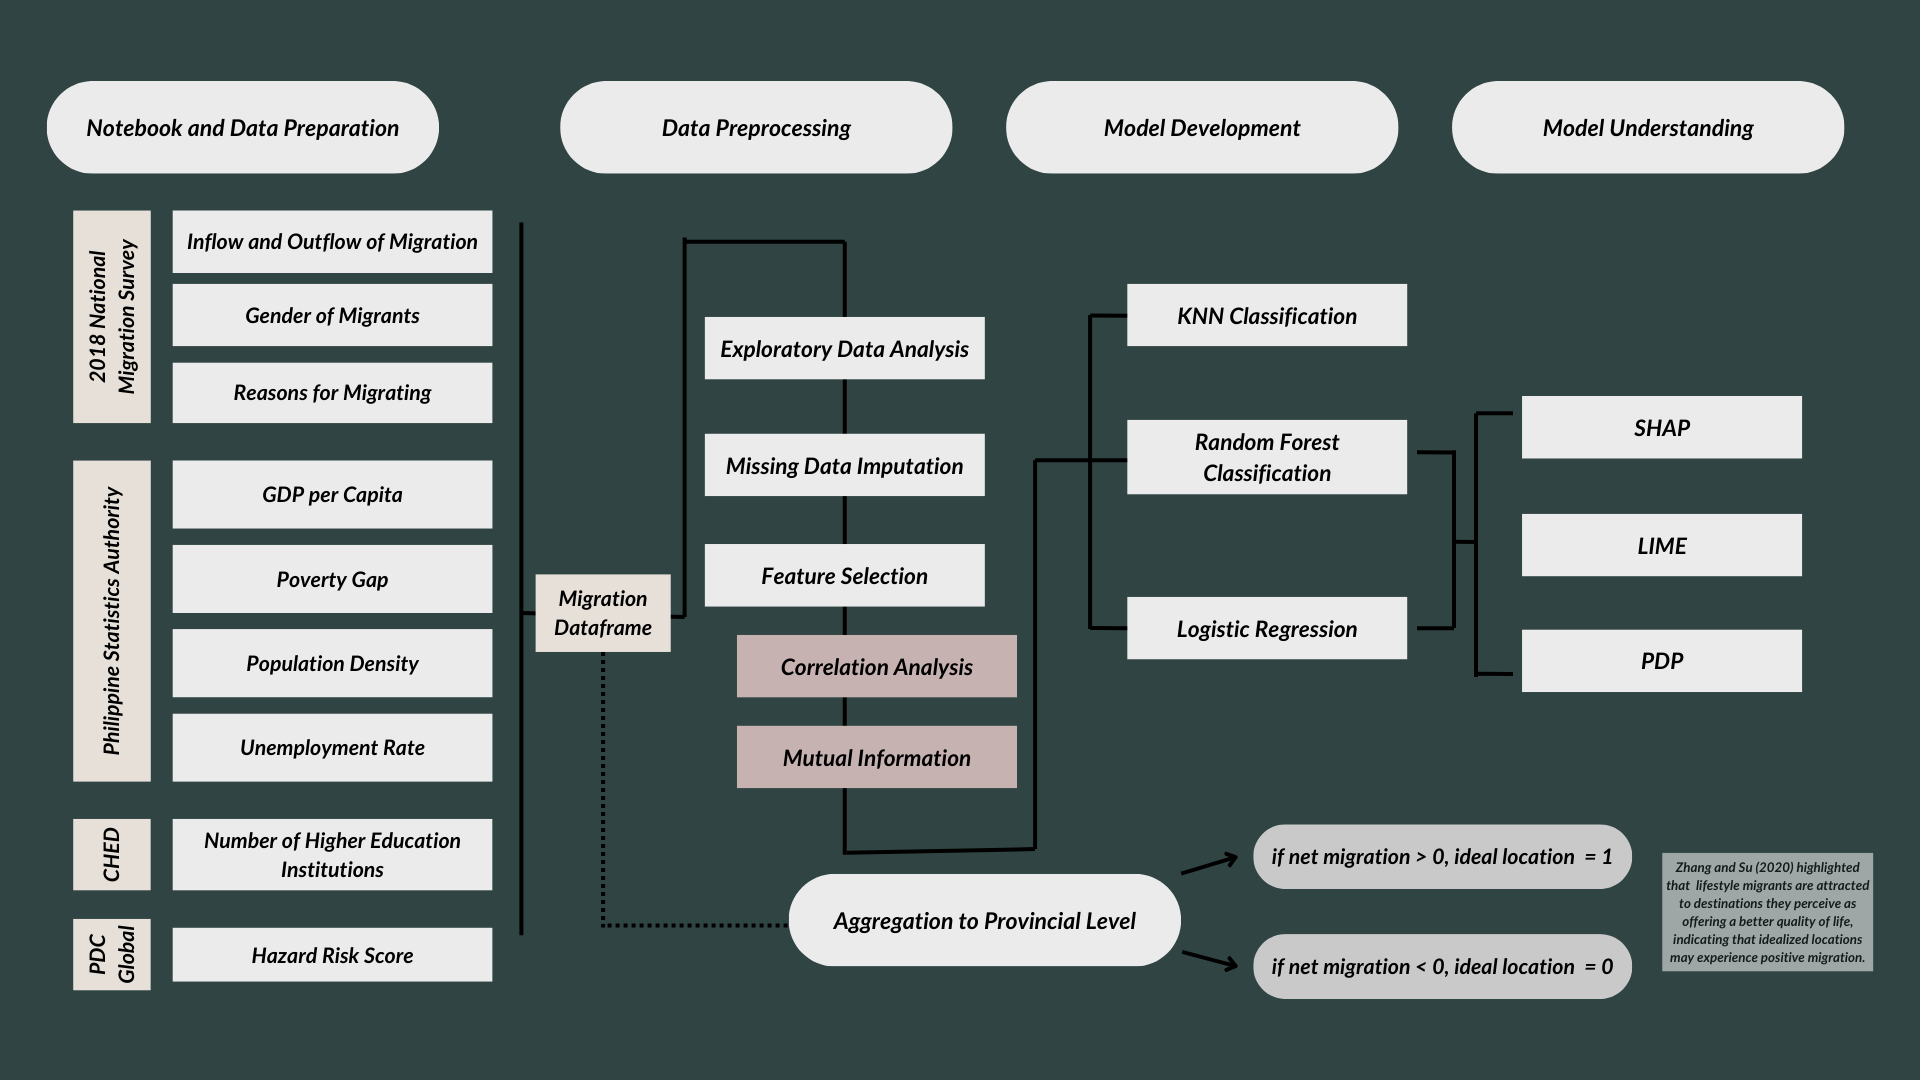

To answer the research question, the group will adopt a supervised classification algorithm. This methodological framework outlines a comprehensive process for analyzing migration data, beginning with **data preparation** using sources such as the 2018 National Migration Survey, Philippine Statistics Authority, CHED, and PDC Global. The idea is to identify provinces in the Philippines that have a positive net migration from 2013 to 2018. Whether these provinces have a net positive (Ideal location) migration or not (Not Ideal Location), this target feature of each province will be predicted using  key variables including gender, reasons for migration, GDP per capita, poverty gap, population density, unemployment rate, number of higher education institutions, and hazard risk scores. The **data preprocessing** phase involves exploratory data analysis (EDA) to examine patterns and trends, addressing missing values through imputation, and selecting relevant features using correlation analysis and mutual information to ensure robust model input. In the **model development** stage, three classification models, namely K-Nearest Neighbors (KNN), Random Forest, and Logistic Regression, were implemented to predict migration patterns. Finally, the **model understanding** phase leveraged interpretability tools such as SHAP (SHapley Additive exPlanations), LIME (Local Interpretable Model-agnostic Explanations), and Partial Dependence Plots (PDP) to explain the outputs of these models. This structured approach emphasizes the importance of quality data preparation, rigorous feature selection, and interpretable machine learning models, providing actionable insights into migration trends while addressing key socioeconomic factors influencing intraregional mobility in the Philippines.

# **1. Notebook Preparation**

The primary dataset that the project utilizes was the **2018 National Migration Survey**. The survey data by the Philippines Statistics Authority that has information on the characteristics of employed Filipinos working abroad and in the Philippines, and their migration patterns from 2013 to 2018.

This script processes the dataset to analyze residential movement and reasons for migration. After mounting Google Drive, libraries such as pandas, numpy, and scikit-learn were imported. The dataset was loaded and cleaned by replacing empty strings with NaN and filtering rows.

To identify intraregional migration patterns, functions extracted the most recent and second-most recent residences at the individual level. From here, the final output of the dataset is a cleaned dataframe which has information on employment and social characteristics of individuals, including their current residence and the previous residence where they stayed. The code also links the current residence with reasons for moving of the individual.

## 1.A Mount Googe Drive and Importation of Libraries

### **CODE**

In [ ]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Install necessary libraries
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d4ebe0b70a2674563dc551ee0e1558336cee051ad631b0c102ceda6debdd3762
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from scipy import stats
import shap
import lime
import lime.lime_tabular
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from scipy.stats import entropy
from sklearn.datasets import make_classification

### **ANALYSIS OF CODE**

The group utilized a shared google drive folder to store and use the necessary datasets of the project. To proceed with the study, the given scripts also import libraries essential for data analysis and machine learning tasks:

- **Pandas and NumPy**: For data manipulation and numerical operations.
- **Scikit-learn**: For preprocessing (e.g., encoding, scaling, imputing), model building (logistic regression, KNN, Random Forest), and evaluation (classification reports, confusion matrices).
- **Matplotlib and Seaborn**: For data visualization.
- **Statsmodels**: For statistical analysis.
- **Scipy**: For scientific computations.
- **KNNImputer and SimpleImputer**: For handling missing data.
- **OneHotEncoder and LabelEncoder**: For encoding categorical data.
- **StandardScaler**: For feature scaling.
These tools together enable end-to-end analysis, from cleaning data to building and evaluating predictive models.

## 1.B Importing and Cleaning 2018 National Migration Survey

### **CODE**

In [ ]:
# Locate and Read CSV file of 2018 National Migration Survey
file_path = '/content/drive/Shareddrives/DATA103_DATA/NMS PUF 2018  Individual.csv'
raw_df = pd.read_csv(file_path)
raw_df

<ipython-input-5-2c167ba3663a>:3: DtypeWarning: Columns (10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,42,55,62,686,720,941,1022) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(file_path)


HHID  ALINEHH  B200EM  B201MO  B201DAY  B201YR  B202AGE  B202SEX  \
0          2        2       4       5       18    1959       59        2   
1          2        1       1       1        8    1958       60        1   
2          3        1       3       4        4    1966       52        1   
3          3        3       1       9       29    1993       24        1   
4          4        1       1       1        1    1987       31        1   
...      ...      ...     ...     ...      ...     ...      ...      ...   
46382  34932        1       1       4       25    1979       39        1   
46383  34933        3       4      12       12    1988       29        2   
46384  34933        1       1       8        2    1972       46        2   
46385  34934        1       1       2        1    1978       40        1   
46386  34935        7       1      10       13    1999       18        1   

       B203FIL B204CTRY  ... J1011FILEDCASE  J1011COMFORTED J1011OTH  \
0            1           ...                                           
1            1           ...                                           
2            1           ...                                           
3            1           ...                                           
4            1           ...                                           
...        ...      ...  ...            ...             ...      ...   
46382        1           ...                                           
46383        1           ...                                           
46384        1           ...                                           
46385        1           ...                                           
46386        1           ...                                           

      J1012THREATENED J1012AFRAID J1012NOFINSUPP J1012NOONELISTEN  \
0                                                                   
1                                                                   
2                                                                   
3                                                                   
4                                                                   
...               ...         ...            ...              ...   
46382                                                               
46383                                                               
46384                                                               
46385                                                               
46386                                                               

      J1012EMBARASSED J1012OTH     IND_WGTS  
0                                410.612394  
1                                402.787924  
2                                569.424278  
3                               1353.350178  
4                               1054.379222  
...               ...      ...          ...  
46382                            644.997181  
46383                            643.790546  
46384                            278.350207  
46385                            666.819920  
46386                           1602.243347  

[46387 rows x 1075 columns]

To process the survey level data into provincial level data, we needed to calculate the inflows and outflows of provinces in the Philippines. Thus, we identified in which provinces were each individual a "Current Residence" or "Previous Residence". The following series of codes attempt to collect these features based on the orginal copy of the survey of the dataset.

The dataframe has 3 essential features:

 * **First, there was a feature that indicates the current residence that the individual lives in.**
  *  This is accompanied with employment characteristics such as occupation and salary in the residence but there was no information on the previous residence they came from.
  * However, there is information on their employment characteristics in their previous residence.

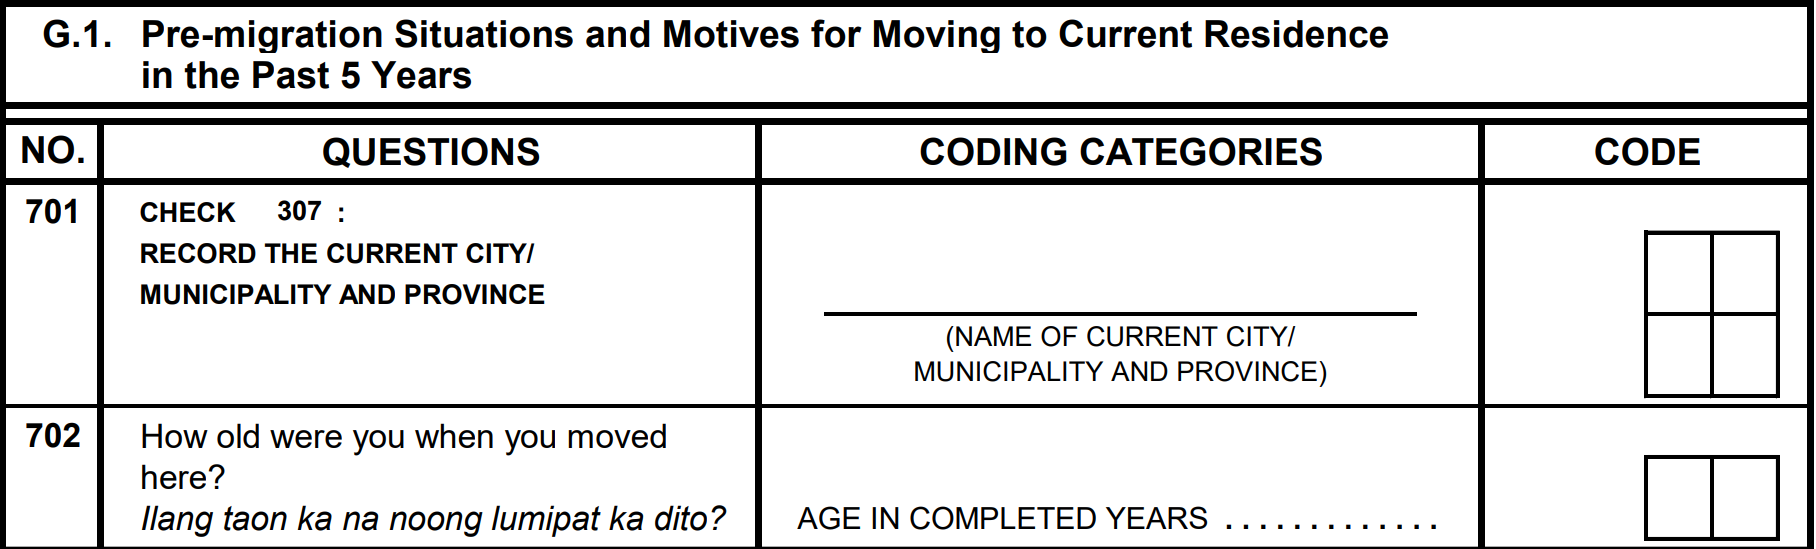

 * **Second, there was a feature that indicates the residence that the individual lived in 5 years ago.**

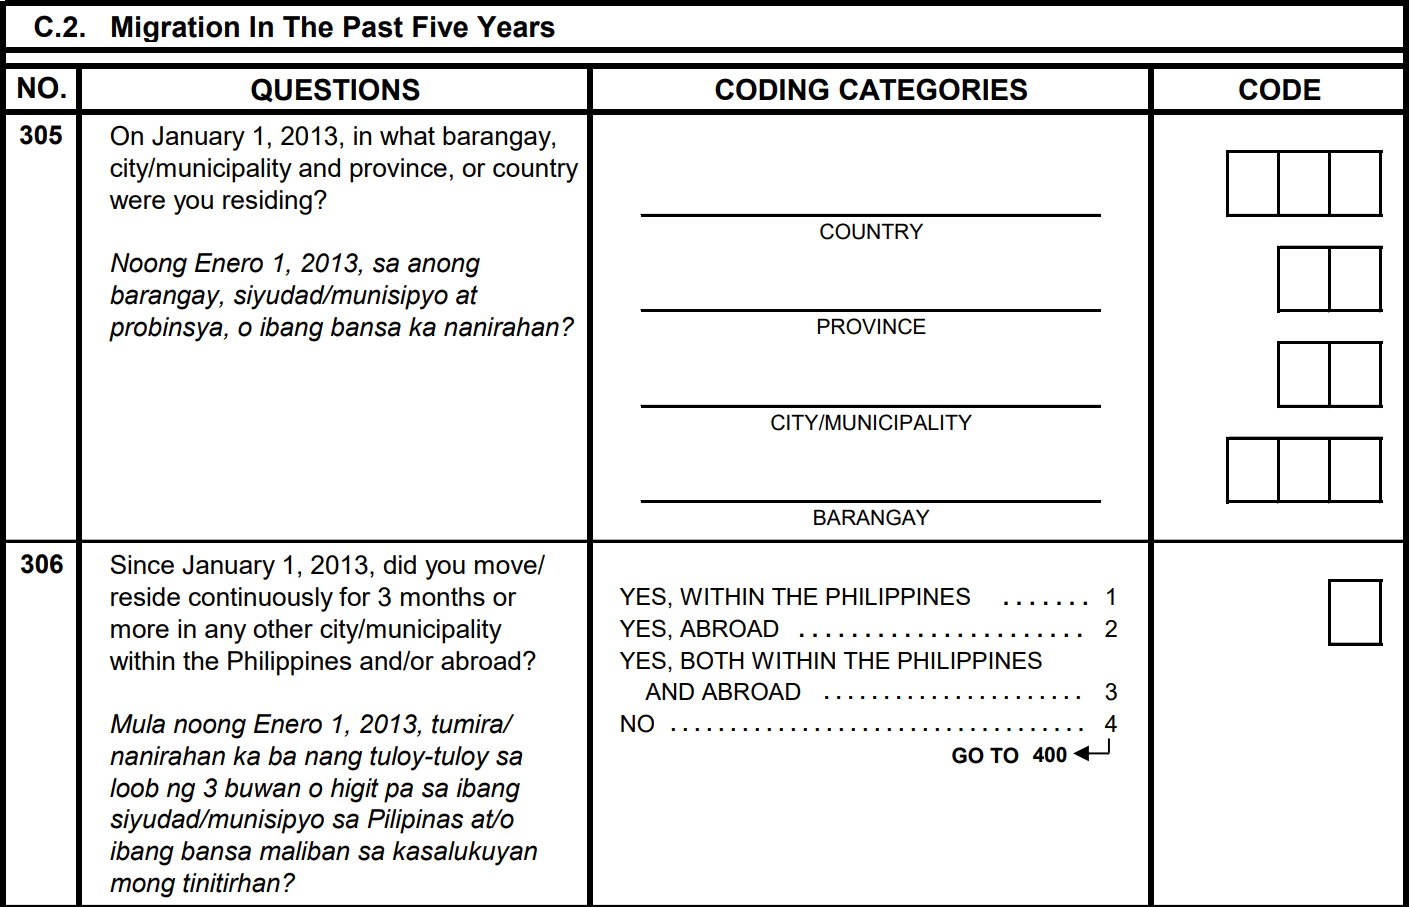

 * **Third, there were a series of columns from C307PROV1 to C307PROV13 that indicate the locations that the individual relocated since in the past 5 years**

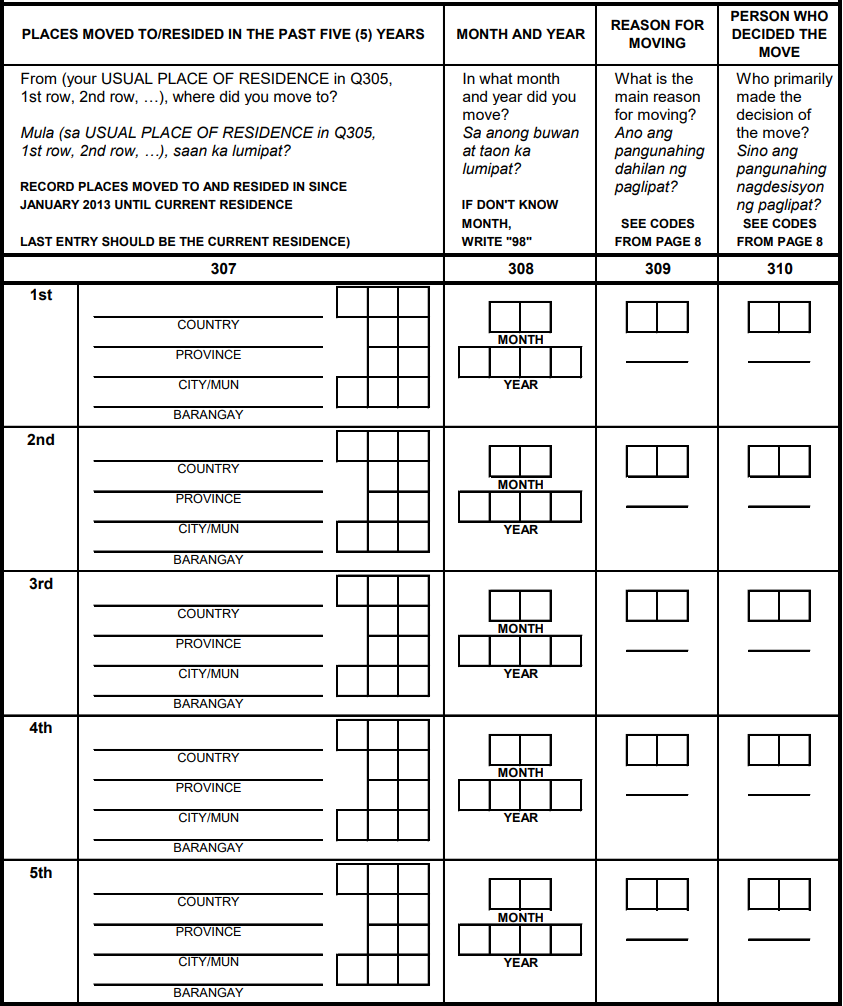

Thus, to correctly identify the "Current Residence" and "Previous Residence" of an individual, we developed a code that iterated each sequence of intraregional migration for each individual from the third features. From this, current province and previous province which the individual resided in can be identified, and can be cross checked with the first feature to check for inconsistencies with the answers.

In [ ]:
# This following code processed the relocation pattern of the individual using a helper function to extract the most recent (current) and second-most recent (previous) non-NaN province values for each row.
# The function is applied to the DataFrame, creating two new columns, Current_Residence and Previous_Residence, which store these values.

#List columns that indicate which province did the individual relocate for Nx times
province_columns = ['C307PROV1', 'C307PROV2', 'C307PROV3', 'C307PROV4',
                    'C307PROV5', 'C307PROV6', 'C307PROV7', 'C307PROV8',
                    'C307PROV9', 'C307PROV10', 'C307PROV11', 'C307PROV12',
                    'C307PROV13']

# To process the data and ensure the functions would run properly, the following code replaced empty strings with NaN
raw_df[province_columns] = raw_df[province_columns].replace(r'^\s*$', np.nan, regex=True)
raw_df['C305PROV'] = raw_df['C305PROV'].replace(r'^\s*$', np.nan, regex=True)

# Filter rows where C307PROV1 is not NaN since no value suggests that the individual did not relocate in the Philippines in the past 5 years
raw_df = raw_df[raw_df['C307PROV1'].notna()]

# Define a helper function to extract the last and second-to-last non-NaN values from a row
def extract_last_and_second_last(row, columns):
    # Get all non-NaN values from the specified columns as a list
    non_na_values = row[columns].dropna().tolist()

    # Assign the last non-NaN value as the current residence
    current_residence = non_na_values[-1] if non_na_values else None

    # Determine the previous residence based on the current residence
    if current_residence == row['C307PROV1']:
        previous_residence = row['C305PROV']  # Use 'C305PROV' if the current residence matches 'C307PROV1'
    else:
        # Use the second-to-last non-NaN value if available
        previous_residence = non_na_values[-2] if len(non_na_values) > 1 else None

    # Return both current and previous residences as a Series
    return pd.Series([current_residence, previous_residence])

# Apply the function to create Current and Previous Residence
raw_df[['Current_Residence', 'Previous_Residence']] = raw_df.apply(
    lambda row: extract_last_and_second_last(row, province_columns), axis=1
)

raw_df


<ipython-input-6-228c075ba15a>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_df[province_columns] = raw_df[province_columns].replace(r'^\s*$', np.nan, regex=True)
<ipython-input-6-228c075ba15a>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df[['Current_Residence', 'Previous_Residence']] = raw_df.apply(
<ipython-input-6-228c075ba15a>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

HHID  ALINEHH  B200EM  B201MO  B201DAY  B201YR  B202AGE  B202SEX  \
16        12        4       1       8       13    2001       16        1   
25        20        2       3       5       20    1972       46        2   
44        31        3       1       7       20    1988       30        2   
85        54        2       3       9       30    1984       33        2   
95        63        2       1       2       14    1982       36        2   
...      ...      ...     ...     ...      ...     ...      ...      ...   
46366  34920        1       1       8       17    1993       24        1   
46367  34921        1       1       9        9    1985       32        1   
46377  34928        8       1      10       17    1991       26        2   
46379  34930        1       1       5        7    1953       65        1   
46386  34935        7       1      10       13    1999       18        1   

       B203FIL B204CTRY  ... J1011OTH  J1012THREATENED J1012AFRAID  \
16           1           ...                                         
25           1           ...        0                                
44           1           ...                                         
85           1           ...                                         
95           1           ...                                         
...        ...      ...  ...      ...              ...         ...   
46366        1           ...                         0           1   
46367        1           ...                         0           1   
46377        1           ...                                         
46379        1           ...                                         
46386        1           ...                                         

      J1012NOFINSUPP J1012NOONELISTEN J1012EMBARASSED J1012OTH     IND_WGTS  \
16                                                              1288.884198   
25                                                               513.102153   
44                                                               691.912269   
85                                                               582.461381   
95                                                               766.901022   
...              ...              ...             ...      ...          ...   
46366              0                0               0        0   335.288043   
46367              0                0               1        0   376.946567   
46377                                                            648.068382   
46379                                                            220.010448   
46386                                                           1602.243347   

      Current_Residence Previous_Residence  
16                   28                 28  
25                   28                 21  
44                   28                 39  
85                   28                 31  
95                   28                 74  
...                 ...                ...  
46366                59                 31  
46367                59                 74  
46377                59                 04  
46379                59                 04  
46386                59                 39  

[3542 rows x 1077 columns]

In [ ]:
# The following code then collects the reasons for moving in current residence
# A helper function is needed to be created because similarly, each migration was given a reason to move from C309RSN1 to C309RSN13

# List of columns representing reasons for moving
reason_columns = ['C309RSN1', 'C309RSN2', 'C309RSN3', 'C309RSN4', 'C309RSN5', 'C309RSN6',
                  'C309RSN7', 'C309RSN8', 'C309RSN9', 'C309RSN10', 'C309RSN11', 'C309RSN12', 'C309RSN13']

# Define a function to extract the reason for moving based on provinces and reasons
def extract_reason_for_moving(row, province_columns, reason_columns):
    # Get non-NaN values for provinces and reasons
    non_na_provinces = row[province_columns].dropna().tolist()
    non_na_reasons = row[reason_columns].dropna().tolist()

    # Determine the current residence (last non-NaN province)
    current_residence = non_na_provinces[-1] if non_na_provinces else None
    reason_for_moving = None  # Default to None if no reason is found

    # If there is a current residence, try to find a corresponding reason
    if current_residence:
        # Get the index of the current residence in the province list
        current_index = non_na_provinces.index(current_residence)

        # Ensure a corresponding reason exists at the same index
        if current_index < len(non_na_reasons):
            reason_for_moving = non_na_reasons[current_index]

    # Return the reason for moving as a Series
    return pd.Series([reason_for_moving])

# Apply the function to extract the reason for moving and create a new column
raw_df['ReasonForMoving'] = raw_df.apply(
    lambda row: extract_reason_for_moving(row, province_columns, reason_columns)[0], axis=1
)

# Display the final DataFrame with selected columns
raw_df[['Current_Residence', 'Previous_Residence', 'ReasonForMoving', 'C305PROV',
        'C307PROV1', 'C307PROV2', 'C307PROV3', 'C307PROV4', 'C307PROV5',
        'C307PROV6', 'C307PROV7', 'C307PROV8', 'C307PROV9', 'C307PROV10',
        'C307PROV11', 'C307PROV12', 'C307PROV13', 'C309RSN1', 'C309RSN2',
        'C309RSN3', 'C309RSN4', 'C309RSN5', 'C309RSN6', 'C309RSN7', 'C309RSN8',
        'C309RSN9', 'C309RSN10', 'C309RSN11', 'C309RSN12', 'C309RSN13']]


<ipython-input-7-ffccf1021134>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['ReasonForMoving'] = raw_df.apply(


Current_Residence Previous_Residence ReasonForMoving C305PROV C307PROV1  \
16                   28                 28              08       28        28   
25                   28                 21              02      NaN        21   
44                   28                 39              12       39        28   
85                   28                 31              02      NaN        31   
95                   28                 74              14       74        28   
...                 ...                ...             ...      ...       ...   
46366                59                 31              04       59        31   
46367                59                 74              11       74        59   
46377                59                 04              01       04        59   
46379                59                 04              02       04        59   
46386                59                 39              90       39        39   

      C307PROV2 C307PROV3 C307PROV4 C307PROV5 C307PROV6  ... C309RSN4  \
16          NaN       NaN       NaN       NaN       NaN  ...            
25           28       NaN       NaN       NaN       NaN  ...            
44          NaN       NaN       NaN       NaN       NaN  ...            
85          NaN        28       NaN       NaN       NaN  ...            
95          NaN       NaN       NaN       NaN       NaN  ...            
...         ...       ...       ...       ...       ...  ...      ...   
46366        59       NaN       NaN       NaN       NaN  ...            
46367       NaN       NaN       NaN       NaN       NaN  ...            
46377       NaN       NaN       NaN       NaN       NaN  ...            
46379       NaN       NaN       NaN       NaN       NaN  ...            
46386        59       NaN       NaN       NaN       NaN  ...            

      C309RSN5 C309RSN6 C309RSN7 C309RSN8 C309RSN9  C309RSN10 C309RSN11  \
16                                                                        
25                                                                        
44                                                                        
85                                                                        
95                                                                        
...        ...      ...      ...      ...      ...        ...       ...   
46366                                                                     
46367                                                                     
46377                                                                     
46379                                                                     
46386                                                                     

      C309RSN12 C309RSN13  
16                         
25                         
44                         
85                         
95                         
...         ...       ...  
46366                      
46367                      
46377                      
46379                      
46386                      

[3542 rows x 30 columns]

### **ANALYSIS OF CODE**

The initial importation of the raw data of the national mirgation survey include 46,387 individuals with 1,075 features. By processing the raw data to identify migration patterns, the group excluded those individual that did not relocate in the Philippines in the past 5 years. This was necessary because there are variables that are not necessary for this study and it reduces the data processing of the code. Furthermore, the team can focus on what are the key variables that the team can identify that might have a big contribution towards the migration of people for the past 5 years. With this, the team created a dataset with 3,542 data points with additional features: 'Current_Residence', 'Previous_Residence', and 'ReasonForMoving'.

## 1.C Checking cleaned data and inconsistencies of Current/Previous Residence

### **CODE**

In [ ]:
# Check if the column 'G701PROV' matches 'Current_Residence'
raw_df['G701PROV'] = raw_df['G701PROV'].replace(r'^\s*$', np.nan, regex=True)
raw_df['Matches_Current_Residence'] = raw_df['G701PROV'] == raw_df['Current_Residence']

# Display rows where there's a match
matching_rows = raw_df[raw_df['Matches_Current_Residence']]
print(f"Number of matches: {matching_rows.shape[0]}")
print(matching_rows[['G701PROV', 'Current_Residence', 'Matches_Current_Residence']].head())

# Display rows where there's no match
non_matching_rows = raw_df[~raw_df['Matches_Current_Residence']]
print(f"Number of non-matches: {non_matching_rows.shape[0]}")
print(non_matching_rows[['G701PROV', 'Current_Residence', 'Matches_Current_Residence']].head())

Number of matches: 3143
    G701PROV Current_Residence  Matches_Current_Residence
16        28                28                       True
25        28                28                       True
44        28                28                       True
95        28                28                       True
167       28                28                       True
Number of non-matches: 399
    G701PROV Current_Residence  Matches_Current_Residence
85       NaN                28                      False
210      NaN                28                      False
211      NaN                28                      False
290      NaN                28                      False
292      NaN                28                      False


<ipython-input-8-3f6ee3b6a3ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['G701PROV'] = raw_df['G701PROV'].replace(r'^\s*$', np.nan, regex=True)
<ipython-input-8-3f6ee3b6a3ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['Matches_Current_Residence'] = raw_df['G701PROV'] == raw_df['Current_Residence']


In [ ]:
# Display rows where there's no match
non_matching_rows = raw_df[~raw_df['Matches_Current_Residence']]
non_matching_rows[['G701PROV','Current_Residence','Previous_Residence']]

G701PROV Current_Residence Previous_Residence
85         NaN                28                 31
210        NaN                28                NaN
211        NaN                28                NaN
290        NaN                28                NaN
292        NaN                28                NaN
...        ...               ...                ...
45069      NaN                52                NaN
45101      NaN                52                NaN
45604      NaN                53                NaN
46072      NaN                59                NaN
46173      NaN                59                NaN

[399 rows x 3 columns]

In [ ]:
non_matching_rows[['G701PROV', 'Current_Residence', 'Previous_Residence']]['G701PROV'].value_counts(dropna=False)

G701PROV
NaN    391
74       2
76       1
35       1
69       1
43       1
39       1
11       1
Name: count, dtype: int64

### **ANALYSIS OF CODE**

The results reveal that, based on the raw data, 3,542 individuals are currently located in the Philippines. Of these, only 3,143 provided consistent responses to the intraregional migration-related questions. Most of the inconsistencies stem from individuals who did not specify their current province of residence within the Philippines. After careful consideration, the team concluded that there is no viable workaround for this issue. Therefore, it was deemed best to proceed with the consistent responses to ensure the data accurately reflects individuals who migrated within provinces in the Philippines. As a result, records with mismatched or incomplete information were excluded from the analysis.



In [ ]:
#Records with mismatched or incomplete information were excluded from the analysis:
raw_data = matching_rows
raw_data

HHID  ALINEHH  B200EM  B201MO  B201DAY  B201YR  B202AGE  B202SEX  \
16        12        4       1       8       13    2001       16        1   
25        20        2       3       5       20    1972       46        2   
44        31        3       1       7       20    1988       30        2   
95        63        2       1       2       14    1982       36        2   
167      110        3       1      12       16    2001       16        1   
...      ...      ...     ...     ...      ...     ...      ...      ...   
46366  34920        1       1       8       17    1993       24        1   
46367  34921        1       1       9        9    1985       32        1   
46377  34928        8       1      10       17    1991       26        2   
46379  34930        1       1       5        7    1953       65        1   
46386  34935        7       1      10       13    1999       18        1   

       B203FIL B204CTRY  ... J1012AFRAID  J1012NOFINSUPP J1012NOONELISTEN  \
16           1           ...                                                
25           1           ...                                                
44           1           ...                                                
95           1           ...                                                
167          1           ...                                                
...        ...      ...  ...         ...             ...              ...   
46366        1           ...           1               0                0   
46367        1           ...           1               0                0   
46377        1           ...                                                
46379        1           ...                                                
46386        1           ...                                                

      J1012EMBARASSED J1012OTH     IND_WGTS Current_Residence  \
16                              1288.884198                28   
25                               513.102153                28   
44                               691.912269                28   
95                               766.901022                28   
167                             1248.295960                28   
...               ...      ...          ...               ...   
46366               0        0   335.288043                59   
46367               1        0   376.946567                59   
46377                            648.068382                59   
46379                            220.010448                59   
46386                           1602.243347                59   

      Previous_Residence ReasonForMoving Matches_Current_Residence  
16                    28              08                      True  
25                    21              02                      True  
44                    39              12                      True  
95                    74              14                      True  
167                   45              06                      True  
...                  ...             ...                       ...  
46366                 31              04                      True  
46367                 74              11                      True  
46377                 04              01                      True  
46379                 04              02                      True  
46386                 39              90                      True  

[3143 rows x 1079 columns]

## 1.D Filter Raw Dataframe to only include necessary columns

### **CODE**

In [ ]:
raw_df.rename(columns={
    # Current Residence
    'B202AGE': 'Age',
    'B202SEX': 'Sex',
    'B213HGC_YR': 'HighestGradeCompletedYear',
    'B227MARSTAT': 'MaritalStatus',
    'Current_Residence': 'CurrentResidenceProvince',         # G701. Current residence (province)
    'H800JOB': 'CurrentlyHasJob',                   # H800. Currently has job/business
    'H801PSOC': 'CurrentJobPSOC',                   # H801. Current job/business (PSOC)
    'H802PSIC': 'CurrentIndustryPSIC',              # H802. Industry (PSIC)
    'H803CW': 'CurrentClassWorker',                 # H803. Class of worker
    'H804EMP': 'CurrentNatureOfEmployment',         # H804. Nature of employment
    'H805SLR': 'CurrentMonthlySalary',              # H805. Monthly salary
    'H805OTH': 'CurrentMonthlyOtherIncome',         # H805. Monthly income from other sources
    'ReasonForMoving' : 'ReasonForMoving',

    # Before Current Residence
    'Previous_Residence': 'PreviousResidenceProvince',
    'G702AGE': 'AgeAtMove',                         # G702. Age when you moved/resided in current residence
    'G703HGC_PSCED': 'HighestGradeCompleted',       # G703. Highest grade completed
    'G704MARSTAT': 'MaritalStatusBeforeMove',       # G704. Marital status
    'G705CHNUM': 'NumberOfChildrenBeforeMove',      # G705. Number of children before the move
    'G711PSOC': 'PreviousJobPSOC',                  # G711. Type of job/business (PSOC)
    'G712PSIC': 'PreviousIndustryPSIC',             # G712. Type of industry (PSIC)
    'G713CW': 'PreviousClassWorker',                # G713. Class of worker
    'G714EMP': 'PreviousNatureOfEmployment',        # G714. Nature of employment
    'G715SLR': 'PreviousAverageMonthlySalary',      # G715A. Average monthly salary
    'G715OTH': 'PreviousAverageMonthlyOtherIncome', # G715B. Average monthly income from other sources

    # Original Place of Residence
    'B207RES': 'ResidenceAtBirth',                  # Usual place of residence until 15 years old

    # Place of Residence 5 Years Ago
    'C305PROV': 'Residence5YearsAgoProvince',       # C305. Place of residence 5 years ago (province)
    'C305URB': 'Residence5YearsAgoUrbanity',        # C305. Urbanity of Place of residence 5 years ago

    # Weights
    'IND_WGTS': 'IndividualWeights'
}, inplace=True)


<ipython-input-12-09ad4c583f81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df.rename(columns={


In [ ]:
raw_df = raw_df[[
    'Age', 'Sex', 'HighestGradeCompletedYear', 'MaritalStatus', 'CurrentResidenceProvince',
    'CurrentlyHasJob', 'CurrentJobPSOC', 'CurrentIndustryPSIC', 'CurrentClassWorker',
    'CurrentNatureOfEmployment', 'CurrentMonthlySalary', 'CurrentMonthlyOtherIncome','ReasonForMoving',
    'PreviousResidenceProvince', 'AgeAtMove', 'HighestGradeCompleted', 'MaritalStatusBeforeMove',
    'NumberOfChildrenBeforeMove', 'PreviousJobPSOC', 'PreviousIndustryPSIC', 'PreviousClassWorker',
    'PreviousNatureOfEmployment', 'PreviousAverageMonthlySalary', 'PreviousAverageMonthlyOtherIncome',
    'ResidenceAtBirth', 'Residence5YearsAgoProvince', 'Residence5YearsAgoUrbanity', 'IndividualWeights'
]]
raw_df

Age  Sex HighestGradeCompletedYear MaritalStatus  \
16      16    1                       500             1   
25      46    2                       770             1   
44      30    2                       250             2   
85      33    2                       250             2   
95      36    2                       770             2   
...    ...  ...                       ...           ...   
46366   24    1                       150             5   
46367   32    1                       180             1   
46377   26    2                       710             2   
46379   65    1                       140             3   
46386   18    1                       740             1   

      CurrentResidenceProvince CurrentlyHasJob CurrentJobPSOC  \
16                          28               2                  
25                          28               1           4110   
44                          28               2                  
85                          28               2                  
95                          28               2                  
...                        ...             ...            ...   
46366                       59               1           6113   
46367                       59               1           6115   
46377                       59               2                  
46379                       59               2                  
46386                       59               2                  

      CurrentIndustryPSIC CurrentClassWorker CurrentNatureOfEmployment  ...  \
16                                                                      ...   
25                     84                  2                         1  ...   
44                                                                      ...   
85                                                                      ...   
95                                                                      ...   
...                   ...                ...                       ...  ...   
46366                  01                  3                         1  ...   
46367                  01                  1                         2  ...   
46377                                                                   ...   
46379                                                                   ...   
46386                                                                   ...   

      PreviousJobPSOC PreviousIndustryPSIC PreviousClassWorker  \
16                                                               
25               9111                   96                   0   
44                                                               
85                                                               
95                                                               
...               ...                  ...                 ...   
46366            9211                   01                   1   
46367            9121                   96                   0   
46377                                                            
46379            6226                   03                   3   
46386                                                            

      PreviousNatureOfEmployment PreviousAverageMonthlySalary  \
16                                                              
25                             1                         7500   
44                                                              
85                                                              
95                                                              
...                          ...                          ...   
46366                          2                          500   
46367                          3                         1200   
46377                                                           
46379                          1                         5000   
46386                                                       

### **ANALYSIS OF CODE**

From the raw dataframe, the group filted to include only necessary social and employment characteristics of the dataset that can be useful once aggregated at the provincial level. This leaves a dataset that has 3,542 rows and 28 columns.

# **2. Data Preparation**

## 2.A Conversion of Features to numeric form and correctly label missing data

### **CODE**

In [ ]:
# Create a copy of the raw dataframe to preserve the original data
df = raw_df.copy()

# Convert the 'Sex' column to binary values (1 for Male, 0 for Female)
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 1 else 0)

# Convert the 'CurrentlyHasJob' column to binary values (1 for Yes, 0 for No)
df['CurrentlyHasJob'] = df['CurrentlyHasJob'].apply(lambda x: 1 if x == 1 else 0)

In [ ]:
# List of columns to process for replacing blanks with NaN
columns_to_process = [
    'Age', 'Sex', 'HighestGradeCompletedYear', 'MaritalStatus', 'CurrentResidenceProvince',
    'CurrentlyHasJob', 'CurrentJobPSOC', 'CurrentIndustryPSIC', 'CurrentClassWorker',
    'CurrentNatureOfEmployment', 'CurrentMonthlySalary', 'CurrentMonthlyOtherIncome', 'ReasonForMoving',
    'PreviousResidenceProvince', 'AgeAtMove', 'HighestGradeCompleted', 'MaritalStatusBeforeMove',
    'NumberOfChildrenBeforeMove', 'PreviousJobPSOC', 'PreviousIndustryPSIC', 'PreviousClassWorker',
    'PreviousNatureOfEmployment', 'PreviousAverageMonthlySalary', 'PreviousAverageMonthlyOtherIncome',
    'ResidenceAtBirth', 'Residence5YearsAgoProvince', 'Residence5YearsAgoUrbanity', 'IndividualWeights'
]

# Loop through each column in the list
for column in columns_to_process:
    # Replace blank or whitespace-only values with NaN in the current column
    df[column] = df[column].replace(r'^\s*$', np.nan, regex=True)

In [ ]:
# Convert 'CurrentMonthlySalary' column to numeric, coercing any invalid values to NaN
df['CurrentMonthlySalary'] = pd.to_numeric(df['CurrentMonthlySalary'], errors='coerce')

# Replace specific values (-8 for INCONSISTENT and -9 for NO INFORMATION) with NaN based on metadata documentation
df['CurrentMonthlySalary'] = df['CurrentMonthlySalary'].replace([-8, -9], np.nan)

# Replace NaN values with 0
# This is due to the fact that when checked, NaN aalues for salary was because the individual did not work during specified place and period
df['CurrentMonthlySalary'] = df['CurrentMonthlySalary'].fillna(0)

In [ ]:
# Convert 'PreviousAverageMonthlySalary' column to numeric, coercing any invalid values to NaN
df['PreviousAverageMonthlySalary'] = pd.to_numeric(df['PreviousAverageMonthlySalary'], errors='coerce')

# Replace specific values (-8 for INCONSISTENT and -9 for NO INFORMATION) with NaN based on metadata documentation
df['PreviousAverageMonthlySalary'] = df['PreviousAverageMonthlySalary'].replace([-8, -9], np.nan)

# Replace NaN values with 0
# This is due to the fact that when checked, NaN aalues for salary was because the individual did not work during specified place and period
df['PreviousAverageMonthlySalary'] = df['PreviousAverageMonthlySalary'].fillna(0)

In [ ]:
# Convert 'CurrentMonthlyOtherIncome' column from the raw dataset to numeric, coercing invalid values to NaN
df['CurrentMonthlyOtherIncome'] = pd.to_numeric(raw_df['CurrentMonthlyOtherIncome'], errors='coerce')

# Set pandas display option to format floats with two decimal places for better readability
pd.options.display.float_format = '{:,.2f}'.format

# Replace specific values (-8 for INCONSISTENT and -9 for NO INFORMATION) with NaN based on metadata documentation
df['CurrentMonthlyOtherIncome'] = df['CurrentMonthlyOtherIncome'].replace((-9, -8), np.nan)

# Replace NaN values with 0
# This is due to the fact that when checked, NaN aalues for salary was because the individual did not work during specified place and period
df['CurrentMonthlyOtherIncome'] = df['CurrentMonthlyOtherIncome'].fillna(0)

### **ANALYSIS OF CODE**

This code preprocesses data to ensure consistency and reliability for analysis.
It begins by creating a copy of the raw dataset to preserve the original data. Binary conversions are applied to the Sex (Male: 1, Female: 0) and CurrentlyHasJob (Yes: 1, No: 0) columns. Missing or blank values across specified columns are replaced with NaN to standardize missing data. Columns such as "CurrentMonthlySalary", "PreviousAverageMonthlySalary", and "CurrentMonthlyOtherIncome" are converted to numeric, with invalid entries coerced to 0 since upon checking, these individuals did not answer since they did not have a job during the specified place and time period.

## 2.B. Creation of Working dataframe to filter only those Individuals that relocated

### **CODE**

In [ ]:
# Create a dictionary mapping province codes to province names
province_dict = {
    "01": "ABRA", "02": "AGUSAN DEL NORTE", "03": "AGUSAN DEL SUR",
    "04": "AKLAN", "05": "ALBAY", "06": "ANTIQUE", "07": "BASILAN",
    "08": "BATAAN", "09": "BATANES", "10": "BATANGAS", "11": "BENGUET",
    "12": "BOHOL", "13": "BUKIDNON", "14": "BULACAN", "15": "CAGAYAN",
    "16": "CAMARINES NORTE", "17": "CAMARINES SUR", "18": "CAMIGUIN",
    "19": "CAPIZ", "20": "CATANDUANES", "21": "CAVITE", "22": "CEBU",
    "23": "DAVAO DEL NORTE", "24": "DAVAO DEL SUR", "25": "DAVAO ORIENTAL",
    "26": "EASTERN SAMAR", "27": "IFUGAO", "28": "ILOCOS NORTE",
    "29": "ILOCOS SUR", "30": "ILOILO", "31": "ISABELA", "32": "KALINGA",
    "33": "LA UNION", "34": "LAGUNA", "35": "LANAO DEL NORTE",
    "36": "LANAO DEL SUR", "37": "LEYTE", "38": "MAGUINDANAO",
    "39": "NATIONAL CAPITAL REGION", "40": "MARINDUQUE",
    "41": "MASBATE", "42": "MISAMIS OCCIDENTAL", "43": "MISAMIS ORIENTAL",
    "44": "MOUNTAIN PROVINCE", "45": "NEGROS OCCIDENTAL", "46": "NEGROS ORIENTAL",
    "47": "COTABATO (NORTH COTABATO)", "48": "NORTHERN SAMAR",
    "49": "NUEVA ECIJA", "50": "NUEVA VIZCAYA", "51": "OCCIDENTAL MINDORO",
    "52": "ORIENTAL MINDORO", "53": "PALAWAN", "54": "PAMPANGA",
    "55": "PANGASINAN", "56": "QUEZON", "57": "QUIRINO", "58": "RIZAL",
    "59": "ROMBLON", "60": "SAMAR (WESTERN SAMAR)", "61": "SIQUIJOR",
    "62": "SORSOGON", "63": "SOUTH COTABATO", "64": "SOUTHERN LEYTE",
    "65": "SULTAN KUDARAT", "66": "SULU", "67": "SURIGAO DEL NORTE",
    "68": "SURIGAO DEL SUR", "69": "TARLAC", "70": "TAWI-TAWI",
    "71": "ZAMBALES", "72": "ZAMBOANGA DEL NORTE", "73": "ZAMBOANGA DEL SUR",
    "74": "NATIONAL CAPITAL REGION", "75": "NATIONAL CAPITAL REGION",
    "76": "NATIONAL CAPITAL REGION", "77": "AURORA", "78": "BILIRAN",
    "79": "GUIMARAS", "80": "SARANGANI", "81": "APAYAO",
    "82": "COMPOSTELA VALLEY", "83": "ZAMBOANGA SIBUGAY",
    "85": "DINAGAT ISLANDS", "86": "DAVAO OCCIDENTAL",
    "97": "ISABELA CITY", "98": "COTABATO CITY", "99": "NO INFORMATION"
}

# Create a copy of the original DataFrame to preserve the original data
working_df = df.copy()

# Map the 'PreviousResidenceProvince' column codes to province names using the province_dict.
# Convert the column to a string before mapping and fill missing values with the original province code.
working_df['PreviousResidence'] = working_df['PreviousResidenceProvince'].astype(str).map(province_dict).fillna(working_df['PreviousResidenceProvince'])

# Similarly, map the 'CurrentResidenceProvince' column codes to province names using the province_dict.
# Convert the column to a string before mapping and fill missing values with the original province code.
working_df['CurrentResidence'] = working_df['CurrentResidenceProvince'].astype(str).map(province_dict).fillna(working_df['CurrentResidenceProvince'])

# Filter the DataFrame to include only rows where 'PreviousResidence' is not equal to 'CurrentResidence'
# Also, ensure that neither the 'PreviousResidence' nor the 'CurrentResidence' are missing (NaN)
working_df = working_df[(working_df['PreviousResidence'] != working_df['CurrentResidence']) &
            (working_df['CurrentResidence'].notna()) &  # Keep rows with non-null 'CurrentResidence'
            (working_df['PreviousResidence'].notna())]  # Keep rows with non-null 'PreviousResidence'
working_df


Age  Sex HighestGradeCompletedYear MaritalStatus  \
25      46    0                       770             1   
44      30    0                       250             2   
85      33    0                       250             2   
95      36    0                       770             2   
167     16    1                       500             1   
...    ...  ...                       ...           ...   
46366   24    1                       150             5   
46367   32    1                       180             1   
46377   26    0                       710             2   
46379   65    1                       140             3   
46386   18    1                       740             1   

      CurrentResidenceProvince  CurrentlyHasJob CurrentJobPSOC  \
25                          28                1           4110   
44                          28                0            NaN   
85                          28                0            NaN   
95                          28                0            NaN   
167                         28                0            NaN   
...                        ...              ...            ...   
46366                       59                1           6113   
46367                       59                1           6115   
46377                       59                0            NaN   
46379                       59                0            NaN   
46386                       59                0            NaN   

      CurrentIndustryPSIC CurrentClassWorker CurrentNatureOfEmployment  ...  \
25                     84                  2                         1  ...   
44                    NaN                NaN                       NaN  ...   
85                    NaN                NaN                       NaN  ...   
95                    NaN                NaN                       NaN  ...   
167                   NaN                NaN                       NaN  ...   
...                   ...                ...                       ...  ...   
46366                  01                  3                         1  ...   
46367                  01                  1                         2  ...   
46377                 NaN                NaN                       NaN  ...   
46379                 NaN                NaN                       NaN  ...   
46386                 NaN                NaN                       NaN  ...   

       PreviousClassWorker  PreviousNatureOfEmployment  \
25                       0                           1   
44                     NaN                         NaN   
85                     NaN                         NaN   
95                     NaN                         NaN   
167                    NaN                         NaN   
...                    ...                         ...   
46366                    1                           2   
46367                    0                           3   
46377                  NaN                         NaN   
46379                    3                           1   
46386                  NaN                         NaN   

      PreviousAverageMonthlySalary PreviousAverageMonthlyOtherIncome  \
25                        7,500.00                                 0   
44                            0.00                               NaN   
85                            0.00                               NaN   
95                            0.00                               NaN   
167                           0.00                               NaN   
...                            ...                               ...   
46366                       500.00                                 0   
46367                     1,200.00                                 0   
46377                         0.00                               NaN   
46379                     5,000.00                                 0   
46386                         0.00                               Na

In [ ]:
#Identify Unique Provinces in the Data
current_residence_provinces = working_df['CurrentResidence'].drop_duplicates().tolist()
previous_residence_provinces = working_df['PreviousResidence'].drop_duplicates().tolist()
unique_provinces = list(set(current_residence_provinces + previous_residence_provinces))
print("Number of Unique Combinations of Current and Previous Residences:", len(unique_provinces))
unique_provinces

Number of Unique Combinations of Current and Previous Residences: 84


['SOUTH COTABATO',
 'SOUTHERN LEYTE',
 'MISAMIS ORIENTAL',
 'ROMBLON',
 'MASBATE',
 'DAVAO DEL NORTE',
 'QUIRINO',
 'ZAMBOANGA DEL NORTE',
 'AURORA',
 'BULACAN',
 'SAMAR (WESTERN SAMAR)',
 'KALINGA',
 'ILOCOS NORTE',
 'MAGUINDANAO',
 'DAVAO OCCIDENTAL',
 'DINAGAT ISLANDS',
 'SURIGAO DEL NORTE',
 'SURIGAO DEL SUR',
 'AGUSAN DEL SUR',
 'TAWI-TAWI',
 'ZAMBALES',
 'COTABATO (NORTH COTABATO)',
 'LEYTE',
 'BASILAN',
 'NEGROS ORIENTAL',
 'BATANES',
 'LANAO DEL NORTE',
 'NUEVA ECIJA',
 'NORTHERN SAMAR',
 'CAMIGUIN',
 'ABRA',
 'NATIONAL CAPITAL REGION',
 'NUEVA VIZCAYA',
 'MOUNTAIN PROVINCE',
 'SARANGANI',
 'DAVAO ORIENTAL',
 'CAGAYAN',
 'CAMARINES NORTE',
 'PANGASINAN',
 'CEBU',
 'TARLAC',
 'MARINDUQUE',
 'LANAO DEL SUR',
 'CAVITE',
 'BILIRAN',
 'ILOILO',
 'ANTIQUE',
 'OCCIDENTAL MINDORO',
 'SIQUIJOR',
 'LA UNION',
 'ISABELA CITY',
 'QUEZON',
 'CATANDUANES',
 'ORIENTAL MINDORO',
 'ZAMBOANGA DEL SUR',
 'AKLAN',
 'BENGUET',
 'AGUSAN DEL NORTE',
 'COTABATO CITY',
 'SULU',
 'NEGROS OCCIDENTAL',
 '

### **ANALYSIS OF CODE**

This code processes the dataframe to map province codes to names using a predefined dictionary (`province_dict`). The `PreviousResidenceProvince` and `CurrentResidenceProvince` columns are mapped to province names, and missing values are retained as original codes. The DataFrame is then filtered to exclude rows where the previous and current residences are the same or have missing values. The resulting dataframe has 2,298 data points with 84 unique province for current residence.

## 2.C. Migration Summary Data

To answer what makes a province an ideal location for Filipinos to relocate, the target variable is whether an province is an ideal location or not. A location is identified as an ideal location to relocate if during the span of 2013 to 2018, the province had a net gain in their number of migrant residents. However, if otherwise, the province is not an ideal location. The working dataframe from the national migration survey provided information in which we could aggregate to calculate the inflow and outflow of migrants in a province. While this definition of an "Ideal Location" was primarily based on intuition, literature has implied of

### **CODE**

In [ ]:
# Step 1: Calculate migration flows (Inflow and Outflow)
inflow = working_df.groupby('CurrentResidence').size().reset_index(name='Inflow')  # Count inflow for each 'CurrentResidence' by grouping the data and counting the occurrences of each unique residence
outflow = working_df.groupby('PreviousResidence').size().reset_index(name='Outflow')  # Count outflow for each 'PreviousResidence' by grouping the data and counting the occurrences of each unique residence

# Step 2: Identify unique residences and add them to the respective dataframes with 0 for missing values
# Residences in 'outflow' but not in 'inflow
unique_outflow_residences = outflow[~outflow['PreviousResidence'].isin(inflow['CurrentResidence'])]  # Identify 'PreviousResidence' not present in 'CurrentResidence'
unique_outflow_residences = unique_outflow_residences.rename(columns={'PreviousResidence': 'CurrentResidence'})  # Rename 'PreviousResidence' to 'CurrentResidence' to match the inflow dataframe structure
unique_outflow_residences['Inflow'] = 0  # Set inflow to 0 for these unique outflow residences (not present in 'inflow')

# Residences in 'inflow' but not in 'outflow'
unique_inflow_residences = inflow[~inflow['CurrentResidence'].isin(outflow['PreviousResidence'])]  # Identify 'CurrentResidence' not present in 'PreviousResidence'
unique_inflow_residences = unique_inflow_residences.rename(columns={'CurrentResidence': 'PreviousResidence'})  # Rename 'CurrentResidence' to 'PreviousResidence' to match the outflow dataframe structure
unique_inflow_residences['Outflow'] = 0  # Set outflow to 0 for these unique inflow residences (not present in 'outflow')

# Step 3: Concatenate unique residences into inflow and outflow respectively
inflow = pd.concat([inflow, unique_outflow_residences[['CurrentResidence', 'Inflow']]], ignore_index=True)  # Concatenate the unique outflow residences to the inflow dataframe
outflow = pd.concat([outflow, unique_inflow_residences[['PreviousResidence', 'Outflow']]], ignore_index=True)  # Concatenate the unique inflow residences to the outflow dataframe

# Step 4: Merge inflow and outflow data into a single dataframe using outer join
migration_df = pd.merge(inflow, outflow,
                             left_on='CurrentResidence', right_on='PreviousResidence',
                             how='outer')

# Fill any NaN values in the 'Inflow' and 'Outflow' column with 0
migration_df['Inflow'] = migration_df['Inflow'].fillna(0)
migration_df['Outflow'] = migration_df['Outflow'].fillna(0)

# Step 5: Calculate net migration
migration_df['NetMigration'] = migration_df['Inflow'] - migration_df['Outflow']  # Calculate net migration by subtracting 'Outflow' from 'Inflow'

# Step 6: Label Ideal Locations
migration_df['IdealLocation'] = migration_df['NetMigration'].apply(lambda x: 1 if x > 0 else 0)  # Label 'IdealLocation' as 1 for positive net migration and 0 for non-positive net migration

# Step 7: Include Other Determinant Variables

## Average salary in CurrentResidence
average_salary_by_residence = working_df.groupby('CurrentResidence')['CurrentMonthlySalary'].mean().reset_index(name='AverageSalary')

## Average salary in PreviousResidence
average_salary_previous_residence = working_df.groupby('CurrentResidence')['PreviousAverageMonthlySalary'].mean().reset_index(name='AverageSalaryPrevious')

## Calculate salary difference (Current Residence salary - Previous Residence salary)
working_df['SalaryDifference'] = working_df['CurrentMonthlySalary'] - working_df['PreviousAverageMonthlySalary']

## Average salary difference by CurrentResidence
average_salary_diff_by_residence = working_df.groupby('CurrentResidence')['SalaryDifference'].mean().reset_index(name='AverageSalaryDifference')

## Gender distribution
sex_count_by_residence = working_df.copy()
sex_count_by_residence['Sex'] = sex_count_by_residence['Sex'].map({1: 'Male', 0: 'Female'})  # Map numeric sex codes (1 and 0) to 'Male' and 'Female'

# Calculate percentage distribution male and female migrants
sex_count_by_residence = sex_count_by_residence.groupby(['CurrentResidence', 'Sex']).size().unstack(fill_value=0)  # Group by 'CurrentResidence' and 'Sex', counting the occurrences of each sex within each residence
sex_count_by_residence.reset_index(inplace=True)  # Reset the index so that 'CurrentResidence' becomes a column instead of an index
sex_count_by_residence.columns.name = None  # Remove the name of the columns for clarity
sex_count_by_residence.rename(columns={'Male': 'MaleCount', 'Female': 'FemaleCount'}, inplace=True)
sex_count_by_residence['FemalePerc'] = sex_count_by_residence['FemaleCount'] / (sex_count_by_residence['FemaleCount'] + sex_count_by_residence['MaleCount'])  # Calculate the percentage of females
sex_count_by_residence['MalePerc'] = sex_count_by_residence['MaleCount'] / (sex_count_by_residence['FemaleCount'] + sex_count_by_residence['MaleCount'])  # Calculate the percentage of males

# Merge all data into migration_df
migration_df = pd.merge(migration_df, average_salary_by_residence,
                             left_on='CurrentResidence', right_on='CurrentResidence', how='left')
migration_df = pd.merge(migration_df, average_salary_previous_residence,
                             left_on='CurrentResidence', right_on='CurrentResidence', how='left')
migration_df = pd.merge(migration_df, average_salary_diff_by_residence,
                             left_on='CurrentResidence', right_on='CurrentResidence', how='left')
migration_df = pd.merge(migration_df, sex_count_by_residence,
                             left_on='CurrentResidence', right_on='CurrentResidence', how='left')

# Step 8: Reason for Moving
reason_for_moving_df = working_df.copy()
# Map numeric reason codes to descriptive labels for 'ReasonForMoving'

reason_mapping = {
    '01': 'Reasoning_Schooling',
    '02': 'Reasoning_Employment/Job Change/Job Relocation',
    '03': 'Reasoning_Family Business Sucession',
    '04': 'Reasoning_Finished Contract',
    '05': 'Reasoning_Retirement',
    '06': 'Reasoning_Housing-Related Reason',
    '07': 'Reasoning_Living Environment',
    '08': 'Reasoning_Commuting-Related Reasons',
    '09': 'Reasoning_To Live with Parents',
    '10': 'Reasoning_To Live with Spouse/Partner',
    '11': 'Reasoning_To Live with Children',
    '12': 'Reasoning_Marriage',
    '13': 'Reasoning_Divorce/Annulment',
    '14': 'Reasoning_Health-related Reasons',
    '15': 'Reasoning_Peace and Security',
    '90': 'Reasoning_Others',
}
reason_for_moving_df['ReasonForMoving'] = reason_for_moving_df['ReasonForMoving'].map(reason_mapping)
# Count occurrences of each reason for moving
reasons_count = reason_for_moving_df.groupby(['CurrentResidence', 'ReasonForMoving']).size().unstack(fill_value=0)

# Merge reasons into migration summary
migration_df = pd.merge(migration_df, reasons_count,
                             left_on='CurrentResidence', right_index=True, how='left')

# Step 9: Clean columns
migration_df = migration_df[['CurrentResidence', 'Inflow', 'Outflow', 'NetMigration', 'IdealLocation','AverageSalary','AverageSalaryPrevious',
                                       'AverageSalaryDifference', 'MalePerc', 'FemalePerc'] + list(reasons_count.columns)]
migration_df.rename(columns={'CurrentResidence': 'Residence'}, inplace=True)  # Rename 'CurrentResidence' to 'Residence'

# Step 10: Calculate percentage of inflow for each reason
for reason in reasons_count.columns:  # Loop through each reason
    migration_df[f'{reason}'] = migration_df[reason] / migration_df['Inflow'].replace(0, np.nan)  # Calculate percentage of inflow for each reason, handle divide-by-zero issues by replacing 0 with NaN

migration_df


Residence  Inflow  Outflow  NetMigration  IdealLocation  \
0                  ABRA      41        3            38              1   
1      AGUSAN DEL NORTE      76       17            59              1   
2        AGUSAN DEL SUR       3       23           -20              0   
3                 AKLAN      22       16             6              1   
4                 ALBAY      35       13            22              1   
..                  ...     ...      ...           ...            ...   
79            TAWI-TAWI      10        4             6              1   
80             ZAMBALES       8       14            -6              0   
81  ZAMBOANGA DEL NORTE      36       16            20              1   
82    ZAMBOANGA DEL SUR      62       37            25              1   
83    ZAMBOANGA SIBUGAY      31       18            13              1   

    AverageSalary  AverageSalaryPrevious  AverageSalaryDifference  MalePerc  \
0        6,261.32               3,985.37                 2,275.95      0.56   
1        3,696.71               3,219.32                   477.39      0.51   
2        5,000.00                   0.00                 5,000.00      0.33   
3        2,109.09               5,227.27                -3,118.18      0.50   
4        4,842.86               5,854.29                -1,011.43      0.43   
..            ...                    ...                      ...       ...   
79           0.00                   0.00                     0.00      0.50   
80       3,655.00               1,125.00                 2,530.00      0.62   
81       3,583.89               3,697.78                  -113.89      0.53   
82       5,270.32               4,025.23                 1,245.10      0.52   
83       1,697.84               3,983.23                -2,285.39      0.52   

    FemalePerc  ...  Reasoning_Housing-Related Reason  \
0         0.44  ...                              0.15   
1         0.49  ...                              0.12   
2         0.67  ...                              0.00   
3         0.50  ...                              0.23   
4         0.57  ...                              0.00   
..         ...  ...                               ...   
79        0.50  ...                              0.10   
80        0.38  ...                              0.12   
81        0.47  ...                              0.19   
82        0.48  ...                              0.08   
83        0.48  ...                              0.06   

    Reasoning_Living Environment  Reasoning_Marriage  Reasoning_Others  \
0                           0.07                0.05              0.07   
1                           0.12                0.01              0.11   
2                           0.33                0.00              0.00   
3                           0.18                0.00              0.09   
4                           0.00                0.09              0.11   
..                           ...                 ...               ...   
79                          0.00                0.00              0.10   
80                          0.12                0.12              0.00   
81                          0.08                0.00              0.17   
82                          0.06                0.02              0.13   
83                          0.10                0.00              0.06   

    Reasoning_Peace and Security  Reasoning_Retirement  Reasoning_Schooling  \
0                           0.00                  0.00                 0.12   
1                           0.00                  0.00                 0.11   
2                           0.00                  0.00                 0.00   
3                           0.05                  0.00                 0.05   
4                           0.03                  0.00                 0.20   
..                           ...                   ...                  ...   
79                          0.00                  0.00       

In [ ]:
print("Number of Unique Provinces:", len(migration_df['Residence'].unique()))
migration_df['Residence'].unique()

Number of Unique Provinces: 84


array(['ABRA', 'AGUSAN DEL NORTE', 'AGUSAN DEL SUR', 'AKLAN', 'ALBAY',
       'ANTIQUE', 'APAYAO', 'AURORA', 'BASILAN', 'BATAAN', 'BATANES',
       'BATANGAS', 'BENGUET', 'BILIRAN', 'BOHOL', 'BUKIDNON', 'BULACAN',
       'CAGAYAN', 'CAMARINES NORTE', 'CAMARINES SUR', 'CAMIGUIN', 'CAPIZ',
       'CATANDUANES', 'CAVITE', 'CEBU', 'COMPOSTELA VALLEY',
       'COTABATO (NORTH COTABATO)', 'COTABATO CITY', 'DAVAO DEL NORTE',
       'DAVAO DEL SUR', 'DAVAO OCCIDENTAL', 'DAVAO ORIENTAL',
       'DINAGAT ISLANDS', 'EASTERN SAMAR', 'GUIMARAS', 'IFUGAO',
       'ILOCOS NORTE', 'ILOCOS SUR', 'ILOILO', 'ISABELA', 'ISABELA CITY',
       'KALINGA', 'LA UNION', 'LAGUNA', 'LANAO DEL NORTE',
       'LANAO DEL SUR', 'LEYTE', 'MAGUINDANAO', 'MARINDUQUE', 'MASBATE',
       'MISAMIS OCCIDENTAL', 'MISAMIS ORIENTAL', 'MOUNTAIN PROVINCE',
       'NATIONAL CAPITAL REGION', 'NEGROS OCCIDENTAL', 'NEGROS ORIENTAL',
       'NORTHERN SAMAR', 'NUEVA ECIJA', 'NUEVA VIZCAYA',
       'OCCIDENTAL MINDORO', 'ORIENTAL MINDO

### **ANALYSIS OF CODE**

The code aggregates the working dataframe to provincial data which allows us to analyze migration patterns. This is done by calculating inflow and outflow for various residences, identifying unique entries in each category, and combining them into a single dataframe. It computes net migration by subtracting outflows from inflows and labels "IdealLocation" based on positive net migration. The code also incorporates additional variables, including average salaries differences between current and previous residence and gender distribution of inflowing migrants. Furthermore, it classifies reasons for moving, counts occurrences, and calculates the percentage of inflow for each reason. Finally, the data is cleaned to have 84 unique provinces that have 25 features.

## 2.D. Adding Additional Determinant Variables

To best identify leading factors that contribute to individuals decision to migrate to the province, we added additional variables sourced from different references. These include the (1) GDP per Capita, (2) Poverty Gap, (3) Population Density, (4) Unemployment Rate, (5) Number of Higher Education Institutions, and (6) Hazard Risk Score.

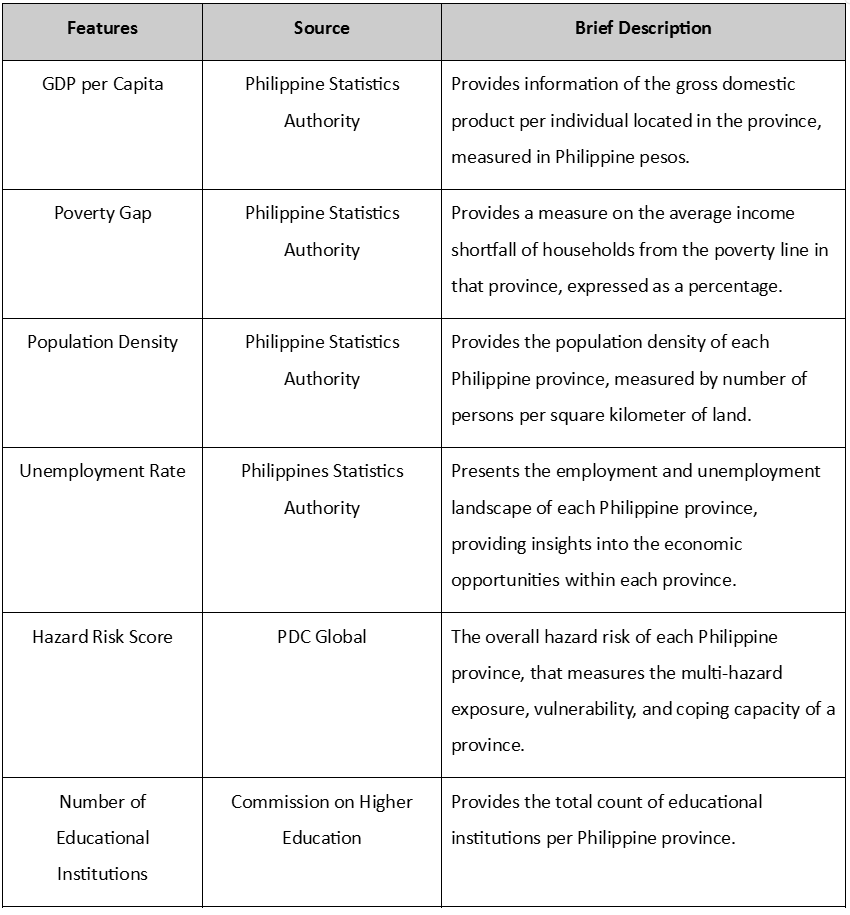

#### **GDP per Capita**

In [ ]:
# The following code adds the GDP per Capita of the province in the migration summary dataframe
# Load the GDP per Capita data from an Excel file
gdppercapita = pd.read_excel(
    '/content/drive/Shareddrives/DATA103_DATA/Per Capita Gross Domestic Product, by Province and HUC.xlsm',
    usecols="A:B",
    skiprows=3,
    header=0
).head(117)

# Rename the columns for easier reference: the first column is renamed to 'Residence' and the second column to 'GDPperCapita'.
gdppercapita.rename(columns={gdppercapita.columns[0]: 'Residence', gdppercapita.columns[1]: 'GDPperCapita'}, inplace=True)

# Clean up 'Residence' column: convert all names to uppercase for consistency.
gdppercapita['Residence'] = gdppercapita['Residence'].str.upper()

# Filter the rows to include only those where 'Residence' starts with "..", likely related to formatting in the original data.
gdppercapita = gdppercapita[gdppercapita['Residence'].str.startswith('..')]

# Remove the leading ".." from 'Residence' names, using regular expressions.
gdppercapita['Residence'] = gdppercapita['Residence'].str.replace(r'^\.\.', '', regex=True)

# Replace specific province names with standardize names from the migration summary data for consistency.
replacements = {
    'NORTH COTABATO': 'COTABATO (NORTH COTABATO)',
    'SAMAR': 'SAMAR (WESTERN SAMAR)',
    'DAVAO DE ORO': 'COMPOSTELA VALLEY',
    'COTABATO': 'COTABATO (NORTH COTABATO)',
    'CITY OF ISABELA': 'ISABELA CITY',
    'NATIONAL CAPITAL REGION (NCR)': 'NATIONAL CAPITAL REGION',
}
gdppercapita['Residence'] = gdppercapita['Residence'].replace(replacements)

# Clean province names to standardized form and remove excluded residences
magindanao_avg = gdppercapita.loc[
    gdppercapita['Residence'].isin(['MAGUINDANAO DEL NORTE', 'MAGUINDANAO DEL SUR']),
    'GDPperCapita'
].mean()

gdppercapita = pd.concat([
    gdppercapita,
    pd.DataFrame([{'Residence': 'MAGUINDANAO', 'GDPperCapita': magindanao_avg}])
], ignore_index=True)

cities_to_exclude = [
    'CITY OF BAGUIO', 'CITY OF ANGELES', 'CITY OF OLONGAPO',
    'CITY OF LUCENA', 'CITY OF PUERTO PRINCESA', 'CITY OF BACOLOD',
    'CITY OF ILOILO', 'CITY OF CEBU', 'CITY OF LAPU-LAPU', 'CITY OF MANDAUE',
    'CITY OF TACLOBAN','CITY OF ZAMBOANGA', 'CITY OF CAGAYAN DE ORO',
    'CITY OF ILIGAN','CITY OF DAVAO','CITY OF GENERAL SANTOS',
    'CITY OF BUTUAN','MAGUINDANAO DEL NORTE','MAGUINDANAO DEL SUR'
]
gdppercapita['Residence'] = gdppercapita['Residence'].replace(cities_to_exclude, np.NaN)

# Drop all rows where the 'Residence' column is NaN, effectively removing the excluded cities and provinces.
gdppercapita = gdppercapita.dropna()

gdppercapita


Residence  GDPperCapita
0                       ABRA     81,660.28
1                     APAYAO     81,505.11
2                    BENGUET    148,629.64
3                     IFUGAO    114,697.10
4                    KALINGA    111,442.73
..                       ...           ...
95             LANAO DEL SUR     53,020.64
98                      SULU     44,302.55
99                 TAWI-TAWI     55,222.17
100  NATIONAL CAPITAL REGION    432,181.00
101              MAGUINDANAO     52,586.68

[83 rows x 2 columns]

In [ ]:
# Merge migration_summary with GDP per capita
migration_df = pd.merge(
    migration_df,
    gdppercapita[['Residence', 'GDPperCapita']],
    on='Residence',
    how='left'
)

migration_df

Residence  Inflow  Outflow  NetMigration  IdealLocation  \
0                  ABRA      41        3            38              1   
1      AGUSAN DEL NORTE      76       17            59              1   
2        AGUSAN DEL SUR       3       23           -20              0   
3                 AKLAN      22       16             6              1   
4                 ALBAY      35       13            22              1   
..                  ...     ...      ...           ...            ...   
79            TAWI-TAWI      10        4             6              1   
80             ZAMBALES       8       14            -6              0   
81  ZAMBOANGA DEL NORTE      36       16            20              1   
82    ZAMBOANGA DEL SUR      62       37            25              1   
83    ZAMBOANGA SIBUGAY      31       18            13              1   

    AverageSalary  AverageSalaryPrevious  AverageSalaryDifference  MalePerc  \
0        6,261.32               3,985.37                 2,275.95      0.56   
1        3,696.71               3,219.32                   477.39      0.51   
2        5,000.00                   0.00                 5,000.00      0.33   
3        2,109.09               5,227.27                -3,118.18      0.50   
4        4,842.86               5,854.29                -1,011.43      0.43   
..            ...                    ...                      ...       ...   
79           0.00                   0.00                     0.00      0.50   
80       3,655.00               1,125.00                 2,530.00      0.62   
81       3,583.89               3,697.78                  -113.89      0.53   
82       5,270.32               4,025.23                 1,245.10      0.52   
83       1,697.84               3,983.23                -2,285.39      0.52   

    FemalePerc  ...  Reasoning_Living Environment  Reasoning_Marriage  \
0         0.44  ...                          0.07                0.05   
1         0.49  ...                          0.12                0.01   
2         0.67  ...                          0.33                0.00   
3         0.50  ...                          0.18                0.00   
4         0.57  ...                          0.00                0.09   
..         ...  ...                           ...                 ...   
79        0.50  ...                          0.00                0.00   
80        0.38  ...                          0.12                0.12   
81        0.47  ...                          0.08                0.00   
82        0.48  ...                          0.06                0.02   
83        0.48  ...                          0.10                0.00   

    Reasoning_Others  Reasoning_Peace and Security  Reasoning_Retirement  \
0               0.07                          0.00                  0.00   
1               0.11                          0.00                  0.00   
2               0.00                          0.00                  0.00   
3               0.09                          0.05                  0.00   
4               0.11                          0.03                  0.00   
..               ...                           ...                   ...   
79              0.10                          0.00                  0.00   
80              0.00                          0.00                  0.00   
81              0.17                          0.00                  0.00   
82              0.13                          0.00                  0.00   
83              0.06                          0.00                  0.00   

    Reasoning_Schooling  Reasoning_To Live with Children  \
0                  0.12                             0.05   
1                  0.11                             0.04   
2                  0.00                             0.00   
3                  0.05                             0.00   
4                  0.20                             0.06   
..                  ...               

#### **Poverty Gap**

In [ ]:
# The following code adds the poverty gay of the province in the migration summary dataframe
# Step 1: Read data from an Excel file containing income and poverty gap statistics.
poverty_gap = pd.read_excel(
    '/content/drive/Shareddrives/DATA103_DATA/Income Gap, Poverty Gap and Severity of Poverty, by Region and Province 2015.xlsm',
    usecols="A:D",
    skiprows=2,
    header=0
).head(104)

# Step 2: Rename the 'Unnamed: 0' column to 'Residence' to make it more meaningful.
poverty_gap.rename(columns={'Unnamed: 0': 'Residence'}, inplace=True)

# Step 3: Convert all entries in the 'Residence' column to uppercase for consistency.
poverty_gap['Residence'] = poverty_gap['Residence'].str.upper()

# Step 4: Remove any trailing "A/" from the 'Residence' column entries using regex.
poverty_gap['Residence'] = poverty_gap['Residence'].str.replace(r' A/$', '', regex=True)

# Step 5: Replace specific incorrect or abbreviated entries in the 'Residence' column with corrected names.
poverty_gap['Residence'] = poverty_gap['Residence'].replace(
    ['NCR B/'], 'NATIONAL CAPITAL REGION'
)

# Step 6: Filter the DataFrame to include only rows where the 'Residence' column starts with ".."
#         or is exactly 'NATIONAL CAPITAL REGION'.
poverty_gap = poverty_gap[
    poverty_gap['Residence'].str.startswith('..') | (poverty_gap['Residence'] == 'NATIONAL CAPITAL REGION')
]

# Step 7: Remove leading ".." from the 'Residence' column entries using regex.
poverty_gap['Residence'] = poverty_gap['Residence'].astype(str).str.replace(r'^\.\.', '', regex=True)

# Step 8: Replace specific province names with corrected versions to standardize the data.
poverty_gap['Residence'] = poverty_gap['Residence'].replace(
    ['MT. PROVINCE'], 'MOUNTAIN PROVINCE'
)
poverty_gap['Residence'] = poverty_gap['Residence'].replace(
    ['GUIMARAS ]A/'], 'GUIMARAS'
)
poverty_gap['Residence'] = poverty_gap['Residence'].replace(
    ['WESTERN SAMAR'], 'SAMAR (WESTERN SAMAR)'
)
poverty_gap['Residence'] = poverty_gap['Residence'].replace(
    ['NORTH COTABATO'], 'COTABATO (NORTH COTABATO)'
)
poverty_gap['Residence'] = poverty_gap['Residence'].replace(
    ['SARANGGANI'], 'SARANGANI'
)

# Step 9: Replace hyphens ('-') in the 'Poverty Gap' column with NaN to represent missing data.
poverty_gap['Poverty Gap'] = poverty_gap['Poverty Gap'].replace(
    ['-'], np.NaN
)

# Step 10: Retain only the 'Residence' and 'Poverty Gap' columns for the final DataFrame.
poverty_gap = poverty_gap[['Residence', 'Poverty Gap']]
poverty_gap['Poverty Gap'] = poverty_gap['Poverty Gap']/100

# Step 11: Remove rows where the 'Residence' column contains district-level data, such as '1ST DISTRICT', etc.
poverty_gap = poverty_gap[~poverty_gap['Residence'].isin(['1ST DISTRICT', '2ND DISTRICT', '3RD DISTRICT', '4TH DISTRICT'])]

poverty_gap


<ipython-input-25-7e042ad9694e>:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  poverty_gap['Poverty Gap'] = poverty_gap['Poverty Gap'].replace(


Residence  Poverty Gap
2    NATIONAL CAPITAL REGION         0.00
8                       ABRA         0.04
9                     APAYAO         0.06
10                   BENGUET         0.00
11                    IFUGAO         0.07
..                       ...          ...
99                   BASILAN         0.05
100            LANAO DEL SUR         0.20
101              MAGUINDANAO         0.14
102                     SULU         0.08
103                TAWI-TAWI         0.01

[82 rows x 2 columns]

In [ ]:
poverty_gap['Residence'].unique()

array(['NATIONAL CAPITAL REGION', 'ABRA', 'APAYAO', 'BENGUET', 'IFUGAO',
       'KALINGA', 'MOUNTAIN PROVINCE', 'ILOCOS NORTE', 'ILOCOS SUR',
       'LA UNION', 'PANGASINAN', 'BATANES', 'CAGAYAN', 'ISABELA',
       'NUEVA VIZCAYA', 'QUIRINO', 'AURORA', 'BATAAN', 'BULACAN',
       'NUEVA ECIJA', 'PAMPANGA', 'TARLAC', 'ZAMBALES', 'BATANGAS',
       'CAVITE', 'LAGUNA', 'QUEZON', 'RIZAL', 'MARINDUQUE',
       'OCCIDENTAL MINDORO', 'ORIENTAL MINDORO', 'PALAWAN', 'ROMBLON',
       'ALBAY', 'CAMARINES NORTE', 'CAMARINES SUR', 'CATANDUANES',
       'MASBATE', 'SORSOGON', 'AKLAN', 'ANTIQUE', 'CAPIZ', 'GUIMARAS',
       'ILOILO', 'NEGROS OCCIDENTAL', 'BOHOL', 'CEBU', 'NEGROS ORIENTAL',
       'SIQUIJOR', 'BILIRAN', 'EASTERN SAMAR', 'LEYTE', 'NORTHERN SAMAR',
       'SOUTHERN LEYTE', 'SAMAR (WESTERN SAMAR)', 'ZAMBOANGA DEL NORTE',
       'ZAMBOANGA DEL SUR', 'ZAMBOANGA SIBUGAY', 'ISABELA CITY',
       'BUKIDNON', 'CAMIGUIN', 'LANAO DEL NORTE', 'MISAMIS OCCIDENTAL',
       'MISAMIS ORIENTAL', 'DAV

In [ ]:
# Merge migration_summary with Poverty Gap
migration_df = pd.merge(
    migration_df,
    poverty_gap[['Residence', 'Poverty Gap']],
    on='Residence',
    how='left'
)

migration_df

Residence  Inflow  Outflow  NetMigration  IdealLocation  \
0                  ABRA      41        3            38              1   
1      AGUSAN DEL NORTE      76       17            59              1   
2        AGUSAN DEL SUR       3       23           -20              0   
3                 AKLAN      22       16             6              1   
4                 ALBAY      35       13            22              1   
..                  ...     ...      ...           ...            ...   
79            TAWI-TAWI      10        4             6              1   
80             ZAMBALES       8       14            -6              0   
81  ZAMBOANGA DEL NORTE      36       16            20              1   
82    ZAMBOANGA DEL SUR      62       37            25              1   
83    ZAMBOANGA SIBUGAY      31       18            13              1   

    AverageSalary  AverageSalaryPrevious  AverageSalaryDifference  MalePerc  \
0        6,261.32               3,985.37                 2,275.95      0.56   
1        3,696.71               3,219.32                   477.39      0.51   
2        5,000.00                   0.00                 5,000.00      0.33   
3        2,109.09               5,227.27                -3,118.18      0.50   
4        4,842.86               5,854.29                -1,011.43      0.43   
..            ...                    ...                      ...       ...   
79           0.00                   0.00                     0.00      0.50   
80       3,655.00               1,125.00                 2,530.00      0.62   
81       3,583.89               3,697.78                  -113.89      0.53   
82       5,270.32               4,025.23                 1,245.10      0.52   
83       1,697.84               3,983.23                -2,285.39      0.52   

    FemalePerc  ...  Reasoning_Marriage  Reasoning_Others  \
0         0.44  ...                0.05              0.07   
1         0.49  ...                0.01              0.11   
2         0.67  ...                0.00              0.00   
3         0.50  ...                0.00              0.09   
4         0.57  ...                0.09              0.11   
..         ...  ...                 ...               ...   
79        0.50  ...                0.00              0.10   
80        0.38  ...                0.12              0.00   
81        0.47  ...                0.00              0.17   
82        0.48  ...                0.02              0.13   
83        0.48  ...                0.00              0.06   

    Reasoning_Peace and Security  Reasoning_Retirement  Reasoning_Schooling  \
0                           0.00                  0.00                 0.12   
1                           0.00                  0.00                 0.11   
2                           0.00                  0.00                 0.00   
3                           0.05                  0.00                 0.05   
4                           0.03                  0.00                 0.20   
..                           ...                   ...                  ...   
79                          0.00                  0.00                 0.10   
80                          0.00                  0.00                 0.00   
81                          0.00                  0.00                 0.17   
82                          0.00                  0.00                 0.10   
83                          0.00                  0.00                 0.06   

    Reasoning_To Live with Children  Reasoning_To Live with Parents  \
0                              0.05                            0.02   
1                              0.04                            0.11   
2                              0.00                            0.00   
3                              0.00                            0.00   
4                              0.06                            0.03   
..                              ...                             ...   
79       

#### **Population Density**

In [ ]:
# The following code adds the population density of the province in the migration summary dataframe
# Step 1: Read data from an Excel file containing population density information.
population_density_df = pd.read_excel('/content/drive/Shareddrives/DATA103_DATA/[PSA] Population Density.xlsx', sheet_name="Cleaned")

# Step 2: Select only the columns 'Residence' and 'PopulationDensity' for further processing.
population_density_df = population_density_df[['Residence', 'PopulationDensity']]

# Step 3: Set the 'Residence' column as the index for the population density DataFrame.
population_density_df.set_index('Residence', inplace=True)

migration_df = pd.merge(
    migration_df,
    population_density_df,
    left_on='Residence',
    right_index=True,
    how='left'
)

migration_df


Residence  Inflow  Outflow  NetMigration  IdealLocation  \
0                  ABRA      41        3            38              1   
1      AGUSAN DEL NORTE      76       17            59              1   
2        AGUSAN DEL SUR       3       23           -20              0   
3                 AKLAN      22       16             6              1   
4                 ALBAY      35       13            22              1   
..                  ...     ...      ...           ...            ...   
79            TAWI-TAWI      10        4             6              1   
80             ZAMBALES       8       14            -6              0   
81  ZAMBOANGA DEL NORTE      36       16            20              1   
82    ZAMBOANGA DEL SUR      62       37            25              1   
83    ZAMBOANGA SIBUGAY      31       18            13              1   

    AverageSalary  AverageSalaryPrevious  AverageSalaryDifference  MalePerc  \
0        6,261.32               3,985.37                 2,275.95      0.56   
1        3,696.71               3,219.32                   477.39      0.51   
2        5,000.00                   0.00                 5,000.00      0.33   
3        2,109.09               5,227.27                -3,118.18      0.50   
4        4,842.86               5,854.29                -1,011.43      0.43   
..            ...                    ...                      ...       ...   
79           0.00                   0.00                     0.00      0.50   
80       3,655.00               1,125.00                 2,530.00      0.62   
81       3,583.89               3,697.78                  -113.89      0.53   
82       5,270.32               4,025.23                 1,245.10      0.52   
83       1,697.84               3,983.23                -2,285.39      0.52   

    FemalePerc  ...  Reasoning_Others  Reasoning_Peace and Security  \
0         0.44  ...              0.07                          0.00   
1         0.49  ...              0.11                          0.00   
2         0.67  ...              0.00                          0.00   
3         0.50  ...              0.09                          0.05   
4         0.57  ...              0.11                          0.03   
..         ...  ...               ...                           ...   
79        0.50  ...              0.10                          0.00   
80        0.38  ...              0.00                          0.00   
81        0.47  ...              0.17                          0.00   
82        0.48  ...              0.13                          0.00   
83        0.48  ...              0.06                          0.00   

    Reasoning_Retirement  Reasoning_Schooling  \
0                   0.00                 0.12   
1                   0.00                 0.11   
2                   0.00                 0.00   
3                   0.00                 0.05   
4                   0.00                 0.20   
..                   ...                  ...   
79                  0.00                 0.10   
80                  0.00                 0.00   
81                  0.00                 0.17   
82                  0.00                 0.10   
83                  0.00                 0.06   

    Reasoning_To Live with Children  Reasoning_To Live with Parents  \
0                              0.05                            0.02   
1                              0.04                            0.11   
2                              0.00                            0.00   
3                              0.00                            0.00   
4                              0.06                            0.03   
..                              ...                             ...   
79                             0.00                            0.30   
80                             0.00                            0.00   
81                             0.03                            0.00   
82                             0.02 

#### **Unemployment Rate**

In [ ]:
# The following code adds the unemployment rate of the province in the migration summary dataframe
# Step 1: Read data from an Excel file containing unemployment rate information.
unemployment_rate_df = pd.read_excel('/content/drive/Shareddrives/DATA103_DATA/[PSA] Unemployment Rate.xlsx', sheet_name="Cleaned")

# Step 2: Select only the columns 'Residence' and 'UnemploymentRate' for further processing.
unemployment_rate_df = unemployment_rate_df[['Residence', 'UnemploymentRate']]
unemployment_rate_df['UnemploymentRate'] = unemployment_rate_df['UnemploymentRate']/ 100

# Step 3: Set the 'Residence' column as the index for the unemployment rate DataFrame.
unemployment_rate_df.set_index('Residence', inplace=True)

# Step 4: Merge the migration summary DataFrame with the unemployment rate DataFrame.
migration_df = pd.merge(
    migration_df,
    unemployment_rate_df,
    left_on='Residence',
    right_index=True,
    how='left'
)

migration_df

Residence  Inflow  Outflow  NetMigration  IdealLocation  \
0                  ABRA      41        3            38              1   
1      AGUSAN DEL NORTE      76       17            59              1   
2        AGUSAN DEL SUR       3       23           -20              0   
3                 AKLAN      22       16             6              1   
4                 ALBAY      35       13            22              1   
..                  ...     ...      ...           ...            ...   
79            TAWI-TAWI      10        4             6              1   
80             ZAMBALES       8       14            -6              0   
81  ZAMBOANGA DEL NORTE      36       16            20              1   
82    ZAMBOANGA DEL SUR      62       37            25              1   
83    ZAMBOANGA SIBUGAY      31       18            13              1   

    AverageSalary  AverageSalaryPrevious  AverageSalaryDifference  MalePerc  \
0        6,261.32               3,985.37                 2,275.95      0.56   
1        3,696.71               3,219.32                   477.39      0.51   
2        5,000.00                   0.00                 5,000.00      0.33   
3        2,109.09               5,227.27                -3,118.18      0.50   
4        4,842.86               5,854.29                -1,011.43      0.43   
..            ...                    ...                      ...       ...   
79           0.00                   0.00                     0.00      0.50   
80       3,655.00               1,125.00                 2,530.00      0.62   
81       3,583.89               3,697.78                  -113.89      0.53   
82       5,270.32               4,025.23                 1,245.10      0.52   
83       1,697.84               3,983.23                -2,285.39      0.52   

    FemalePerc  ...  Reasoning_Peace and Security  Reasoning_Retirement  \
0         0.44  ...                          0.00                  0.00   
1         0.49  ...                          0.00                  0.00   
2         0.67  ...                          0.00                  0.00   
3         0.50  ...                          0.05                  0.00   
4         0.57  ...                          0.03                  0.00   
..         ...  ...                           ...                   ...   
79        0.50  ...                          0.00                  0.00   
80        0.38  ...                          0.00                  0.00   
81        0.47  ...                          0.00                  0.00   
82        0.48  ...                          0.00                  0.00   
83        0.48  ...                          0.00                  0.00   

    Reasoning_Schooling  Reasoning_To Live with Children  \
0                  0.12                             0.05   
1                  0.11                             0.04   
2                  0.00                             0.00   
3                  0.05                             0.00   
4                  0.20                             0.06   
..                  ...                              ...   
79                 0.10                             0.00   
80                 0.00                             0.00   
81                 0.17                             0.03   
82                 0.10                             0.02   
83                 0.06                             0.13   

    Reasoning_To Live with Parents  Reasoning_To Live with Spouse/Partner  \
0                             0.02                                   0.07   
1                             0.11                                   0.05   
2                             0.00                                   0.33   
3                             0.00                                   0.09   
4                             0.03                                   0.11   
..                             ...                                    ...   
79                         

#### **Hazard Risk Score**

In [ ]:
# The following code adds the Hazard Risk Score of the province to the migration summary dataframe.

# Step 1: Read the CSV file containing hazard data into a DataFrame.
hazard_df = pd.read_csv('/content/drive/Shareddrives/DATA103_DATA/Multi-Hazard-Score-final.csv')

# Step 2: Rename the 'PROVINCE' column in the hazard DataFrame to 'Residence' to align with the migration summary DataFrame.
hazard_df.rename(columns={'PROVINCE': 'Residence'}, inplace=True)

# Step 3: Convert all values in the 'Residence' column of both DataFrames to uppercase to ensure consistent formatting for merging.
hazard_df['Residence'] = hazard_df['Residence'].str.upper()
migration_df['Residence'] = migration_df['Residence'].str.upper()

# Step 4: Remove any leading or trailing whitespace from the 'Residence' column in both DataFrames to ensure clean data before merging.
hazard_df['Residence'] = hazard_df['Residence'].str.strip()
migration_df['Residence'] = migration_df['Residence'].str.strip()

# Step 5: Merge the migration summary DataFrame with the hazard DataFrame based on the 'Residence' column.
migration_df = pd.merge(
    migration_df,
    hazard_df[['Residence', 'RISK SCORE']],
    on='Residence',
    how='left'
)

# Display the updated migration summary DataFrame with the added Hazard Risk Score.
migration_df

Residence  Inflow  Outflow  NetMigration  IdealLocation  \
0                  ABRA      41        3            38              1   
1      AGUSAN DEL NORTE      76       17            59              1   
2        AGUSAN DEL SUR       3       23           -20              0   
3                 AKLAN      22       16             6              1   
4                 ALBAY      35       13            22              1   
..                  ...     ...      ...           ...            ...   
79            TAWI-TAWI      10        4             6              1   
80             ZAMBALES       8       14            -6              0   
81  ZAMBOANGA DEL NORTE      36       16            20              1   
82    ZAMBOANGA DEL SUR      62       37            25              1   
83    ZAMBOANGA SIBUGAY      31       18            13              1   

    AverageSalary  AverageSalaryPrevious  AverageSalaryDifference  MalePerc  \
0        6,261.32               3,985.37                 2,275.95      0.56   
1        3,696.71               3,219.32                   477.39      0.51   
2        5,000.00                   0.00                 5,000.00      0.33   
3        2,109.09               5,227.27                -3,118.18      0.50   
4        4,842.86               5,854.29                -1,011.43      0.43   
..            ...                    ...                      ...       ...   
79           0.00                   0.00                     0.00      0.50   
80       3,655.00               1,125.00                 2,530.00      0.62   
81       3,583.89               3,697.78                  -113.89      0.53   
82       5,270.32               4,025.23                 1,245.10      0.52   
83       1,697.84               3,983.23                -2,285.39      0.52   

    FemalePerc  ...  Reasoning_Retirement  Reasoning_Schooling  \
0         0.44  ...                  0.00                 0.12   
1         0.49  ...                  0.00                 0.11   
2         0.67  ...                  0.00                 0.00   
3         0.50  ...                  0.00                 0.05   
4         0.57  ...                  0.00                 0.20   
..         ...  ...                   ...                  ...   
79        0.50  ...                  0.00                 0.10   
80        0.38  ...                  0.00                 0.00   
81        0.47  ...                  0.00                 0.17   
82        0.48  ...                  0.00                 0.10   
83        0.48  ...                  0.00                 0.06   

    Reasoning_To Live with Children  Reasoning_To Live with Parents  \
0                              0.05                            0.02   
1                              0.04                            0.11   
2                              0.00                            0.00   
3                              0.00                            0.00   
4                              0.06                            0.03   
..                              ...                             ...   
79                             0.00                            0.30   
80                             0.00                            0.00   
81                             0.03                            0.00   
82                             0.02                            0.03   
83                             0.13                            0.13   

    Reasoning_To Live with Spouse/Partner  GDPperCapita  Poverty Gap  \
0                                    0.07     81,660.28         0.04   
1                                    0.05     94,318.83         0.08   
2                                    0.33     89,622.55         0.10   
3                                    0.09     92,302.50         0.01   
4                                    0.11     97,750.31         0.04   
..                                    ...           ...          ...   
79                                   0

#### **Higher Educational Institutions**

In [ ]:
# The following code adds the number of higher education institutions of the province to the migration summary dataframe.

# Step 1: Load the Excel file containing educational institution data into a DataFrame.
educational_institutions_df = pd.read_excel('/content/drive/Shareddrives/DATA103_DATA/2021-2022_Graduate Programs.xlsx')

# Step 2: Convert all province names in the 'PROVINCE' column to uppercase for consistency.
educational_institutions_df['PROVINCE'] = educational_institutions_df['PROVINCE'].str.upper()

# Step 3: Replace specific values in the 'PROVINCE' column with standardized names.
#         Consolidate various districts in Metro Manila into 'NATIONAL CAPITAL REGION'.
educational_institutions_df['PROVINCE'] = educational_institutions_df['PROVINCE'].replace(
    ['METRO MANILA', 'CITY OF MANILA FIRST DISTRICT', 'THIRD DISTRICT', 'FOURTH DISTRICT', 'SECOND DISTRICT'],
    'NATIONAL CAPITAL REGION'
)

# Step 4: Update province name from 'DAVAO DE ORO' to its former name 'COMPOSTELA VALLEY'.
educational_institutions_df['PROVINCE'] = educational_institutions_df['PROVINCE'].replace(
    ['DAVAO DE ORO'], 'COMPOSTELA VALLEY'
)

# Step 5: Standardize other province names in the 'PROVINCE' column for consistency.
educational_institutions_df['PROVINCE'] = educational_institutions_df['PROVINCE'].replace(
    ['MT. PROVINCE'], 'MOUNTAIN PROVINCE'
)
educational_institutions_df['PROVINCE'] = educational_institutions_df['PROVINCE'].replace(
    ['NORTH COTABATO'], 'COTABATO (NORTH COTABATO)'
)
educational_institutions_df['PROVINCE'] = educational_institutions_df['PROVINCE'].replace(
    ['QUEZON PROVINCE'], 'QUEZON'
)
educational_institutions_df['PROVINCE'] = educational_institutions_df['PROVINCE'].replace(
    ['WESTERN SAMAR'], 'SAMAR (WESTERN SAMAR)'
)
educational_institutions_df['PROVINCE'] = educational_institutions_df['PROVINCE'].replace(
    ['SAMAR'], 'NORTHERN SAMAR'
)
educational_institutions_df['PROVINCE'] = educational_institutions_df['PROVINCE'].replace(
    ['SAN PABLO CITY'], 'LAGUNA'
)

# Step 6: Special case handling for Cotabato City and Isabela City by setting 'PROVINCE' to their respective city names.
educational_institutions_df.loc[educational_institutions_df['MUNICIPALITY/CITY'] == 'Cotabato City', 'PROVINCE'] = 'COTABATO CITY'
educational_institutions_df.loc[educational_institutions_df['MUNICIPALITY/CITY'] == 'Isabela City', 'PROVINCE'] = 'ISABELA CITY'

# Step 7: Group the DataFrame by the 'PROVINCE' column and count the number of educational institutions for each province.
educ_inst_prov = educational_institutions_df.groupby('PROVINCE').size().reset_index(name='Educ_Institutions')

# Step 8: Rename the 'PROVINCE' column to 'Residence' to match the desired output format.
educ_inst_prov.rename(columns={'PROVINCE': 'Residence'}, inplace=True)

# Step 9: Save the aggregated data as a CSV file for later use.
educ_inst_prov.to_csv("/content/drive/Shareddrives/DATA103_DATA/educational_institutions.csv", index=False)

educ_inst_prov


Residence  Educ_Institutions
0                  ABRA                  5
1      AGUSAN DEL NORTE                 20
2        AGUSAN DEL SUR                  8
3                 AKLAN                 17
4                 ALBAY                 49
..                  ...                ...
79            TAWI-TAWI                 10
80             ZAMBALES                 29
81  ZAMBOANGA DEL NORTE                 22
82    ZAMBOANGA DEL SUR                 44
83    ZAMBOANGA SIBUGAY                 18

[84 rows x 2 columns]

In [ ]:
# Merge migration_summary with educ_inst_prov
migration_df = pd.merge(
    migration_df,
    educ_inst_prov[['Residence', 'Educ_Institutions']],
    on='Residence',
    how='left'
)


migration_df

Residence  Inflow  Outflow  NetMigration  IdealLocation  \
0                  ABRA      41        3            38              1   
1      AGUSAN DEL NORTE      76       17            59              1   
2        AGUSAN DEL SUR       3       23           -20              0   
3                 AKLAN      22       16             6              1   
4                 ALBAY      35       13            22              1   
..                  ...     ...      ...           ...            ...   
79            TAWI-TAWI      10        4             6              1   
80             ZAMBALES       8       14            -6              0   
81  ZAMBOANGA DEL NORTE      36       16            20              1   
82    ZAMBOANGA DEL SUR      62       37            25              1   
83    ZAMBOANGA SIBUGAY      31       18            13              1   

    AverageSalary  AverageSalaryPrevious  AverageSalaryDifference  MalePerc  \
0        6,261.32               3,985.37                 2,275.95      0.56   
1        3,696.71               3,219.32                   477.39      0.51   
2        5,000.00                   0.00                 5,000.00      0.33   
3        2,109.09               5,227.27                -3,118.18      0.50   
4        4,842.86               5,854.29                -1,011.43      0.43   
..            ...                    ...                      ...       ...   
79           0.00                   0.00                     0.00      0.50   
80       3,655.00               1,125.00                 2,530.00      0.62   
81       3,583.89               3,697.78                  -113.89      0.53   
82       5,270.32               4,025.23                 1,245.10      0.52   
83       1,697.84               3,983.23                -2,285.39      0.52   

    FemalePerc  ...  Reasoning_Schooling  Reasoning_To Live with Children  \
0         0.44  ...                 0.12                             0.05   
1         0.49  ...                 0.11                             0.04   
2         0.67  ...                 0.00                             0.00   
3         0.50  ...                 0.05                             0.00   
4         0.57  ...                 0.20                             0.06   
..         ...  ...                  ...                              ...   
79        0.50  ...                 0.10                             0.00   
80        0.38  ...                 0.00                             0.00   
81        0.47  ...                 0.17                             0.03   
82        0.48  ...                 0.10                             0.02   
83        0.48  ...                 0.06                             0.13   

    Reasoning_To Live with Parents  Reasoning_To Live with Spouse/Partner  \
0                             0.02                                   0.07   
1                             0.11                                   0.05   
2                             0.00                                   0.33   
3                             0.00                                   0.09   
4                             0.03                                   0.11   
..                             ...                                    ...   
79                            0.30                                   0.00   
80                            0.00                                   0.00   
81                            0.00                                   0.03   
82                            0.03                                   0.16   
83                            0.13                                   0.10   

    GDPperCapita  Poverty Gap  PopulationDensity  UnemploymentRate  \
0      81,660.28         0.04                 60              0.04   
1      94,318.83         0.08                148              0.07   
2      89,622.55         0.10                 74              0.05   
3      92,302.50         0.01                350          

In [ ]:
migration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 32 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Residence                                       84 non-null     object 
 1   Inflow                                          84 non-null     int64  
 2   Outflow                                         84 non-null     int64  
 3   NetMigration                                    84 non-null     int64  
 4   IdealLocation                                   84 non-null     int64  
 5   AverageSalary                                   82 non-null     float64
 6   AverageSalaryPrevious                           82 non-null     float64
 7   AverageSalaryDifference                         82 non-null     float64
 8   MalePerc                                        82 non-null     float64
 9   FemalePerc                                   

In [ ]:
migration_df

Residence  Inflow  Outflow  NetMigration  IdealLocation  \
0                  ABRA      41        3            38              1   
1      AGUSAN DEL NORTE      76       17            59              1   
2        AGUSAN DEL SUR       3       23           -20              0   
3                 AKLAN      22       16             6              1   
4                 ALBAY      35       13            22              1   
..                  ...     ...      ...           ...            ...   
79            TAWI-TAWI      10        4             6              1   
80             ZAMBALES       8       14            -6              0   
81  ZAMBOANGA DEL NORTE      36       16            20              1   
82    ZAMBOANGA DEL SUR      62       37            25              1   
83    ZAMBOANGA SIBUGAY      31       18            13              1   

    AverageSalary  AverageSalaryPrevious  AverageSalaryDifference  MalePerc  \
0        6,261.32               3,985.37                 2,275.95      0.56   
1        3,696.71               3,219.32                   477.39      0.51   
2        5,000.00                   0.00                 5,000.00      0.33   
3        2,109.09               5,227.27                -3,118.18      0.50   
4        4,842.86               5,854.29                -1,011.43      0.43   
..            ...                    ...                      ...       ...   
79           0.00                   0.00                     0.00      0.50   
80       3,655.00               1,125.00                 2,530.00      0.62   
81       3,583.89               3,697.78                  -113.89      0.53   
82       5,270.32               4,025.23                 1,245.10      0.52   
83       1,697.84               3,983.23                -2,285.39      0.52   

    FemalePerc  ...  Reasoning_Schooling  Reasoning_To Live with Children  \
0         0.44  ...                 0.12                             0.05   
1         0.49  ...                 0.11                             0.04   
2         0.67  ...                 0.00                             0.00   
3         0.50  ...                 0.05                             0.00   
4         0.57  ...                 0.20                             0.06   
..         ...  ...                  ...                              ...   
79        0.50  ...                 0.10                             0.00   
80        0.38  ...                 0.00                             0.00   
81        0.47  ...                 0.17                             0.03   
82        0.48  ...                 0.10                             0.02   
83        0.48  ...                 0.06                             0.13   

    Reasoning_To Live with Parents  Reasoning_To Live with Spouse/Partner  \
0                             0.02                                   0.07   
1                             0.11                                   0.05   
2                             0.00                                   0.33   
3                             0.00                                   0.09   
4                             0.03                                   0.11   
..                             ...                                    ...   
79                            0.30                                   0.00   
80                            0.00                                   0.00   
81                            0.00                                   0.03   
82                            0.03                                   0.16   
83                            0.13                                   0.10   

    GDPperCapita  Poverty Gap  PopulationDensity  UnemploymentRate  \
0      81,660.28         0.04                 60              0.04   
1      94,318.83         0.08                148              0.07   
2      89,622.55         0.10                 74              0.05   
3      92,302.50         0.01                350          

In [ ]:
migration_df.to_csv("/content/drive/Shareddrives/DATA103_DATA/migration_df.csv", index=False)

After incorporating the additional determinant variables, the finalized migration summary consists of 84 rows and 32 columns. This concludes the notebook and data preparation phase, which will serve as the foundation for preprocessing, analysis, and the input data for machine learning models.

# **3. Data Preprocessing**

## 3.A. Exploratory Data Analysis (EDA)

### Top Provinces by Number of Inflows

The following codes aim to visualize the top provinces with the highest and lowest inflows of migrants.

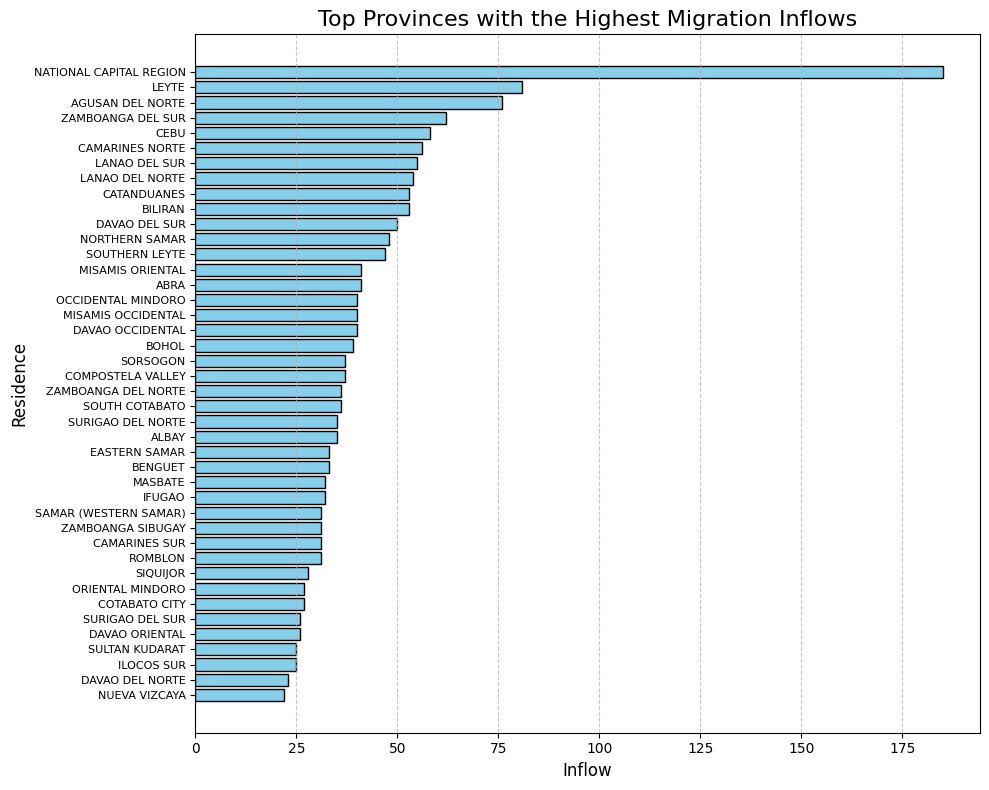

In [ ]:
# Sort the DataFrame by 'Inflow' in descending order
migration_df_sorted = migration_df.sort_values(by='Inflow', ascending=False)

# Calculate the top 50% threshold
top_50_percent = len(migration_df_sorted) // 2
migration_df_top50 = migration_df_sorted.iloc[:top_50_percent]
migration_df_top50 = migration_df_top50.sort_values(by='Inflow', ascending=True)

# Create positions for the bars
y_positions = np.arange(len(migration_df_top50))

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(y_positions, migration_df_top50['Inflow'],
         color='skyblue', edgecolor='black', height=0.8)

# Customize the chart
plt.title('Top Provinces with the Highest Migration Inflows', fontsize=16)
plt.xlabel('Inflow', fontsize=12)
plt.ylabel('Residence', fontsize=12)

# Set y-ticks at bar positions and label them with the 'Residence' values
plt.yticks(ticks=y_positions, labels=migration_df_top50['Residence'], fontsize=8)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

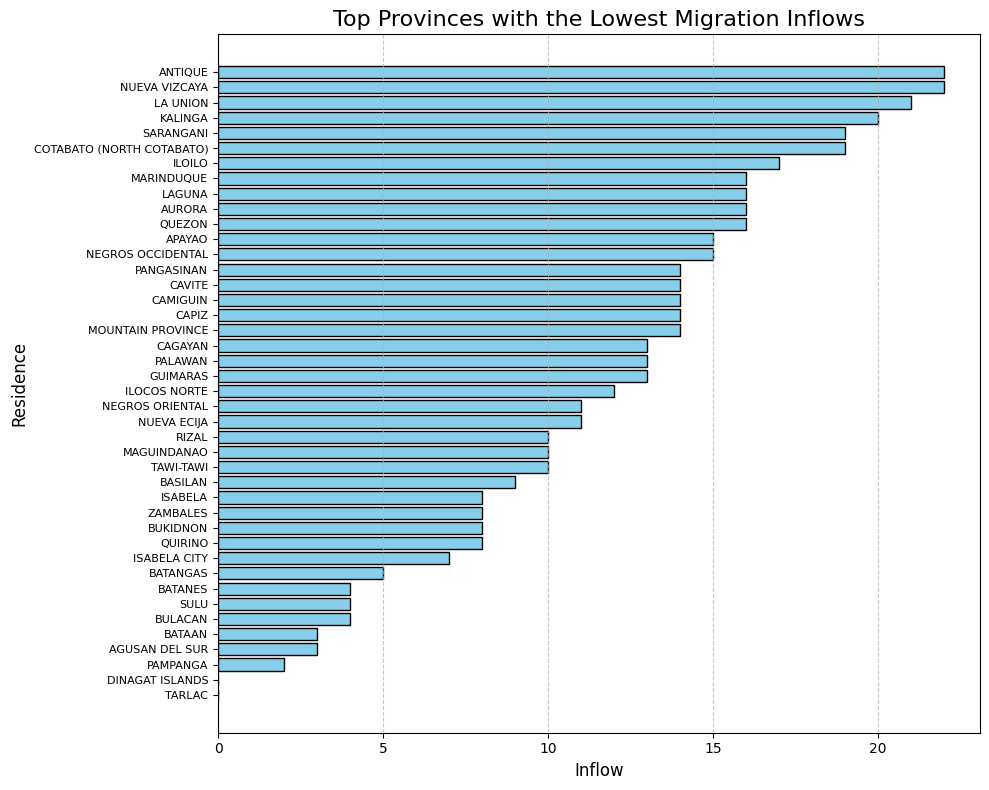

In [ ]:
# Sort the DataFrame by 'Inflow' in descending order
migration_df_sorted = migration_df.sort_values(by='Inflow', ascending=True)

# Calculate the below 50% threshold
top_50_percent = len(migration_df_sorted) // 2
migration_df_top50 = migration_df_sorted.iloc[:top_50_percent]
migration_df_top50 = migration_df_top50.sort_values(by='Inflow', ascending=True)

# Create positions for the bars
y_positions = np.arange(len(migration_df_top50))  # Numeric positions for each bar

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 8))  # Adjust the figure size for better readability
plt.barh(y_positions, migration_df_top50['Inflow'],
         color='skyblue', edgecolor='black', height=0.8)  # Adjust the height for spacing

# Customize the chart
plt.title('Top Provinces with the Lowest Migration Inflows', fontsize=16)
plt.xlabel('Inflow', fontsize=12)
plt.ylabel('Residence', fontsize=12)

# Set y-ticks at bar positions and label them with the 'Residence' values
plt.yticks(ticks=y_positions, labels=migration_df_top50['Residence'], fontsize=8)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the inflow for NCR
ncr_inflow = migration_df[migration_df['Residence'] == 'NATIONAL CAPITAL REGION']['Inflow'].sum()

# Calculate the total inflow
total_inflow = migration_df['Inflow'].sum()

# Calculate the percentage of inflows contributed by NCR
ncr_percentage = (ncr_inflow / total_inflow) * 100

# Print the result
print("Percentage of Inflows Contributed by NCR: {:.2f}%".format(ncr_percentage))

Percentage of Inflows Contributed by NCR: 8.05%


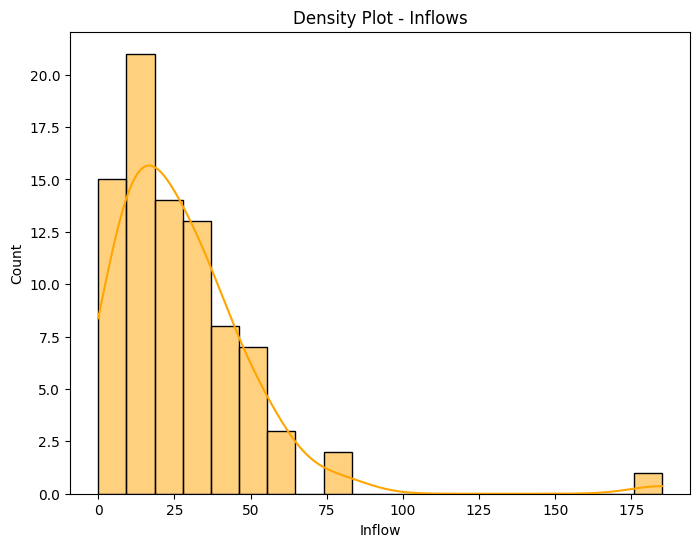

In [ ]:
# Ensure 'Inflow' is numeric for proper plotting
migration_df['Inflow'] = pd.to_numeric(migration_df['Inflow'], errors='coerce')

# Create the histogram with a density plot on top
plt.figure(figsize=(8, 6))
sns.histplot(migration_df['Inflow'], kde=True, color='orange', bins=20)

# Customize the labels and title
plt.xlabel('Inflow')
plt.title('Density Plot - Inflows')

# Display the plot
plt.show()

**ANALYSIS:**

The results indicate that the National Capital Region, Leyte, and Agusan Del Norte have the highest inflows of migrants. The capital contibutes to 8% of total inflows. The provinces Tarlac and Dinagat Islands have 0 immigrants coming to the province which is followed by Pampanga, Agusan Del Sur, and Bataan. Through a histogram, the distribution of the inflows by province was skewed to the right indicating that only a small number of provinces are attracting a large proportion of the total migrants, while the majority have relatively few or no migrants.

### Average Salary

In [ ]:
# Summary statistics
print("Summary statistics for 'AverageSalary':")
print(migration_df['AverageSalary'].describe())

print("Summary statistics for 'AverageSalaryPrevious':")
print(migration_df['AverageSalaryPrevious'].describe())


Summary statistics for 'AverageSalary':
count       82.00
mean     3,984.83
std      3,316.39
min          0.00
25%      2,438.84
50%      3,480.37
75%      4,821.72
max     27,190.91
Name: AverageSalary, dtype: float64
Summary statistics for 'AverageSalaryPrevious':
count       82.00
mean     3,887.57
std      2,399.58
min          0.00
25%      2,586.36
50%      3,541.56
75%      4,773.02
max     13,314.05
Name: AverageSalaryPrevious, dtype: float64


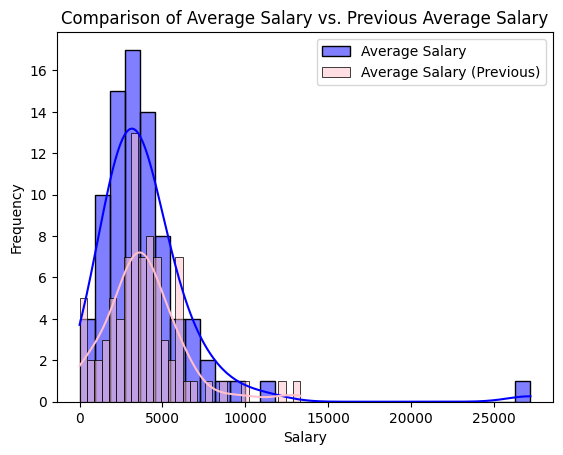

In [ ]:
# Plot 'AverageSalary' histogram
sns.histplot(migration_df['AverageSalary'], bins=30, kde=True, color='blue', alpha=0.5, label='Average Salary')

# Plot 'AverageSalaryPrevious' histogram \\
sns.histplot(migration_df['AverageSalaryPrevious'], bins=30, kde=True, color='pink', alpha=0.5, label='Average Salary (Previous)')

# Title and labels
plt.title('Comparison of Average Salary vs. Previous Average Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Add legend to differentiate the two histograms
plt.legend()

# Show the plot
plt.show()

Summary statistics for 'AverageSalaryDifference':
count        82.00
mean         97.25
std       3,164.77
min     -11,808.65
25%      -1,035.07
50%        -147.46
75%         917.58
max      14,877.27
Name: AverageSalaryDifference, dtype: float64


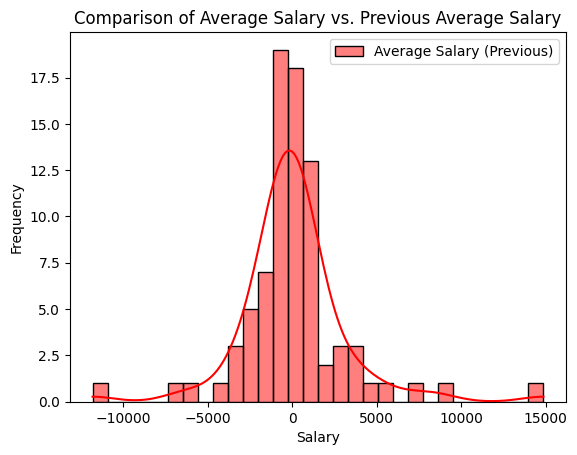

In [ ]:
print("Summary statistics for 'AverageSalaryDifference':")
print(migration_df['AverageSalaryDifference'].describe())

# Plot 'AverageSalaryDifference' histogram
sns.histplot(migration_df['AverageSalaryDifference'], bins=30, kde=True, color='red', alpha=0.5, label='Average Salary (Previous)')

# Title and labels
plt.title('Comparison of Average Salary vs. Previous Average Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Add legend to differentiate the two histograms
plt.legend()

# Show the plot
plt.show()

**ANALYSIS:**

The results indicate that the average salary is on average across the province higher than the average salary of individuals in their previous provinces. Interestingly, upon identifying the average salary difference, migrants often only increased their salary only by about Php 97. The highest average increase was Php 14,88k while the highest average decrease was Php 11.81k.

### Male and Female Percentage Distribution

In [ ]:
# Summary statistics for 'MalePer'
print("Summary statistics for 'MalePerc':")
print(migration_df['MalePerc'].describe())

# Summary statistics for 'FemalePerc'
print("Summary statistics for 'FemalePerc':")
print(migration_df['FemalePerc'].describe())

Summary statistics for 'MalePerc':
count   82.00
mean     0.53
std      0.12
min      0.17
25%      0.47
50%      0.52
75%      0.60
max      1.00
Name: MalePerc, dtype: float64
Summary statistics for 'FemalePerc':
count   82.00
mean     0.47
std      0.12
min      0.00
25%      0.40
50%      0.48
75%      0.53
max      0.83
Name: FemalePerc, dtype: float64


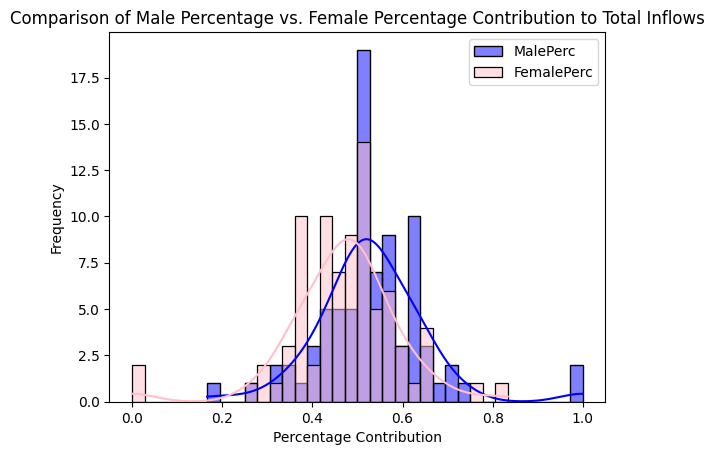

In [ ]:
# Plot 'MalePerc' histogram
sns.histplot(migration_df['MalePerc'], bins=30, kde=True, color='blue', alpha=0.5, label='MalePerc')

# Plot 'FemalePerc' histogram
sns.histplot(migration_df['FemalePerc'], bins=30, kde=True, color='pink', alpha=0.5, label='FemalePerc')

# Title and labels
plt.title('Comparison of Male Percentage vs. Female Percentage Contribution to Total Inflows')
plt.xlabel('Percentage Contribution')
plt.ylabel('Frequency')

# Add legend to differentiate the two histograms
plt.legend()

# Show the plot
plt.show()

**ANALYSIS:**

The dataset revealed an average male percentage of 53% (range: 17%-100%) and female percentage of 47% (range: 0%-83%). Male representation skews slightly higher, with a median of 52% compared to 48% for females.

### Reasons for Moving

To best understand the motivation for migration of individuals from one province to another, the following scripts created histograms of the percentage distribution of moving reasons of inflowing migrants relative to total inflows. This analysis is applied to the entire migration summary dataframe and specificed by sex to control for heterogeneity of the inflowing migrants.

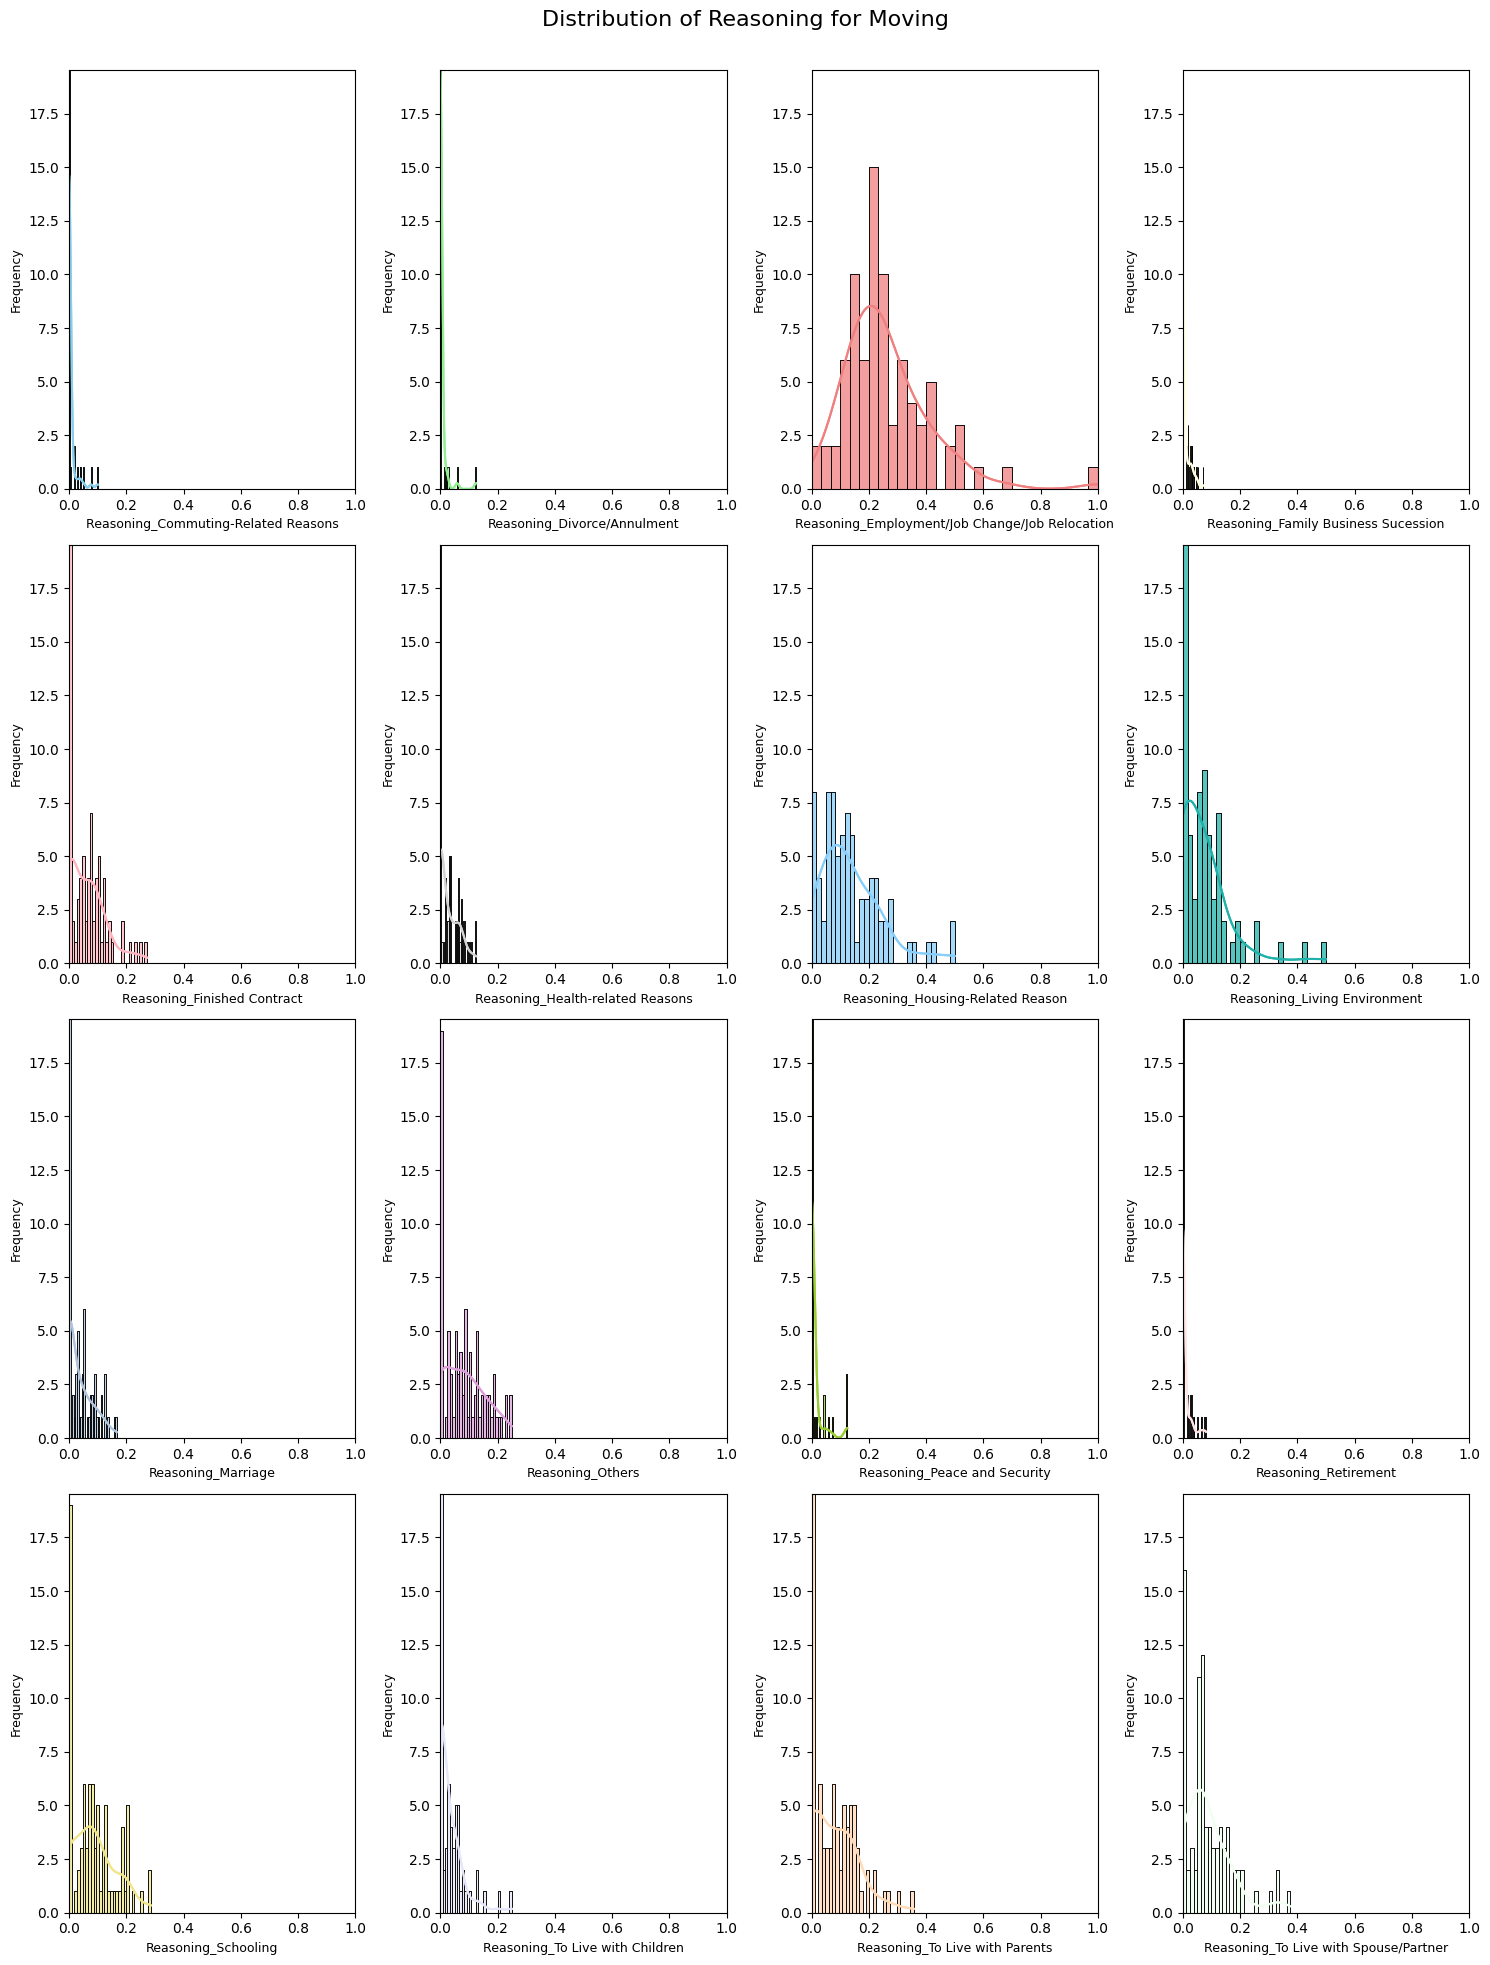

In [ ]:
df_reasons = migration_df.copy()
#Overall
# Get all columns that start with "Reasoning_"
reason_columns = [col for col in migration_df.columns if col.startswith('Reasoning_')]

# Number of subplots (rows x columns)
num_cols = 4  # Number of columns in each row
num_rows = (len(reason_columns) // num_cols) + (1 if len(reason_columns) % num_cols != 0 else 0)

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Define a list of colors for each histogram
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink', 'lightgray', 'lightskyblue', 'lightseagreen',
          'lightsteelblue', 'plum', 'yellowgreen', 'mistyrose', 'khaki', 'lavender', 'peachpuff', 'honeydew', 'mediumslateblue']

# Loop through each column and plot the histogram
for idx, column in enumerate(reason_columns):
    # Check if the column contains numeric values (e.g., if there's any valid data to plot)
    if df_reasons[column].dtype in ['float64', 'int64']:
        # Plot the histogram on the current subplot
        sns.histplot(df_reasons[column], bins=30, kde=True, color=colors[idx % len(colors)], ax=axes[idx])

        axes[idx].set_xlabel(f'{column}', fontsize=9)
        axes[idx].set_ylabel('Frequency', fontsize=9)

# Remove any empty subplots (if there are fewer histograms than subplots)
for i in range(len(reason_columns), len(axes)):
    fig.delaxes(axes[i])

# Get the global x and y limits after plotting all histograms
global_xmin = min([df_reasons[col].min() for col in reason_columns if df_reasons[col].dtype in ['float64', 'int64']])
global_xmax = max([df_reasons[col].max() for col in reason_columns if df_reasons[col].dtype in ['float64', 'int64']])

# Estimate the global y limit by checking the maximum density from all histograms
global_ymax = 0
for idx, column in enumerate(reason_columns):
    if df_reasons[column].dtype in ['float64', 'int64']:
        hist_data = sns.histplot(df_reasons[column], bins=30, kde=True, color=colors[idx % len(colors)], ax=axes[idx])
        y_max = max(hist_data.get_lines()[0].get_ydata())
        global_ymax = max(global_ymax, y_max)

# Apply the global axis limits to all subplots
for ax in axes:
    ax.set_xlim(global_xmin, global_xmax)
    ax.set_ylim(0, global_ymax)

# Add a single title for the entire chart
plt.suptitle('Distribution of Reasoning for Moving', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top space for the suptitle
plt.show()

In [ ]:
# Male vs Female Reasons for Moving
# Step 1: Define function to process data by sex
def process_data_by_sex(working_df, sex_value, reason_mapping):
    # Filter data by sex
    data = working_df[working_df['Sex'] == sex_value].copy()

    # Calculate inflow and outflow
    inflow = data.groupby('CurrentResidence').size().reset_index(name='Inflow')
    outflow = data.groupby('PreviousResidence').size().reset_index(name='Outflow')

    # Handle unique outflow and inflow residences
    unique_outflow_residences = outflow[~outflow['PreviousResidence'].isin(inflow['CurrentResidence'])]
    unique_outflow_residences = unique_outflow_residences.rename(columns={'PreviousResidence': 'CurrentResidence'})
    unique_outflow_residences['Inflow'] = 0

    unique_inflow_residences = inflow[~inflow['CurrentResidence'].isin(outflow['PreviousResidence'])]
    unique_inflow_residences = unique_inflow_residences.rename(columns={'CurrentResidence': 'PreviousResidence'})
    unique_inflow_residences['Outflow'] = 0

    # Concatenate unique inflow and outflow data
    inflow = pd.concat([inflow, unique_outflow_residences[['CurrentResidence', 'Inflow']]], ignore_index=True)
    outflow = pd.concat([outflow, unique_inflow_residences[['PreviousResidence', 'Outflow']]], ignore_index=True)

    # Merge inflow and outflow data
    reasons_by_province = pd.merge(
        inflow,
        outflow,
        left_on='CurrentResidence',
        right_on='PreviousResidence',
        how='outer'
    )

    # Fill NaN values
    reasons_by_province['Inflow'] = reasons_by_province['Inflow'].fillna(0)
    reasons_by_province['Outflow'] = reasons_by_province['Outflow'].fillna(0)

    # Map reasons for moving
    data['ReasonForMoving'] = data['ReasonForMoving'].map(reason_mapping)
    reasons_count = data.groupby(['CurrentResidence', 'ReasonForMoving']).size().unstack(fill_value=0)

    # Merge reasons count into reasons_by_province
    reasons_by_province = pd.merge(
        reasons_by_province,
        reasons_count,
        left_on='CurrentResidence',
        right_index=True,
        how='left'
    )

    # Calculate percentage of inflow for each reason
    for reason in reasons_count.columns:
        reasons_by_province[reason] = reasons_by_province.get(reason, 0) / reasons_by_province['Inflow'].replace(0, np.nan)

    # Format the final DataFrame
    reasons_by_province = reasons_by_province[['CurrentResidence', 'Inflow'] + list(reasons_count.columns)]
    reasons_by_province.rename(columns={'CurrentResidence': 'Residence'}, inplace=True)
    reasons_by_province.reset_index(drop=True, inplace=True)

    return reasons_by_province

# Step 2: Process male and female data
reason_mapping_general = {
    '01': 'Schooling',
    '02': 'Employment/Job Change/Relocation',
    '03': 'Family Business Succession',
    '04': 'Finished Contract',
    '05': 'Retirement',
    '06': 'Housing-Related Reasons',
    '07': 'Living Environment',
    '08': 'Commuting-Related Reasons',
    '09': 'To Live with Parents',
    '10': 'To Live with Spouse/Partner',
    '11': 'To Live with Children',
    '12': 'Marriage',
    '13': 'Divorce/Annulment',
    '14': 'Health-Related Reasons',
    '15': 'Peace and Security',
    '90': 'Others',
}

male_reasons = process_data_by_sex(working_df, 1, reason_mapping_general)
female_reasons = process_data_by_sex(working_df, 0, reason_mapping_general)

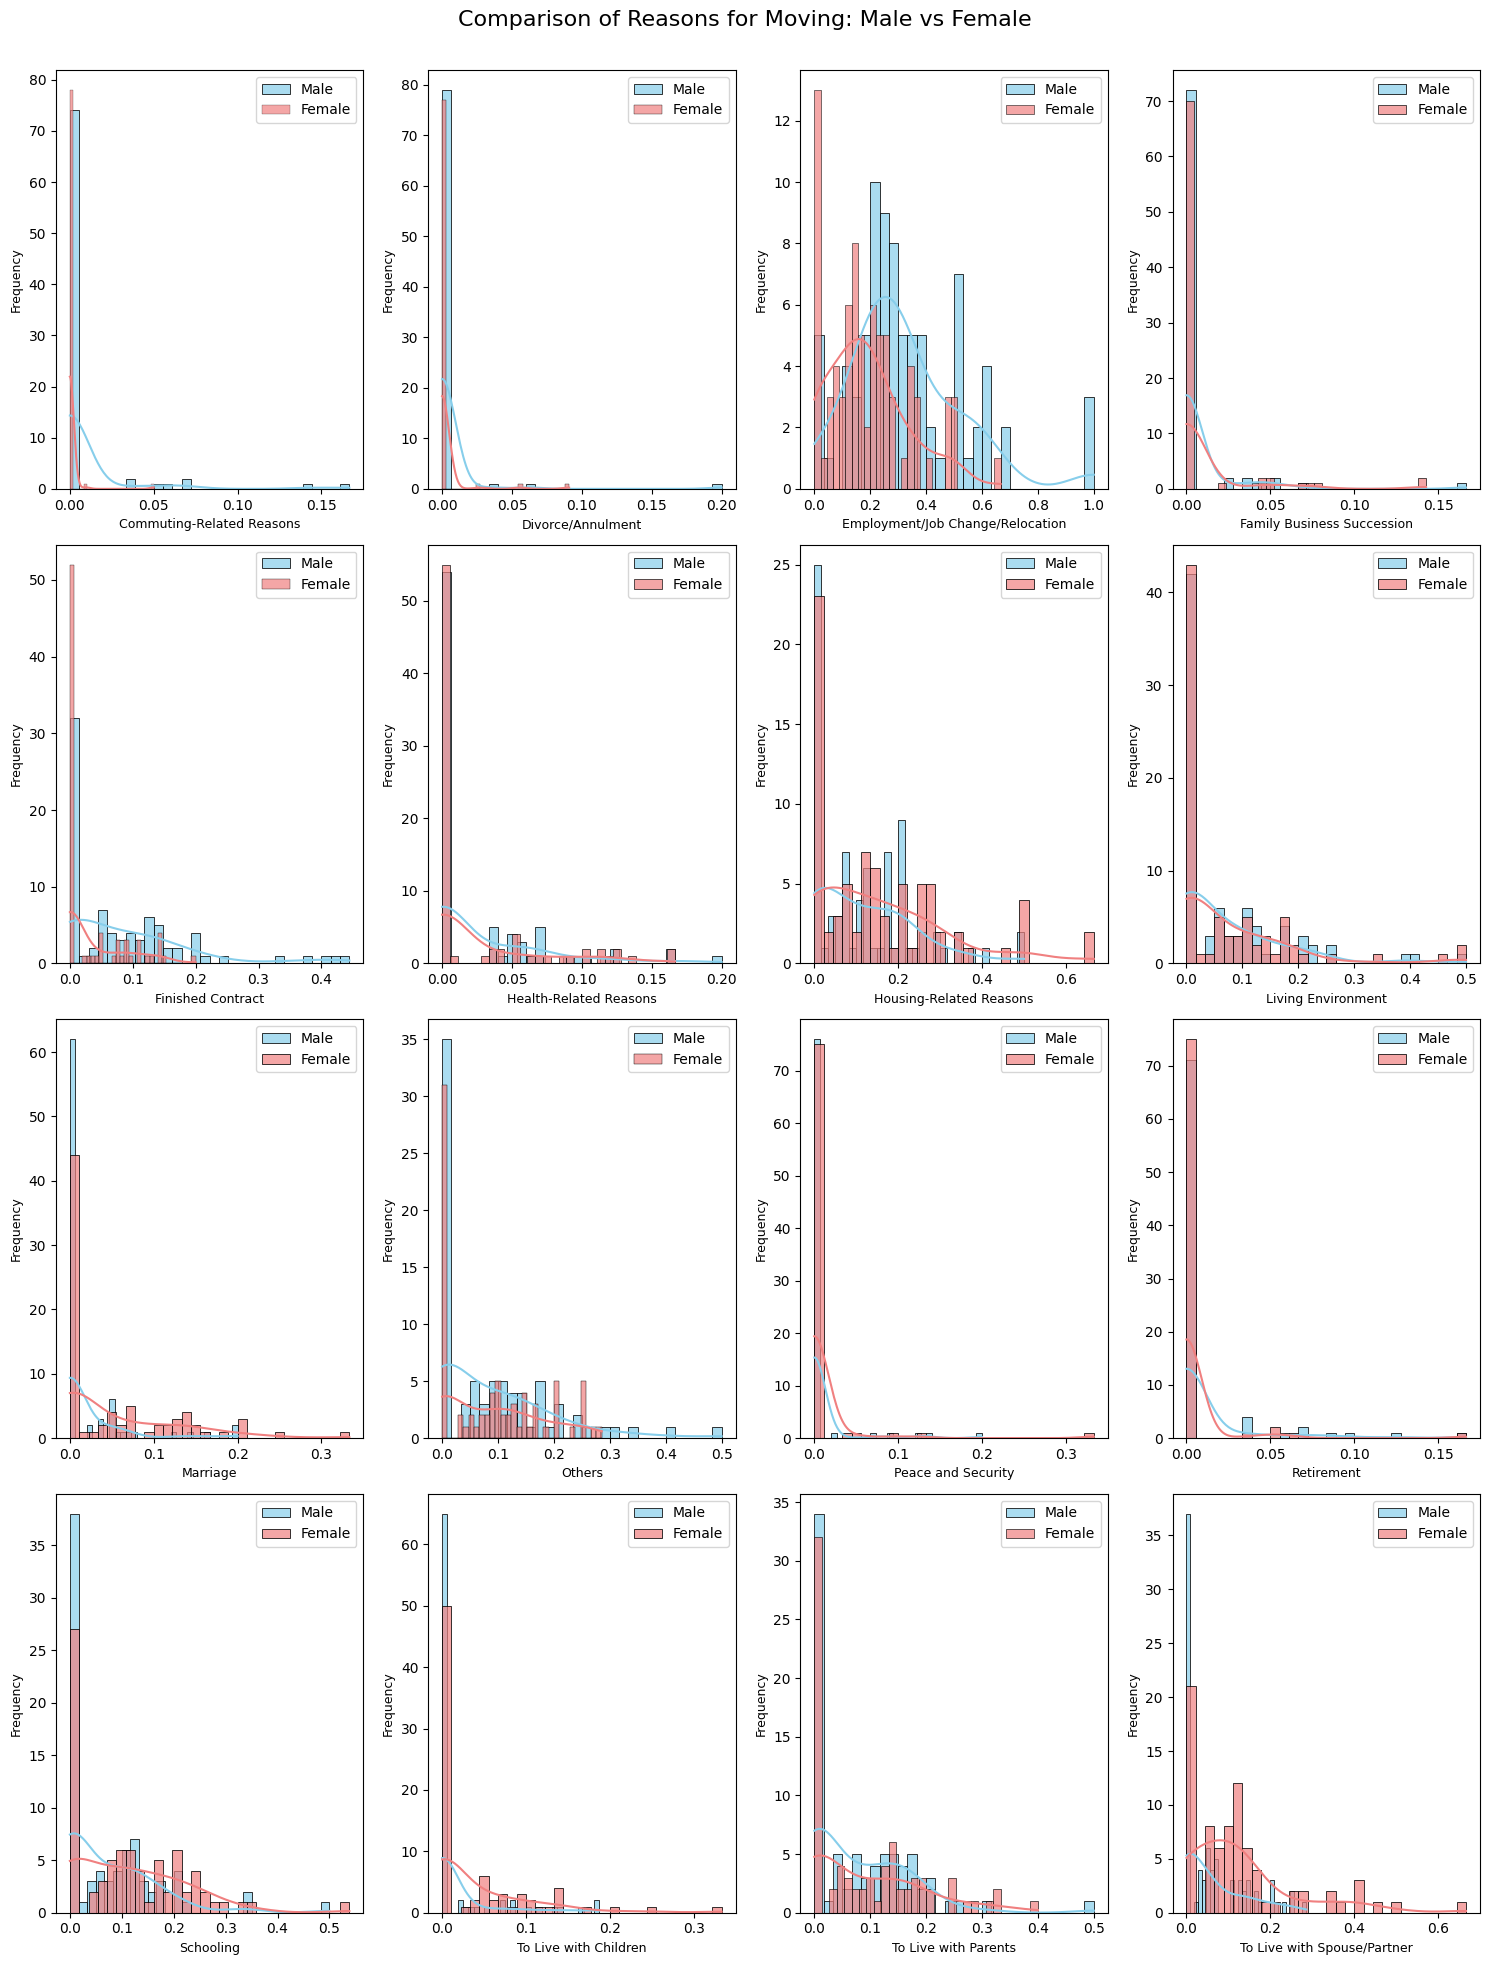

In [ ]:
# Function to plot histograms for comparing reasons between males and females
def plot_histograms(male_reasons, female_reasons, reason_columns):
    # Determine the number of rows and columns for the subplot grid
    num_cols = 4
    num_rows = (len(reason_columns) // num_cols) + (1 if len(reason_columns) % num_cols != 0 else 0)

    # Create a grid of subplots with an appropriate figure size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axes = axes.flatten()  # Flatten the grid of axes for easier indexing
    colors = ['skyblue', 'lightcoral']  # Define colors for male and female histograms

    # Loop through each column in the reason_columns list
    for idx, column in enumerate(reason_columns):
        # Ensure the column exists in both male and female DataFrames
        if column in male_reasons.columns and column in female_reasons.columns:
            # Plot histograms for males and females on the same axes
            sns.histplot(male_reasons[column], bins=30, kde=True, color=colors[0], ax=axes[idx], label='Male', alpha=0.7)
            sns.histplot(female_reasons[column], bins=30, kde=True, color=colors[1], ax=axes[idx], label='Female', alpha=0.7)

            # Set the x-axis and y-axis labels for the subplot
            axes[idx].set_xlabel(f'{column}', fontsize=9)
            axes[idx].set_ylabel('Frequency', fontsize=9)
            axes[idx].legend()  # Add a legend to differentiate male and female data

    # Remove any extra axes that are not used
    for i in range(len(reason_columns), len(axes)):
        fig.delaxes(axes[i])

    # Add a title for the entire figure
    plt.suptitle('Comparison of Reasons for Moving: Male vs Female', fontsize=16)
    plt.tight_layout()  # Adjust layout to prevent overlapping elements
    plt.subplots_adjust(top=0.95)  # Adjust the top margin for the title
    plt.show()  # Display the plot

# Create a list of reason columns that are common to both dataframes
reason_columns = [col for col in male_reasons.columns if col in reason_mapping_general.values()]

# Call the function to plot histograms for the specified columns
plot_histograms(male_reasons, female_reasons, reason_columns)

**ANALYSIS:**

*General:*

The overall distribution of reasons for moving highlights employment/job change or relocation as the most significant driver, with a higher percentage compared to other reasons. Family-related motives, such as marriage and living with a spouse/partner, also play an important role. Other reasons, including health, housing, peace and security, and retirement, exhibit relatively low percentage contribution. The distribution suggests that economic factors and family dynamics are key influencers of migration, while less frequent factors like commuting, divorce, or business succession have minimal impact.


*By Gender:*
* **Employment/Job Change/Relocation:** This appears to be the most prominent reason for both males and females, showing higher relative frequencies compared to other reasons. Male distribution skews slightly higher than female in this category, suggesting it may be a stronger driver for male migration. Other reasons as to why the male distribution skews slightly higher than female is because of the job opportunities present in the area.

* **Marriage:** A notable proportion of females move due to marriage compared to males. This aligns with traditional societal norms where women may relocate post-marriage more often than men.

* **To Live with Spouse/Partner:** Similar to the marriage category, females show higher frequencies than males, reinforcing the observation about family-driven migration.

* **Schooling:** Both males and females show similar frequencies, with a slight edge for females in some bins, suggesting balanced educational opportunities or needs.

* **Family-Related Reasons (sucha as To Live with Parents and To Live with Children):** Females show higher migration for family-related reasons compared to males, reflecting caregiving or familial support roles.

* **Retirement:** Minimal frequency for both genders, but males slightly outnumber females, possibly indicating male dominance in career-driven relocations over a lifetime.

* **Divorce/Annulment:** The frequency is low across both genders, but slightly higher for females, which might reflect a greater likelihood of females relocating after marital disruptions.

* **Health-Related and Peace and Security:** These reasons show similar low frequencies for both genders, indicating they are not major drivers of migration in this dataset.

* **Living Environment and Housing-Related Reasons:** Both genders appear evenly distributed, with no major differences in frequency, suggesting that these factors affect males and females equally.


### GDP per Capita, Poverty Gap, Population Density, Unemployment Rate, and Risk Score

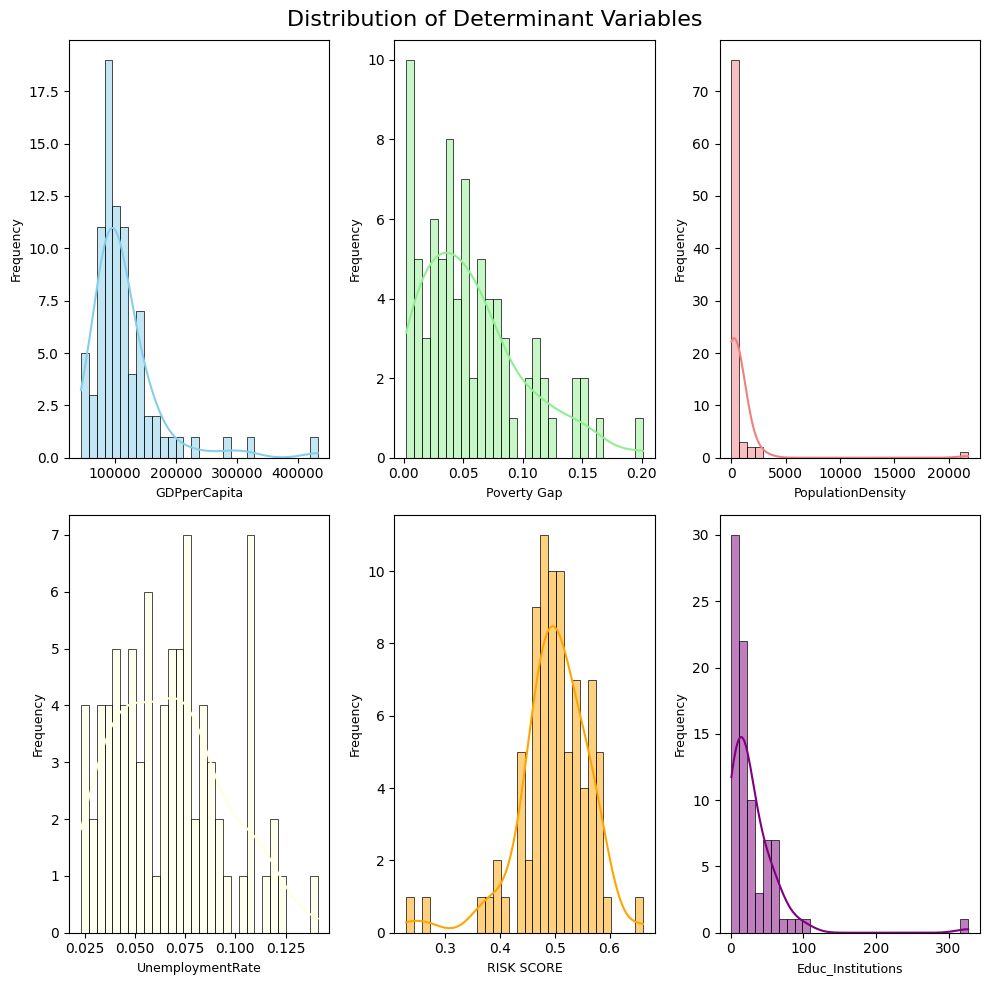

In [ ]:
# List of columns to plot
columns_to_plot = ['GDPperCapita', 'Poverty Gap', 'PopulationDensity',
                   'UnemploymentRate', 'RISK SCORE', 'Educ_Institutions']

# Number of columns and rows for subplots
num_cols = 3  # Number of subplots per row
num_rows = (len(columns_to_plot) // num_cols) + (1 if len(columns_to_plot) % num_cols != 0 else 0)

# Set up the figure and axes grid for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Define a color palette for the histograms
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'orange', 'purple']

# Loop through each column and plot a histogram
for idx, column in enumerate(columns_to_plot):
    # Check if the column has numeric data
    if migration_df[column].dtype in ['float64', 'int64']:
        sns.histplot(
            data=migration_df[column],  # Data to plot
            bins=30,  # Number of bins
            kde=True,  # Show kernel density estimate
            color=colors[idx],  # Color for the histogram
            ax=axes[idx]  # Plot on the corresponding subplot
        )
        # Set labels for the x and y axes
        axes[idx].set_xlabel(column, fontsize=9)
        axes[idx].set_ylabel('Frequency', fontsize=9)

# Remove empty subplots if any
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Add a single title for the entire plot
plt.suptitle('Distribution of Determinant Variables', fontsize=16)

# Adjust layout for spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95)

# Display the plot
plt.show()

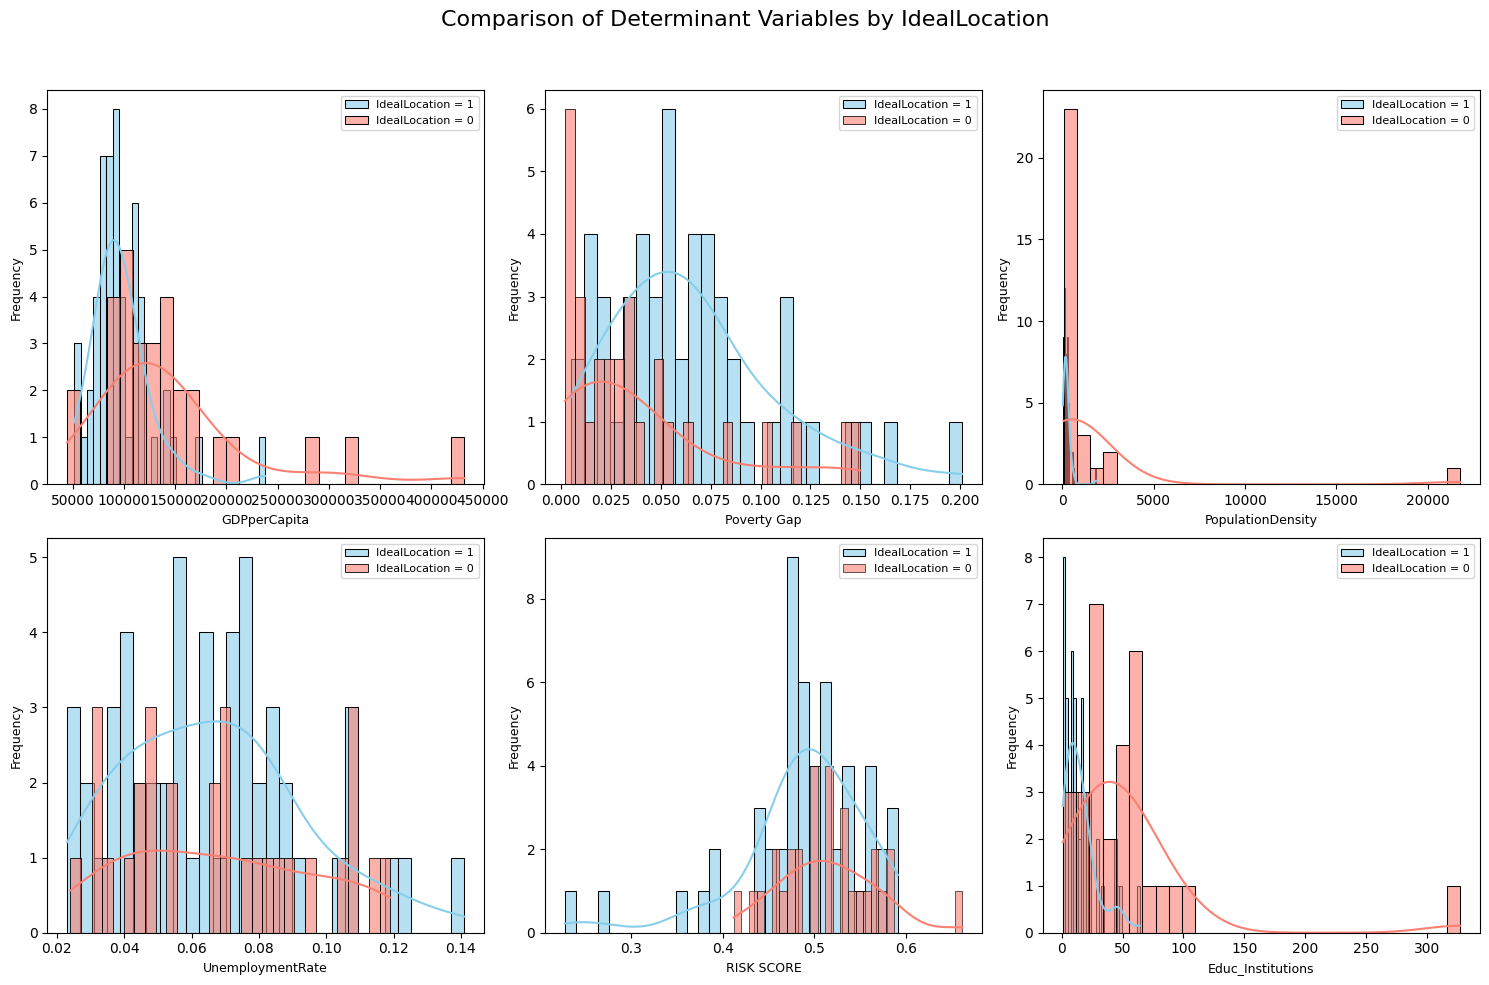

In [ ]:
# List of columns to plot
columns_to_plot = ['GDPperCapita', 'Poverty Gap', 'PopulationDensity',
                   'UnemploymentRate', 'RISK SCORE', 'Educ_Institutions']

# Number of columns and rows for subplots
num_cols = 3  # Number of subplots per row
num_rows = (len(columns_to_plot) // num_cols) + (1 if len(columns_to_plot) % num_cols != 0 else 0)

# Set up the figure and axes grid for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Define color palette for the two groups
colors = ['skyblue', 'salmon']  # Colors for IdealLocation = 1 and 0

# Loop through each column to plot histograms
for idx, column in enumerate(columns_to_plot):
    # Check if the column has numeric data
    if migration_df[column].dtype in ['float64', 'int64']:
        # Filter data based on IdealLocation
        data_ideal_1 = migration_df[migration_df['IdealLocation'] == 1][column]
        data_ideal_0 = migration_df[migration_df['IdealLocation'] == 0][column]

        # Plot histograms for IdealLocation = 1 and 0
        sns.histplot(
            data=data_ideal_1, bins=30, kde=True, color=colors[0],
            label='IdealLocation = 1', ax=axes[idx], alpha=0.6
        )
        sns.histplot(
            data=data_ideal_0, bins=30, kde=True, color=colors[1],
            label='IdealLocation = 0', ax=axes[idx], alpha=0.6
        )

        # Set labels and title for each subplot
        axes[idx].set_xlabel(column, fontsize=9)
        axes[idx].set_ylabel('Frequency', fontsize=9)
        axes[idx].legend(loc='upper right', fontsize=8)

# Remove empty subplots if any
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Add a single title for the entire figure
plt.suptitle('Comparison of Determinant Variables by IdealLocation', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Display the plot
plt.show()

**ANALYSIS:**

* **GDP per Capita:** GDP per Capita is right skewed, having a small portion of provinces have substantially larger GDP per capita compared to other provinces. When comparing those provinces labeled as ideal locations, these usually have a lower GDP per capita on average compared to those who are not ideal locations.

* **Poverty Gap:** Poverty Gap is also skewed to the right, with a large portion of provinces having there poverty gap below 5%. Interestingly, ideal locations typically have higher poverty gap compared to those who are not.

* **Population Density:** Population density is right skewed with only a few provinces having substantially larger values verseus to others. When comparing ideal and not ideal locations, population density remained relatively the same but ideal locations have more outliers.

* **Unemployment Rate:** The unemployment rate of provinces are skewed to the right with most provinces having less than 10% unemployment but there are several outliers. Whether a province is an ideal location or not does not seem to substantilly correlate with their unemployment.

* **Risk Score:** The risk score of provinces are left skewed, meaning only a few provinces reported low risks to natural hazards. Interestingly these provinces are mostly ideal locations where there is an positive net migration.

* **Number of Higher Education Institutions:** The number of higher education institutions is right skewed with most provinces having less than 30. Interestingly, provinces deemed as not ideal have a higher number of higher education institutions.

**OVERALL ANALYSIS:**

The exploratory data analysis highlights interesting patterns in intra regional migration within the dataset. The National Capital Region, Leyte, and Agusan del Norte lead in migration inflows, while provinces like Tarlac and Dinagat Islands dominate the lowest inflows. Migration remains concentrated in a few provinces, evidenced by a right-skewed inflow distribution. Economic factors, particularly job changes and relocations, are the primary migration drivers, followed by family-related reasons such as marriage and cohabitation. Gender-specific patterns emerge, with males migrating more for employment and females for marriage and family.

New patterns reveal that provinces with lower GDP per capita and higher poverty gaps tend to be "ideal" locations, challenging traditional economic assumptions. Risk scores are a critical factor, as provinces with low natural hazard risks seemingly correlates with positive net migration. This might be because the demand for employees are high in areas with lower GDP per capita and employers might be willing to pay more for their employees to ensure that they will stay in the area where the company resides.

## 3.B. Missing Data Imputation

### Descriptives of Missing Data

In order to properly input the data into the prepared machine learning models, the team first handled the missing data. The following codes identify features where there are missing data points in which an analysis will be done on the specific data points that have missing information.

In [ ]:
migration_df.isnull().sum()

Residence                                         0
Inflow                                            0
Outflow                                           0
NetMigration                                      0
IdealLocation                                     0
AverageSalary                                     2
AverageSalaryPrevious                             2
AverageSalaryDifference                           2
MalePerc                                          2
FemalePerc                                        2
Reasoning_Commuting-Related Reasons               2
Reasoning_Divorce/Annulment                       2
Reasoning_Employment/Job Change/Job Relocation    2
Reasoning_Family Business Sucession               2
Reasoning_Finished Contract                       2
Reasoning_Health-related Reasons                  2
Reasoning_Housing-Related Reason                  2
Reasoning_Living Environment                      2
Reasoning_Marriage                                2
Reasoning_Others                                  2
Reasoning_Peace and Security                      2
Reasoning_Retirement                              2
Reasoning_Schooling                               2
Reasoning_To Live with Children                   2
Reasoning_To Live with Parents                    2
Reasoning_To Live with Spouse/Partner             2
GDPperCapita                                      1
Poverty Gap                                       3
PopulationDensity                                 0
UnemploymentRate                                  0
RISK SCORE                                        0
Educ_Institutions                                 0
dtype: int64

In [ ]:
migration_df[migration_df['AverageSalaryDifference'].isna()]

Residence  Inflow  Outflow  NetMigration  IdealLocation  \
32  DINAGAT ISLANDS       0        2            -2              0   
78           TARLAC       0       15           -15              0   

    AverageSalary  AverageSalaryPrevious  AverageSalaryDifference  MalePerc  \
32            NaN                    NaN                      NaN       NaN   
78            NaN                    NaN                      NaN       NaN   

    FemalePerc  ...  Reasoning_Schooling  Reasoning_To Live with Children  \
32         NaN  ...                  NaN                              NaN   
78         NaN  ...                  NaN                              NaN   

    Reasoning_To Live with Parents  Reasoning_To Live with Spouse/Partner  \
32                             NaN                                    NaN   
78                             NaN                                    NaN   

    GDPperCapita  Poverty Gap  PopulationDensity  UnemploymentRate  \
32     91,174.67          NaN                157              0.07   
78    129,117.17         0.03                494              0.07   

    RISK SCORE  Educ_Institutions  
32        0.41                  1  
78        0.50                 26  

[2 rows x 32 columns]

In [ ]:
migration_df[migration_df['Reasoning_Employment/Job Change/Job Relocation'].isna()]

Residence  Inflow  Outflow  NetMigration  IdealLocation  \
32  DINAGAT ISLANDS       0        2            -2              0   
78           TARLAC       0       15           -15              0   

    AverageSalary  AverageSalaryPrevious  AverageSalaryDifference  MalePerc  \
32            NaN                    NaN                      NaN       NaN   
78            NaN                    NaN                      NaN       NaN   

    FemalePerc  ...  Reasoning_Schooling  Reasoning_To Live with Children  \
32         NaN  ...                  NaN                              NaN   
78         NaN  ...                  NaN                              NaN   

    Reasoning_To Live with Parents  Reasoning_To Live with Spouse/Partner  \
32                             NaN                                    NaN   
78                             NaN                                    NaN   

    GDPperCapita  Poverty Gap  PopulationDensity  UnemploymentRate  \
32     91,174.67          NaN                157              0.07   
78    129,117.17         0.03                494              0.07   

    RISK SCORE  Educ_Institutions  
32        0.41                  1  
78        0.50                 26  

[2 rows x 32 columns]

In [ ]:
migration_df[migration_df['GDPperCapita'].isna()]

Residence  Inflow  Outflow  NetMigration  IdealLocation  \
27  COTABATO CITY      27        9            18              1   

    AverageSalary  AverageSalaryPrevious  AverageSalaryDifference  MalePerc  \
27       6,909.63               4,318.52                 2,591.11      0.56   

    FemalePerc  ...  Reasoning_Schooling  Reasoning_To Live with Children  \
27        0.44  ...                 0.04                             0.00   

    Reasoning_To Live with Parents  Reasoning_To Live with Spouse/Partner  \
27                            0.07                                   0.15   

    GDPperCapita  Poverty Gap  PopulationDensity  UnemploymentRate  \
27           NaN         0.06               1847              0.09   

    RISK SCORE  Educ_Institutions  
27        0.48                 18  

[1 rows x 32 columns]

In [ ]:
migration_df[migration_df['Poverty Gap'].isna()]

Residence  Inflow  Outflow  NetMigration  IdealLocation  \
10           BATANES       4        0             4              1   
30  DAVAO OCCIDENTAL      40        3            37              1   
32   DINAGAT ISLANDS       0        2            -2              0   

    AverageSalary  AverageSalaryPrevious  AverageSalaryDifference  MalePerc  \
10       2,500.00               3,750.00                -1,250.00      0.50   
30       2,437.50               2,912.57                  -475.07      0.53   
32            NaN                    NaN                      NaN       NaN   

    FemalePerc  ...  Reasoning_Schooling  Reasoning_To Live with Children  \
10        0.50  ...                 0.00                             0.00   
30        0.47  ...                 0.07                             0.05   
32         NaN  ...                  NaN                              NaN   

    Reasoning_To Live with Parents  Reasoning_To Live with Spouse/Partner  \
10                            0.00                                   0.00   
30                            0.20                                   0.05   
32                             NaN                                    NaN   

    GDPperCapita  Poverty Gap  PopulationDensity  UnemploymentRate  \
10    237,887.28          NaN                 93              0.09   
30     99,325.40          NaN                147              0.04   
32     91,174.67          NaN                157              0.07   

    RISK SCORE  Educ_Institutions  
10        0.23                  2  
30        0.47                  1  
32        0.41                  1  

[3 rows x 32 columns]

**ANALYSIS:**

From the data, 23 out of the 32 columns have missing data. Out of the 23, 21 columns had missing data due to the nature of their computation since there were no recorded inflows for provinces Dinagat Islands and Tarlac from 2013 to 2018 from the dataset. Since columns such as MalePerc and the percentage contribution of reasons for moving were calculated from the inflows, this would consequently lead to these columns to have missing information for the 2 provinces. This leaves only 2 columns with missing data to investigate further: GDP per Capita and Poverty Gap.

### Little's MCAR Test

Little's MCAR (Missing Completely at Random) test assesses whether missing data is unrelated to both observed and unobserved data. In this analysis, it was applied to GDP per Capita and Poverty Gap, using the IdealLocation column to determine if missingness is purely random or influenced by underlying patterns.

In [ ]:
# Create a copy of the migration_df DataFrame
df_test = migration_df[['Residence',	'Inflow',	'Outflow','NetMigration',	'IdealLocation', 'GDPperCapita', 'Poverty Gap']].copy()

# Identify columns with missing values
missing_cols = [col for col in df_test.columns if df_test[col].isnull().sum() > 0]

# Specify a numerical column to compare (replace 'numerical_column' with your actual column)
numerical_column = 'IdealLocation'  # Replace with a relevant numerical column name

# Perform the test for each column with missing data
for col in missing_cols:
    print(f"Testing missingness for column: {col}")

    # Create a binary indicator for missing data in the current column
    df_test[f'{col}_missing'] = df_test[col].isnull().astype(int)

    # Separate the numerical column data based on missingness
    with_missing = df_test[df_test[f'{col}_missing'] == 1][numerical_column]
    without_missing = df_test[df_test[f'{col}_missing'] == 0][numerical_column]

    # Skip if there are insufficient valid data points
    if with_missing.isnull().all() or without_missing.isnull().all():
        print(f"Skipping {col} due to insufficient valid numerical data.")
        continue

    # Perform the t-test
    t_stat, p_value = stats.ttest_ind(with_missing.dropna(), without_missing.dropna(), equal_var=False)

    # Print results
    print(f"T-test results for {col}: t-statistic = {t_stat}, p-value = {p_value}")

    # Interpretation
    if p_value < 0.05:
        print(f"The missing data in column '{col}' is NOT MCAR (p < 0.05).")
    else:
        print(f"The missing data in column '{col}' is MCAR (p >= 0.05).")
    print("-" * 50)

Testing missingness for column: GDPperCapita
T-test results for GDPperCapita: t-statistic = nan, p-value = nan
The missing data in column 'GDPperCapita' is MCAR (p >= 0.05).
--------------------------------------------------
Testing missingness for column: Poverty Gap
T-test results for Poverty Gap: t-statistic = 0.07313457579265957, p-value = 0.9480597680123237
The missing data in column 'Poverty Gap' is MCAR (p >= 0.05).
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


The results of the test suggest that the missing data is purely random and should not significantly impact our analysis or model development. Overall, in the migration summary dataframe, the missing data likely arises from either a lack of information at the survey level or random occurrence. To address this, the group opts to drop data points with missing features, as they cannot be directly compared to those with complete information. Additionally, imputing missing values may risk introducing biases or substantially affecting the outcomes of model development.

In [ ]:
migration_summary_main = migration_df.copy()
migration_summary_filtered = migration_df.copy().dropna()
migration_summary_0 = migration_df.copy().fillna(0, inplace=True)
migration_summary = migration_summary_filtered.drop(columns=['Inflow', 'Outflow', 'NetMigration', 'AverageSalaryPrevious'])

migration_summary.isnull().sum()

Residence                                         0
IdealLocation                                     0
AverageSalary                                     0
AverageSalaryDifference                           0
MalePerc                                          0
FemalePerc                                        0
Reasoning_Commuting-Related Reasons               0
Reasoning_Divorce/Annulment                       0
Reasoning_Employment/Job Change/Job Relocation    0
Reasoning_Family Business Sucession               0
Reasoning_Finished Contract                       0
Reasoning_Health-related Reasons                  0
Reasoning_Housing-Related Reason                  0
Reasoning_Living Environment                      0
Reasoning_Marriage                                0
Reasoning_Others                                  0
Reasoning_Peace and Security                      0
Reasoning_Retirement                              0
Reasoning_Schooling                               0
Reasoning_To Live with Children                   0
Reasoning_To Live with Parents                    0
Reasoning_To Live with Spouse/Partner             0
GDPperCapita                                      0
Poverty Gap                                       0
PopulationDensity                                 0
UnemploymentRate                                  0
RISK SCORE                                        0
Educ_Institutions                                 0
dtype: int64

In [ ]:
residences_main = set(migration_summary_main['Residence'])
residences_summary = set(migration_summary['Residence'])

missing_residences = residences_main - residences_summary
missing_residences
print("Shape of Original Migration Summary Dataframe:", migration_summary_main.shape)
print("Shape of Migration Summary Dataframe:", migration_summary.shape)
print("Provinces not included were:", missing_residences)

Shape of Original Migration Summary Dataframe: (84, 32)
Shape of Migration Summary Dataframe: (79, 28)
Provinces not included were: {'COTABATO CITY', 'DINAGAT ISLANDS', 'DAVAO OCCIDENTAL', 'BATANES', 'TARLAC'}


**ANALYSIS:**

From the original dataframe with 84 rows and 32 columns, the migration summary dataframe was made which reduced the number of observed provinces to 79 and removed features that are unnecessary for the model development. The excluded provinces were mostly small provinces that did not report a poverty gap or had no inflows.

## 3.C. Feature selection

Feature selection is crucial in machine learning models (KNN, Random Forest, Logistic Regression) to identify key factors influencing net migration in provinces. By reducing irrelevant or redundant features, models achieve better performance, interpretability, and efficiency. Thus, the group decided to utilize two types of feature selection:

1. **Correlation Analysis** highlights relationships between variables, revealing critical drivers such job opportunities, education access, and GDP per capita while excluding weakly correlated factors.

2. **Mutual Information further** identifies non-linear dependencies, ensuring inclusion of influential variables.

### Correlation Analysis

In [ ]:
migration_summary_CA = migration_summary.drop(columns=['Residence']).copy()
migration_summary_CA.dtypes

IdealLocation                                       int64
AverageSalary                                     float64
AverageSalaryDifference                           float64
MalePerc                                          float64
FemalePerc                                        float64
Reasoning_Commuting-Related Reasons               float64
Reasoning_Divorce/Annulment                       float64
Reasoning_Employment/Job Change/Job Relocation    float64
Reasoning_Family Business Sucession               float64
Reasoning_Finished Contract                       float64
Reasoning_Health-related Reasons                  float64
Reasoning_Housing-Related Reason                  float64
Reasoning_Living Environment                      float64
Reasoning_Marriage                                float64
Reasoning_Others                                  float64
Reasoning_Peace and Security                      float64
Reasoning_Retirement                              float64
Reasoning_Schooling                               float64
Reasoning_To Live with Children                   float64
Reasoning_To Live with Parents                    float64
Reasoning_To Live with Spouse/Partner             float64
GDPperCapita                                      float64
Poverty Gap                                       float64
PopulationDensity                                   int64
UnemploymentRate                                  float64
RISK SCORE                                        float64
Educ_Institutions                                   int64
dtype: object

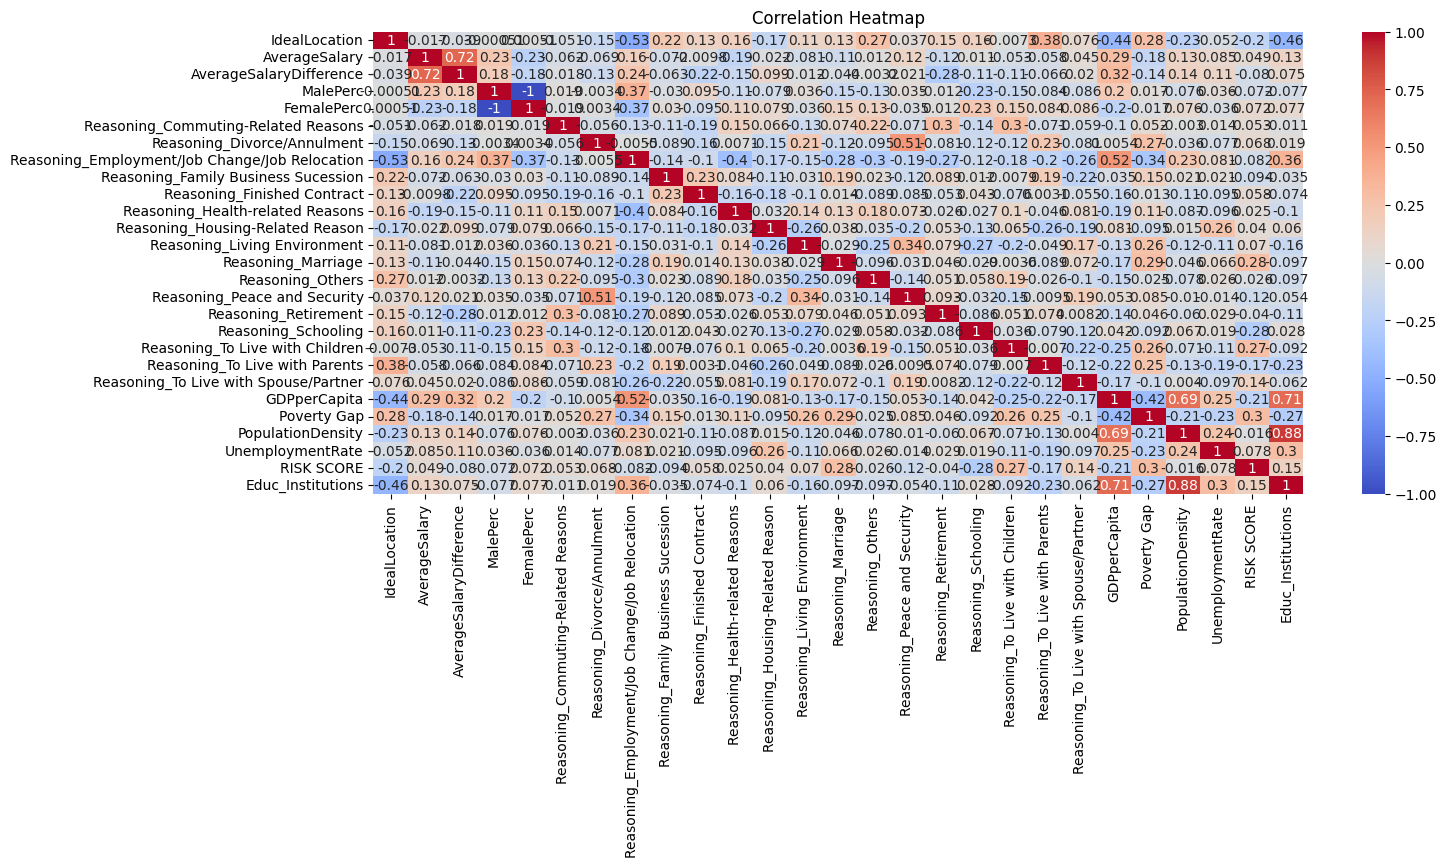

In [ ]:
# Drop unnecessary columns
migration_summary_CA = migration_summary.drop(columns=['Residence']).copy()

# Identify non-dummy columns
non_dummy_columns = [
    col for col in migration_summary_CA.columns
    if migration_summary_CA[col].nunique() > 2
]

# Create a new DataFrame with only non-dummy columns and 'IdealLocation'
fs_corr_df = migration_summary_CA[['IdealLocation'] + non_dummy_columns]

# Compute correlation
df_corr = fs_corr_df.corr()

# Plot heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**ANALYSIS:**

The correlation heatmap provides insights into the relationships between various variables in the dataset, with correlation values ranging from -1 (strong negative) to 1 (strong positive). `IdealLocation` demonstrates weak correlations with most variables, indicating that the preference for an ideal location is influenced by diverse and possibly less quantifiable factors. The strongest correlations observed are negative, such as with `Educ_Institutions` (-0.46) and `GDPperCapita` (-0.44). This suggests that areas with more educational institutions and higher economic output per capita are less likely to be considered ideal locations, potentially reflecting a preference for less urbanized or industrialized environments.

There also seems to be a preference for equality of life. `IdealLocation` shows a  positive correlation with `AverageSalary` (0.17) while there was a negative relationship with `Poverty Gap` (-0.28), indicating that regions offering higher salaries and less inequality is more appealing as ideal locations. Other variables, such as `PopulationDensity` (-0.23) and `RISK SCORE` (-0.20), indicate that densely populated or high-risk areas are less likely to be viewed as ideal.

In [ ]:
# Rank features based on correlation
corr_matrix = fs_corr_df.corr()

target_corr = corr_matrix['IdealLocation'].abs()

correlation_ranking = target_corr.sort_values(ascending=False)

print("Feature Ranking Based on Correlation:")
print(correlation_ranking)


Feature Ranking Based on Correlation:
IdealLocation                                    1.00
Reasoning_Employment/Job Change/Job Relocation   0.53
Educ_Institutions                                0.46
GDPperCapita                                     0.44
Reasoning_To Live with Parents                   0.38
Poverty Gap                                      0.28
Reasoning_Others                                 0.27
PopulationDensity                                0.23
Reasoning_Family Business Sucession              0.22
RISK SCORE                                       0.20
Reasoning_Housing-Related Reason                 0.17
Reasoning_Schooling                              0.16
Reasoning_Health-related Reasons                 0.16
Reasoning_Divorce/Annulment                      0.15
Reasoning_Retirement                             0.15
Reasoning_Finished Contract                      0.13
Reasoning_Marriage                               0.13
Reasoning_Living Environment                

**ANALYSIS:**

The correlation analysis ranks features based on their absolute correlation with the target variable, IdealLocation. Reasoning_Employment/Job Change/Job Relocation has the strongest correlation (0.53), emphasizing the significance of career-related factors in determining location preferences. Educ_Institutions (0.46) and GDPperCapita (0.44) follow closely, underscoring the role of access to education and economic prosperity in influencing ideal location choices.

Family-related factors, such as Reasoning_To Live with Parents (0.38) and Reasoning_Family Business Succession (0.22), also show moderate correlations, reflecting the importance of familial considerations. Socioeconomic factors like Poverty Gap (0.28) and PopulationDensity (0.23) further highlight broader contextual influences. Surprisingly, variables like MalePerc (0.00), Reasoning_To Live with Children (0.01), and AverageSalary (0.02) exhibit negligible correlations, suggesting they have little to no impact on location preferences.

Overall, the results reveal that career, education, economic conditions, and family-related factors are primary drivers of location desirability, while demographic and individual income variables play a minimal role.

### Mutual information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

import random
np.random.seed(42)

# Drop unnecessary columns
migration_summary_MI = migration_summary.drop(columns=['Residence']).copy()

X = migration_summary_MI.drop('IdealLocation', axis=1)
y = migration_summary_MI['IdealLocation']

mi = mutual_info_classif(X, y, discrete_features='auto')

mi_df = pd.DataFrame(mi, index=X.columns, columns=['Mutual Information'])
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print("Feature Ranking Based on Mutual Information:")
print(mi_df)

Feature Ranking Based on Mutual Information:
                                                Mutual Information
Educ_Institutions                                             0.23
Reasoning_Employment/Job Change/Job Relocation                0.18
GDPperCapita                                                  0.15
Poverty Gap                                                   0.10
Reasoning_Others                                              0.10
PopulationDensity                                             0.09
Reasoning_Housing-Related Reason                              0.09
FemalePerc                                                    0.06
Reasoning_To Live with Parents                                0.06
MalePerc                                                      0.05
Reasoning_To Live with Spouse/Partner                         0.05
Reasoning_Marriage                                            0.05
Reasoning_Health-related Reasons                              0.01
Reasoning_Family 

**ANALYSIS:**

The mutual information (MI) analysis ranks features by their relevance to predicting the target variable, IdealLocation. Higher MI scores indicate stronger relationships between the features and IdealLocation. Educ_Institutions ranks highest with a score of 0.23, suggesting that the presence of educational institutions is the most significant factor influencing location preferences. Reasoning_Employment/Job Change/Job Relocation (0.19) and GDPperCapita (0.15) are also important, highlighting the role of job opportunities and economic wealth in location desirability. Interestingly, factors such as UnemploymentRate and RISK SCORE show minimal to no contribution, reflecting that broader economic indicators may be less impactful than personal or immediate concerns.

Given this analysis and to avoid including unnecessary variables in the model, the group cuts the number of determinant variables by half. This is in order to ensure accuracy and better predictive capabilities for the model development.

In [ ]:
# Drop the 'IdealLocation' column from the correlation ranking DataFrame
correlation_ranking_no_ideal = correlation_ranking.drop('IdealLocation')

# Convert the indices of the updated correlation ranking DataFrame to a list
top_corr_vars = correlation_ranking_no_ideal.index.tolist()

# Retain only the top half of the variables based on their ranking
top_corr_vars = top_corr_vars[:int(len(top_corr_vars) * 0.75)]

# Convert the indices of the mutual information DataFrame to a list
top_mi_vars = mi_df.index.tolist()

# Retain only the top half of the variables based on their ranking
top_mi_vars = top_mi_vars[:int(len(top_mi_vars) * 0.75)]

# Combine the top variables from both rankings and remove duplicates
top_vars = list(set(top_corr_vars + top_mi_vars))

# Print the combined list of top variables
print("Top variables to keep based on correlation and MI rankings:")
print(top_vars)

Top variables to keep based on correlation and MI rankings:
['Reasoning_Divorce/Annulment', 'PopulationDensity', 'Reasoning_Others', 'Reasoning_To Live with Spouse/Partner', 'Reasoning_Health-related Reasons', 'Reasoning_Schooling', 'Reasoning_Retirement', 'GDPperCapita', 'MalePerc', 'Reasoning_To Live with Parents', 'Reasoning_Employment/Job Change/Job Relocation', 'UnemploymentRate', 'Reasoning_Marriage', 'RISK SCORE', 'Reasoning_Living Environment', 'FemalePerc', 'Educ_Institutions', 'Reasoning_Housing-Related Reason', 'Reasoning_Family Business Sucession', 'Poverty Gap', 'Reasoning_Finished Contract']


In [ ]:
#Filter migration summary to only the necessary variables
migration_summary_selected = migration_summary[['Residence','IdealLocation'] + top_vars]
migration_summary_selected

Residence  IdealLocation  Reasoning_Divorce/Annulment  \
0                  ABRA              1                         0.00   
1      AGUSAN DEL NORTE              1                         0.01   
2        AGUSAN DEL SUR              0                         0.00   
3                 AKLAN              1                         0.00   
4                 ALBAY              1                         0.00   
..                  ...            ...                          ...   
79            TAWI-TAWI              1                         0.00   
80             ZAMBALES              0                         0.00   
81  ZAMBOANGA DEL NORTE              1                         0.00   
82    ZAMBOANGA DEL SUR              1                         0.00   
83    ZAMBOANGA SIBUGAY              1                         0.00   

    PopulationDensity  Reasoning_Others  \
0                  60              0.07   
1                 148              0.11   
2                  74              0.00   
3                 350              0.09   
4                 534              0.11   
..                ...               ...   
79                121              0.10   
80                179              0.00   
81                143              0.17   
82                234              0.13   
83                192              0.06   

    Reasoning_To Live with Spouse/Partner  Reasoning_Health-related Reasons  \
0                                    0.07                              0.12   
1                                    0.05                              0.09   
2                                    0.33                              0.00   
3                                    0.09                              0.00   
4                                    0.11                              0.00   
..                                    ...                               ...   
79                                   0.00                              0.00   
80                                   0.00                              0.00   
81                                   0.03                              0.11   
82                                   0.16                              0.02   
83                                   0.10                              0.00   

    Reasoning_Schooling  Reasoning_Retirement  GDPperCapita  ...  \
0                  0.12                  0.00     81,660.28  ...   
1                  0.11                  0.00     94,318.83  ...   
2                  0.00                  0.00     89,622.55  ...   
3                  0.05                  0.00     92,302.50  ...   
4                  0.20                  0.00     97,750.31  ...   
..                  ...                   ...           ...  ...   
79                 0.10                  0.00     55,222.17  ...   
80                 0.00                  0.00    120,105.84  ...   
81                 0.17                  0.00    101,370.88  ...   
82                 0.10                  0.00     85,195.06  ...   
83                 0.06                  0.00     77,804.83  ...   

    UnemploymentRate  Reasoning_Marriage  RISK SCORE  \
0               0.04                0.05        0.44   
1               0.07                0.01        0.52   
2               0.05                0.00        0.57   
3               0.11                0.00        0.48   
4               0.11                0.09        0.54   
..               ...                 ...         ...   
79              0.06                0.00        0.44   
80              0.11                0.12        0.51   
81              0.03                0.00        0.50   
82              0.04                0.02        0.53   
83              0.04                0.00        0.47   

    Reasoning_Living Environment  FemalePerc  Educ_Institutions  \
0                           0.07        0.44                  5   
1                           0.12        0.49                 20   
2   

In [ ]:
#Check which columns were dropped
missing_columns = set(migration_summary.columns) - set(migration_summary_selected.columns)

print("Columns in migration_summary but not in migration_summary_selected:")
print(missing_columns)

Columns in migration_summary but not in migration_summary_selected:
{'AverageSalaryDifference', 'Reasoning_Peace and Security', 'Reasoning_Commuting-Related Reasons', 'Reasoning_To Live with Children', 'AverageSalary'}


**ANALYSIS:**

Overall, from a migration summary of 79 data points and 28 features, the number of features reduced to 23. Variable such as salary and other reasons for moving were disregarded due to their weak relationship with migration patterns. From our analysis, the low percentage of inflowing migrants who answered the disregarded reasons were likely the primary reason why their importance was lower compared to the other variables. 'AverageSalary' has low importance in predicting an ideal location since the histograms for "Ideal Locations" and "Non-Ideal Locations" have a significant overlap, particularly in the lower salary ranges and both distributions seem to peak around a similar salary range (around 5,000). If most locations—whether ideal or non-ideal—share similar average salaries, it would reduce the predictive power of salary in determining an ideal location. Moreover, the variable 'AverageSalaryDifference' has low predictive power since across all provinces, the average difference would often settle at a low value, below Php 3,000.



















## 3.D. Imbalanced Data

The following code investigates the distribution of ideal locations because an imbalanced data can significantly affect the performance and reliability of machine learning models and statistical analyses. This can result to biases towards the majority class or misleading metrics. Thus the given code aims performs an analysis of the IdealLocation column in the dataset, including visualizing its distribution, calculating its percentage, and evaluating imbalance using metrics such as entropy, Gini impurity, and Simpson's diversity index.


IdealLocation
1    51
0    28
Name: count, dtype: int64


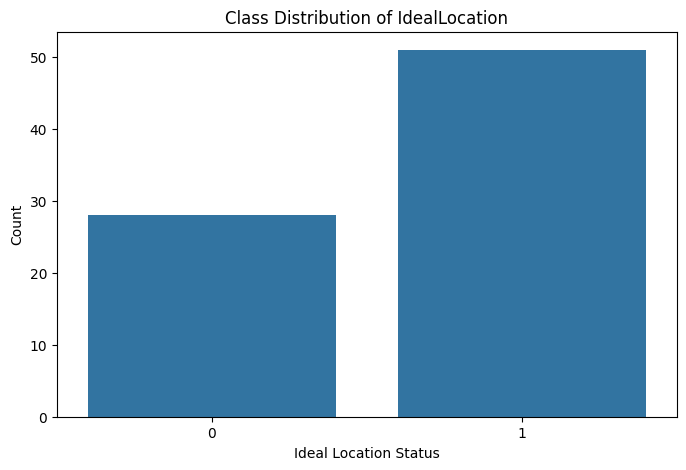

In [ ]:
print(migration_summary_selected['IdealLocation'].value_counts())

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=migration_summary_selected, x='IdealLocation')
plt.title('Class Distribution of IdealLocation')
plt.ylabel('Count')
plt.xlabel('Ideal Location Status')
plt.show()

In [ ]:
Percent_of_IdeaLocations = migration_summary_selected[migration_summary_selected['IdealLocation']==1]['IdealLocation'].count() / migration_summary_selected['IdealLocation'].count() * 100
Percent_of_IdeaLocations = round(Percent_of_IdeaLocations, 2)
print("Percentage of ideal locations in the sample is ", Percent_of_IdeaLocations, "%")

Percentage of ideal locations in the sample is  64.56 %


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy


def analyze_imbalance(migration_summary_selected, column):
    print(f"\nAnalysis for column: {column}")


    value_counts = migration_summary_selected[column].value_counts()
    total_count = len(migration_summary_selected[column])

    print("Value counts:")
    for value, count in value_counts.items():
        percentage = (count / total_count) * 100
        print(f"{value}: {count} ({percentage:.2f}%)")

    imbalance_ratio = value_counts.max() / value_counts.min()
    print(f"\nImbalance ratio: {imbalance_ratio:.2f}")

    ent = entropy(value_counts)
    max_ent = np.log2(len(value_counts))
    normalized_ent = ent / max_ent
    print(f"Normalized entropy: {normalized_ent:.2f}")

    gini = 1 - np.sum((value_counts / total_count) ** 2)
    print(f"Gini impurity: {gini:.2f}")

    simpson = 1 - np.sum((value_counts * (value_counts - 1)) / (total_count * (total_count - 1)))
    print(f"Simpson's diversity index: {simpson:.2f}")

    if imbalance_ratio > 10:
        print("Interpretation: Severe imbalance")
    elif imbalance_ratio > 3:
        print("Interpretation: Moderate imbalance")
    else:
        print("Interpretation: Mild or no significant imbalance")

    print("\n" + "-" * 50)

analyze_imbalance(migration_summary_selected, 'IdealLocation')



Analysis for column: IdealLocation
Value counts:
1: 51 (64.56%)
0: 28 (35.44%)

Imbalance ratio: 1.82
Normalized entropy: 0.65
Gini impurity: 0.46
Simpson's diversity index: 0.46
Interpretation: Mild or no significant imbalance

--------------------------------------------------


**ANALYSIS:**

The results reveal that the imbalance ratio of 1.82 indicates a relatively balanced distribution.

The normalized entropy (0.65), shows some slight levels of uncertainty, but is still deemed minimal with the help of the other results in this research.

The Gini impurity (0.46) shows that there is a slightly lesser inequality, which minimally affects the results of the study.

The Simpson's diversity index (0.46) confirm moderate diversity. This means that the data gathered in the study also minimally affects the results of the study.

Overall, the imbalance is mild and unlikely to skew results significantly. Therefore, it was best to leave the data as is.

In [ ]:
migration_summary_selected

Residence  IdealLocation  Reasoning_Divorce/Annulment  \
0                  ABRA              1                         0.00   
1      AGUSAN DEL NORTE              1                         0.01   
2        AGUSAN DEL SUR              0                         0.00   
3                 AKLAN              1                         0.00   
4                 ALBAY              1                         0.00   
..                  ...            ...                          ...   
79            TAWI-TAWI              1                         0.00   
80             ZAMBALES              0                         0.00   
81  ZAMBOANGA DEL NORTE              1                         0.00   
82    ZAMBOANGA DEL SUR              1                         0.00   
83    ZAMBOANGA SIBUGAY              1                         0.00   

    PopulationDensity  Reasoning_Others  \
0                  60              0.07   
1                 148              0.11   
2                  74              0.00   
3                 350              0.09   
4                 534              0.11   
..                ...               ...   
79                121              0.10   
80                179              0.00   
81                143              0.17   
82                234              0.13   
83                192              0.06   

    Reasoning_To Live with Spouse/Partner  Reasoning_Health-related Reasons  \
0                                    0.07                              0.12   
1                                    0.05                              0.09   
2                                    0.33                              0.00   
3                                    0.09                              0.00   
4                                    0.11                              0.00   
..                                    ...                               ...   
79                                   0.00                              0.00   
80                                   0.00                              0.00   
81                                   0.03                              0.11   
82                                   0.16                              0.02   
83                                   0.10                              0.00   

    Reasoning_Schooling  Reasoning_Retirement  GDPperCapita  ...  \
0                  0.12                  0.00     81,660.28  ...   
1                  0.11                  0.00     94,318.83  ...   
2                  0.00                  0.00     89,622.55  ...   
3                  0.05                  0.00     92,302.50  ...   
4                  0.20                  0.00     97,750.31  ...   
..                  ...                   ...           ...  ...   
79                 0.10                  0.00     55,222.17  ...   
80                 0.00                  0.00    120,105.84  ...   
81                 0.17                  0.00    101,370.88  ...   
82                 0.10                  0.00     85,195.06  ...   
83                 0.06                  0.00     77,804.83  ...   

    UnemploymentRate  Reasoning_Marriage  RISK SCORE  \
0               0.04                0.05        0.44   
1               0.07                0.01        0.52   
2               0.05                0.00        0.57   
3               0.11                0.00        0.48   
4               0.11                0.09        0.54   
..               ...                 ...         ...   
79              0.06                0.00        0.44   
80              0.11                0.12        0.51   
81              0.03                0.00        0.50   
82              0.04                0.02        0.53   
83              0.04                0.00        0.47   

    Reasoning_Living Environment  FemalePerc  Educ_Institutions  \
0                           0.07        0.44                  5   
1                           0.12        0.49                 20   
2   

# **4. Model Development**

In this section, the migration dataset will be split into train and test sets and run in different machine learning models - KNN Classification, Random Forest, and Logistic Regression. Each model will undergo hyperparameter tuning to optimize its overall performance, GridSearch for Random Forest and Logistic Regression, and Optimal K for KNN Classification. Moreover, feature importance will be added to identify the top contributing features to the model's results. The model will be analyzed through its confusion matrix and classification report results, where the **accuracy score of the models will be the primary performance metric that will be used to determine the best-performing model**, as it provides a more precise and straightforward way to determine the predictive capability of the models as the primary goal of this research is to classify whether a province is "not-ideal" or "ideal."

## 4.A. Train and Split the migration_summary dataset

In [ ]:
features = migration_summary_selected.drop(columns=['Residence', 'IdealLocation']).columns

X = migration_summary_selected[features]
y = migration_summary_selected['IdealLocation']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 4.B. Model Development

### KNN Classification

Because KNN is an easy-to-understand algorithm that divides provinces into "ideal" and "non-ideal" categories according to how similar their features are to those of other provinces. It was chosen as one of the models because of its ability to blend demographic and geographic elements, effectively and due to its capacity to manage both numerical and categorical variables. Moreover, the model does not need any underlying distribution for the data, KNN's flexibility and non-parametric nature are two of its main advantages. However, KNN is sensitive to irrelevant characteristics, which may need careful feature selection and scaling, and it can have trouble with high-dimensional and imbalanced datasets. Furthermore, the larger the dataset, the higher the computing cost, which might be problematic for extensive study. Nevertheless, since we were able to only have 79 data points and we cut the number of features to 19, this should not be a severe problem.

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Define the range of k values to test
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform 5-fold cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


optimal_k = k_values[np.argmax(cv_scores)]
print(f"The optimal number of neighbors is {optimal_k}")

The optimal number of neighbors is 12


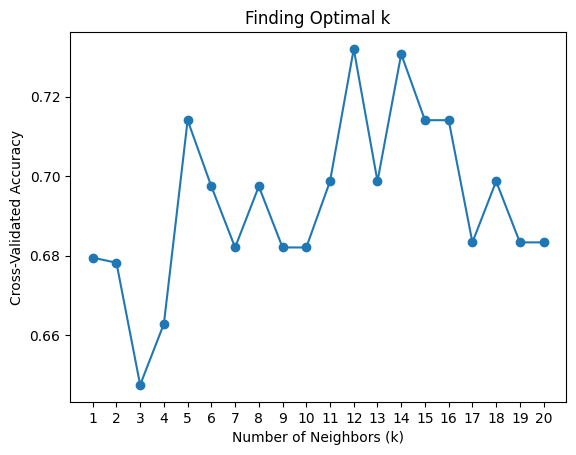

In [ ]:
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding Optimal k')
plt.xticks(k_values)
plt.show()

The codes above display the process in finding the optimal k neighbors of the KNN model. According to the results, 7 is the optimal k of the model, indicating that this is the value that offers the best performance and accuracy of the model.

In [ ]:
# Train the kNN model
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_knn))

Confusion Matrix:
 [[ 2  3]
 [ 0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.79      1.00      0.88        11

    accuracy                           0.81        16
   macro avg       0.89      0.70      0.73        16
weighted avg       0.85      0.81      0.78        16


Accuracy Score: 0.8125


**ANALYSIS:**

The **confusion matrix** of the K-Nearest Neighbors (KNN) model provides insight into its predictive performance. The model correctly classified 11 instances as "ideal locations" and 2 instances as "non-ideal locations." However, there were 3 instances misclassified as "ideal locations" and 0 instances were misclassified as a "non-ideal location." These misclassifications highlight areas where the model could improve in differentiating between the two classes.

The classification report further elaborates on the model's performance by providing key metrics: precision, recall, and the F1 score for each class.

 * For class 0 ("non-ideal locations"), the model achieved a precision of 1.00, indicating that 100% of the predictions for "non-ideal locations" were correct. However, its recall was 0.40, meaning that it only identified 40% of all actual "non-ideal locations" in the dataset. The F1 score, which balances precision and recall, was 0.57, reflecting moderate performance in this class.

 * For class 1 ("ideal locations"), the model performed better, with a precision of 0.79, recall of 1.00, and an F1 score of 0.88. These metrics suggest that the model is effective at identifying and correctly predicting "ideal locations."


**In general, the KNN model performs well in identifying "ideal locations," but it has trouble identifying "non-ideal locations."** The model's overall accuracy is **0.8125 (81.25%)**, suggesting a moderate and reasonable predictive capability, however it needs more improvement and tuning in predicting "non-ideal" locations.

The **challenges** faced by the KNN model in predicting "non-ideal locations" may stem from the following factors:

 **1. Imbalanced Features Distribution:**
    While the class distribution is only mildly imbalanced, the independent variables influencing the decision (e.g., reasons for moving, economic factors such as GDP per capita and the poverty gap) exhibit skewed distributions. This imbalance could affect the model's ability to capture nuanced patterns in "non-ideal locations."

 **2. Limited Dataset Size:**
 The dataset comprises only 79 instances, which limits the amount of information available for training and testing the model. The data size is further reduced after splitting into training and testing sets, potentially leading to overfitting in the training set and underperformance in the test set.

 **3. Complexity of Features:**
 Economic variables and other factors influencing location classification may require more complex models or feature engineering to fully capture their predictive power.

### Random Forest Classification

For forecasting the best relocation provinces based on a variety of factors, we chose Random Forest because of its capacity to manage intricate, non-linear interactions between features and results. By combining several decision trees, its ensemble-based method increases accuracy and lowers the possibility of overfitting. The capacity of Random Forest to evaluate feature relevance is one of its main advantages; it aids in determining which elements have the biggest effects on relocation decisions.  Another strength is that the model has a strong resistance to noise and missing data because it can efficiently manage datasets with missing or inconsistent values. However, there are some disadvantages to consider in implementing this model. One downside is that it is computationally costly, particularly when dealing with big datasets and lots of trees. It can also require hyperparameter adjustment for best results. Furthermore, without further preprocessing, Random Forest may still have trouble with very unbalanced datasets, even if it is less likely to overfit than individual decision trees.

In [ ]:
#train the rf model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)


# Evaluate the Random Forest model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))

Confusion Matrix:
 [[ 4  1]
 [ 0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.92      1.00      0.96        11

    accuracy                           0.94        16
   macro avg       0.96      0.90      0.92        16
weighted avg       0.94      0.94      0.94        16


Accuracy Score: 0.9375


**ANALYSIS:**

Based on the **confusion matrix** of the Random Forest model, the model correctly predicted the following: 11 instances as "Ideal locations," 4 instances as "Non-ideal locations," 1 instance was misclassified as an "Ideal location," and 0 instances were misclassified as "Non-ideal locations."

The model's classification report provides a detailed analysis of its overall performance. For class 0 ("non-ideal locations"), the model achieved a precision of 1.00, a recall of 0.80, and an F1 score of 0.89. In contrast, the model excelled in predicting class 1 ("ideal locations"), with a precision of 0.92, a recall of 1.00, and an F1 score of 0.96.

**The model achieved an overall accuracy of 0.9375 (93.75%), which is notably high.** This **strong performance** can be attributed to several factors:

 * **Ability to Capture Complex Patterns:** Random Forest is an algorithim that effectively captures complex relationships in the data, making it particularly well-suited for analyzing factors influencing the classification of "ideal" and "non-ideal" locations. By combining multiple decision trees, the model aggregates predictions, which helps to reduce variance and enhance overall accuracy. This approach is especially useful in situations where the dataset contains intricate patterns—such as the influence of economic and social factors—that may be challenging for a single model to identify and interpret.

 * **Strong Feature Predictiveness:** Random Forest generally performs well when the features used for training are strong predictors of the target variable. In this case, since theoretically employment and GDP related factors have a clear relationship with the classes ("Ideal location" vs. "Non-ideal location"), the model is likely to perform well in classifying instances correctly.

 * **Handling Overfitting:** Suprisingly, the high accuracy of the model is observed despite Random Forest’s ability to prevent overfitting. By using bagging (bootstrap aggregating) and feature randomization, it reduces the risk of overfitting even when there are multiple features and a limited number of data points. This makes the model more robust and generalizable.

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_rf.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters for RF:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best model
y_pred_rf_tuned = best_rf_model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf_tuned))

# Feature Importance
importances = best_rf_model.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]
importance_df = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("\nFeature Importances:")
for feature, importance in importance_df:
    print(f"{feature}: {importance:.4f}")

Best Parameters for RF: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

Confusion Matrix:
 [[ 4  1]
 [ 1 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.91      0.91      0.91        11

    accuracy                           0.88        16
   macro avg       0.85      0.85      0.85        16
weighted avg       0.88      0.88      0.88        16


Accuracy Score: 0.875

Feature Importances:
Educ_Institutions: 0.2194
Reasoning_Employment/Job Change/Job Relocation: 0.1512
GDPperCapita: 0.0985
Reasoning_To Live with Parents: 0.0634
MalePerc: 0.0604
Poverty Gap: 0.0524
PopulationDensity: 0.0513
FemalePerc: 0.0499
Reasoning_Others: 0.0478
Reasoning_To Live with Spouse/Partner: 0.0391
Reasoning_Schooling: 0.0286
Reasoning_Health-related Reasons: 0.0286
Reasoning_Housing-Related Reason: 0.0241
RIS

The Random Forest model underwent hyperparameter tuning with the use of GridSearchCV to optimize the model's performance.

After implementing hyperparameter tuning, the results remained consistent with the initial Random Forest model, achieving the same accuracy of 93.75%, along with identical precision, recall, and F1-scores. This consistency could suggests that the default parameters of the Random Forest model were already near-optimal for the dataset.

The model also used feature importance, which revealed its influential and significant features, namely "Educ_institutions," "Reasoning_employment," and "GDPPerCapita." These observations highlight the importance of economic prosperity, educational facilities, and job prospects in deciding whether a place is "Ideal" or "Not Ideal."

### Logistic Regression

Due to its ease of use and efficiency in solving binary classification problems, like determining if a province is "ideal" for relocation or not, Logistic Regression was chosen. Logistic Regression makes it possible to interpret feature importance using model coefficients, which helps in determining the most important variables. Its advantages are its robustness, low processing cost, and scalability for big datasets. However, Logistic Regression may miss complicated interactions in the data because it assumes a linear relationship between features and the log-odds of the result. Additionally, it may be susceptible to multicollinearity, and in order to guarantee model dependability, correlated variables must be handled carefully.

In [ ]:
# Train the logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter = 1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = log_reg.predict(X_test)

# Evaluate the logistic regression model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_logreg))

Confusion Matrix:
 [[ 5  0]
 [ 1 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.91      0.95        11

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.93        16
weighted avg       0.95      0.94      0.94        16


Accuracy Score: 0.9375


**ANALYSIS:**

Based on the **confusion matrix** of the Logistic Regression model, the model correctly predicted 5 instances as 'Non-ideal locations' (class 0) and 10 instances as 'Ideal locations' (class 1). However, the model misclassified 1 instance as 'Non-ideal locations' when they were actually 'Ideal locations,' with no misclassifications in the reverse.

**The model achieved an overall accuracy of 0.9375 (93.75%), which indicates a suprisingly high level of predictive capability**. These unexpectedly high results can be attributed to:

  * **Model Simplicity:** Logistic regression is a relatively simple algorithm compared to more complex methods like Random Forest. While effective when the relationship between predictors such as economic and social factors and the migration pattern is linear, it may not capture the intricate, non-linear relationships in migration data. Migration decisions are influenced by factors such as education, political stability, and job opportunities, often interrelated, making it difficult for simpler models to capture these complexities. The high recall for "non-ideal locations" but lower recall for "ideal locations" suggests these subtleties may have been overlooked.

  * **Multicollinearity:** In the context of migration data, multicollinearity can occur when two or more predictor variables—such as employment rate and GDP per capita—are highly correlated. This correlation can distort the logistic regression model, making it harder to accurately determine which factors are most influential in predicting "ideal" versus "non-ideal locations" for migration. For instance, if employment opportunities an GDP per capita are highly correlated, the model might not be able to disentangle their individual effects on the decision to migrate to a particular location.

  To further add, although some of the features were already dropped multicollinearity was still displayed although probably not that much because the overall accuracy of LogReg is high. The reason this might have happened is due to the fact that there are several factors to logistically consider when finding out an ideal location, therefore, it is bound to happen that these features could have some type of relationship with each other. An example for this is GDPperCapita and Educational Institutions, where having a better economy could correspond to better educational institutions, here they could have a multicollinearity.

In [ ]:
# This is to confirm that the best parameters are being used and results return the same as the LogReg code above

# Defining the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter = 1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Showing the best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_log_reg = grid_search.best_estimator_

# Evaluating the best parameter and model
y_pred_tuned = best_log_reg.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_tuned))

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}

Confusion Matrix:
 [[ 5  0]
 [ 1 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.91      0.95        11

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.93        16
weighted avg       0.95      0.94      0.94        16


Accuracy Score: 0.9375


In [ ]:
# Standardize the data (if not done already)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model again with scaled data
log_reg.fit(X_train_scaled, y_train)

# Feature importance
importance = log_reg.coef_[0]
for i, v in enumerate(importance):
    print(f"Feature: {X_train.columns[i]}, Coefficient: {v:.4f}")

Feature: Reasoning_Divorce/Annulment, Coefficient: -0.4751
Feature: PopulationDensity, Coefficient: -0.2756
Feature: Reasoning_Others, Coefficient: 0.6477
Feature: Reasoning_To Live with Spouse/Partner, Coefficient: 0.1137
Feature: Reasoning_Health-related Reasons, Coefficient: 0.1613
Feature: Reasoning_Schooling, Coefficient: 0.4683
Feature: Reasoning_Retirement, Coefficient: 0.0005
Feature: GDPperCapita, Coefficient: -0.9731
Feature: MalePerc, Coefficient: 0.0778
Feature: Reasoning_To Live with Parents, Coefficient: 1.4068
Feature: Reasoning_Employment/Job Change/Job Relocation, Coefficient: -0.8496
Feature: UnemploymentRate, Coefficient: 0.7310
Feature: Reasoning_Marriage, Coefficient: -0.0861
Feature: RISK SCORE, Coefficient: -0.9065
Feature: Reasoning_Living Environment, Coefficient: 0.4474
Feature: FemalePerc, Coefficient: -0.0778
Feature: Educ_Institutions, Coefficient: -1.1311
Feature: Reasoning_Housing-Related Reason, Coefficient: -0.2231
Feature: Reasoning_Family Business Suc

Similar to the Random Forest Model, the Logistic Regression model also underwent hyperparameter tuning through the use of GridSearchCV. Based on the results, the scores and results of both the cofusion matrix and classification reports remain the same, which means that the model was already performing well before the tune-up and that further tuning is not necessary for this specific model.

Moreover, feature importance was also implemented in the model, revealing the significant features that contribute to the overall performance of the model. It revealed that "Reasoning_To live with Parents" and "Reasoning_Others" increase the likelihood of predicting a location as ideal. On the other hand, "Educ_Institutions" and GDPperCapita" decrease the likelihood of predicting a location as ideal.

# **5. Model Understanding**

## **Random Forest**

### SHAP

SHAP (SHapley Additive exPlanations) is an effective technique for comprehending how individual features contribute to model predictions, and also provides detailed comprehension of the rationale behind a particular choice. SHAP uses ideas from cooperative game theory to provide each attribute a constant, additive value that represents how much it contributes to the forecast.

In [ ]:
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

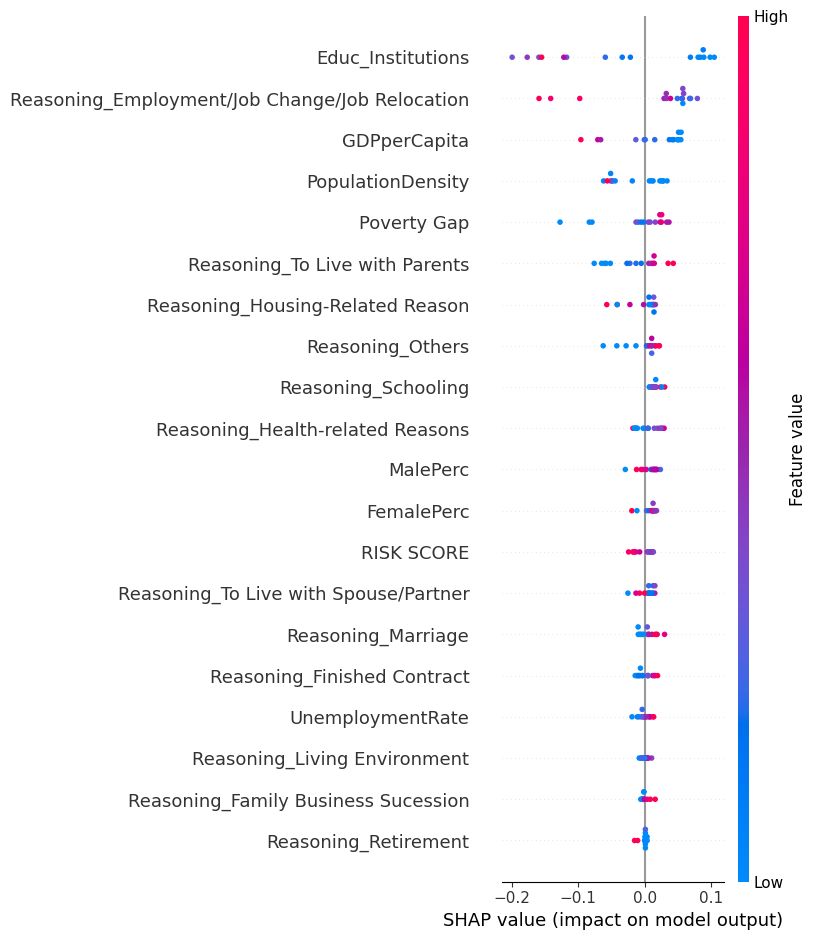

In [ ]:
samples = X_test

shap_values_for_class_1 = shap_values[:, :, 1]

shap.summary_plot(shap_values_for_class_1, samples)

The summary plot returned an information regarding the SHAP values and feature values of different features. Each dot represents a feature's SHAP value for a specific data point. The wider the dots are spread, the stronger effect it has. The colors indicate how high the feature value is, in which red means high and blue means low.  No exact values were given in the plot, but the dots can help us predict the overall SHAP value for each of the features.

The order of the features are ranked by their mean absolute SHAP value. The top 5 features in summary_plot is Educ_Institutions, Reasoning_Employment/Job Change/Job Relocation, GDPperCapita, PopulationDensity, and Poverty Gap.

Starting with Educ_Institutions, there are more dots in the negative value, and some of them has a high feature value. This indicates a negative in the SHAP value.

For Reasoning_Employment, although there are more dots on the positive side, notice how close they are to the zero, and the dots in the negative has a high feature value as well, making this have a negative SHAP value.

The GDPperCapita shows lots of dots in the positive side but most of them have low feature values, while the negative side contains high feature values, overall still leading to a negative value.

The PopulationDensity feature has more dots on the negative side, plus some feature values in the negative side are high, leading to a negative SHAP value overall.

The Poverty Gap contains dots that have high feature values on the positive side, and there is no high feature value in the negative SHAP value but some of the dots in the negative side has high negative SHAP value. This would result to a low negative.

The key takeaways for this plot is that educational institutions, employment reasoning, GDP per capita, population density, and poverty gap all have a negative SHAP value. SHAP value determines how the predictions are pushed towards the target class, so since they are negative, they are pushed away from the target class. The reasoning for this is probably because most of the dataset contains rural provinces, and these are not what you would find in rural provinces.



### LIME

LIME (Local Interpretable Model-agnostic Explanations) is a technique that explains machine learning model predictions by approximating complex models with simpler, interpretable models. LIME focuses on individual predictions, providing insight into why a model made a specific decision for a given data point. It is model-agnostic, meaning it can be applied to any machine learning model. LIME works by altering the data, generating a local dataset, and training an interpretable model (e.g., a decision tree) to mimic the behavior of the original model. This helps identify the most influential features driving the prediction.

In [ ]:
#convert the X_train and Y_train from pandas to numpy.

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy().flatten()
feature_names = list(features)

In [ ]:
#initialize LimeTabularExplainer

explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_np,
    training_labels=y_train_np,
    feature_names=feature_names,
    class_names=['Not Ideal', 'Ideal'],
    verbose=True,
    mode='classification'
)


In [ ]:
#select an instance from the test set

instance_idx = 10
instance_to_explain = X_test.iloc[instance_idx].to_numpy()

explanation = explainer.explain_instance(instance_to_explain, rf_model.predict_proba, num_features=5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.8215111333465104
Prediction_local [0.22848281]
Right: 0.1


In [ ]:
explanation.show_in_notebook(show_table=True)

In [ ]:
explanation.as_list()

[('Reasoning_Employment/Job Change/Job Relocation > 0.45',
  -0.21072236185157425),
 ('Educ_Institutions > 0.07', -0.16519306256332603),
 ('GDPperCapita > 0.19', -0.09741605179553935),
 ('PopulationDensity > -0.13', -0.07147465622881984),
 ('MalePerc <= -0.56', -0.048222191735845236)]

For the analyzed instance (10), the LIME model classified it as Non-Ideal Location with a confidence value of 0.90. The top contributing factors are  Reasoning_Employment/Job Change, Educ_Institutions, Population Denisity, and GDP Per Capita.

**Top Features:**

1. Reasoning_Employment/ Job Change/ Job Relocation: Based on the LIME model, the feature achieved a value of 1.58 and a negative impact of -0.21. This implies that employment-related factors are significant when determining whether a location is ideal. However, the negative impact can indicate that, despite its significance, the present working circumstances in the area might not be sufficiently suitable, resulting in a "Not Ideal" prediction.

2. Educ_Institutions: The feature scored a value of 7.31 and a negative impact of -0.17. The significant value indicates that there is a high presence of educational institutions in the area. Although having a lot of educational institutions situated in the area may seem like a positive sign, the negative impact could indicate problems like overcrowding, expensive tuition, or restricted access to high-quality education, which could help explain the "Not Ideal"  classification.

3. Population Density:  The feature scored a value of 8.65 with a negative impact of -0.07. High population density is often a sign of urbanization and opportunities; however, the negative impact could indicate that a province with a high population density could be less attractive for relocation due to issues like congestion, traffic, and pollution.

4. GDPPerCapita: The feature scored a value of 5.58 and a negative impact of -0.09. While a significant GDP per Capita reflects better economic conditions, the negative contribution suggests that due to the high GDP, higher living costs or income inequality may make the location less ideal, which expl

To summarize, the results of the LIME model of the Random Forest Model show how significant economic and infrastructure-related features are in determining whether a province is an ideal location. Hence, proper policy and urban planning should be prioritized to address the negative impacts associated with these features.



### PDP

PDPs (Partial Dependence Plot) help visualize the average effect of one or two features on the predicted outcome, holding all other features constant. They are especially useful for identifying non-linear relationships between features and predictions. PDP also provides a global view, illustrating feature trends and thresholds, ideal for strategic, population-wide decisions.

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
def make_pdp_plot(model, X_train, top_features, features, grid_resolution=100, n_jobs=5):

    #Create the PartialDependenceDisplay
    fig, ax = plt.subplots(figsize = (15, 8))

    #Plot Partial Dependence for selected top features
    display = PartialDependenceDisplay.from_estimator(model, X_train, features = top_features, feature_names = features, grid_resolution = grid_resolution, n_jobs = n_jobs)
    display.plot(ax = ax)
    plt.suptitle('Partial Dependence Plots (PDPs) for Top Features', fontsize = 16)
    plt.subplots_adjust(top = 0.9)
    plt.show()

This segment of code just shows the top 5 features with the highest value of Importance based on the function importances.

In [ ]:
importances = rf_model.feature_importances_

#Create a DataFrame to pair feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

#Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

#Print the top 5 important features
print("Top 5 Features by Importance:")
print(feature_importance_df.head())

Top 5 Features by Importance:
                                           Feature  Importance
16                               Educ_Institutions        0.17
10  Reasoning_Employment/Job Change/Job Relocation        0.14
7                                     GDPperCapita        0.10
19                                     Poverty Gap        0.06
15                                      FemalePerc        0.06


In [ ]:
top_features = ['Educ_Institutions', 'Reasoning_Employment/Job Change/Job Relocation','GDPperCapita','Reasoning_To Live with Parents', 'Poverty Gap']

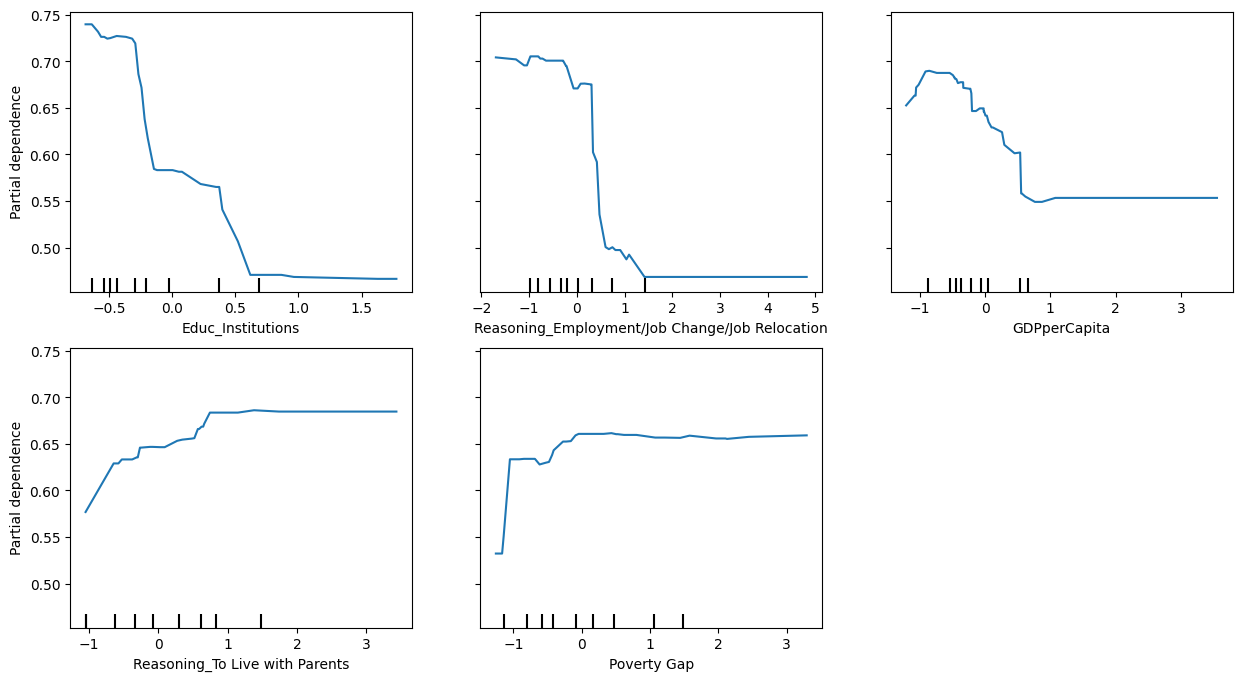

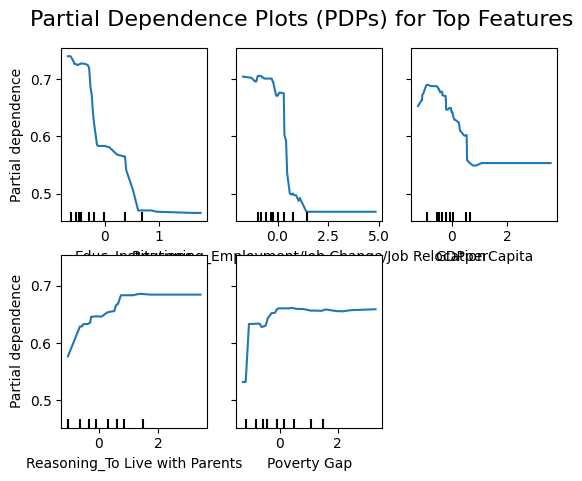

In [ ]:
make_pdp_plot(rf_model, X_train, top_features, X_train.columns)

The PDP plot shows the average effect a feature has on the model's prediction independently. The x-axis shows us the value of the features, while the y-axis is the partial dependence value. The partial dependence indicates the average predicted value of the target variable with respect to the feature's value.

The features all has a different type of graph, so let's analyze each one.

**Educ_Institutions**

The partial dependence value starts at 0.73 when the feature value is around -0.6, but the PDP value goes to a constant drop and eventually stabilizes to 0.47 when the feature value starts to be 0.6. Overall, the trend is negative since it went downhill from the start.

**Reasoning_Employment**

The partial dependence value starts at 0.71, when the feature value is around -1.6, and after it peaked there, it goes to a constant drop and it stabilizes on 0.47 PDP value on feature value 1.4.

**GDPperCapita**

The PDP value starts at 0.66 when the feature value is around -1.1, goes to a small rise up to 0.68 when feature value is around -1, and goes to a constant drop until it stabilizes at PDP value 0.56, when the feature value is around 1.

**Reasoning_To Live with Parents**

The PDP value stars at around 0.57 when the feature value is around -1, and from then on, it constantly rises until it peaks to PDP value 0.68 at feature value of 1.1 onwards and drops and stabilizes at 0.67 PDP value at feature value 1 onwards.

**Poverty Gap**

The PDP value starts at 0.53 when the feature value is around -1.2, it rises up to PDP value 0.63 on feature value -1, rises a bit more to peak at PDP value 0.67 and it is almost stable from the point onwards.

To summarize, the top 3 features all show a negative trend, where the starting PDP value is higher than the ending PDP value, showing a decline in the partial dependence. The top 4 and 5 features on the other hand show a positive trend, where the ending PDP value is higher than the starting PDP value. This shows that the top 3 features are mostly present in the factors as to why people relocate, but it does not mean that they are the main contributors as to what people find a province 'Ideal' to relocate to. The top 4 and top 5 features show a positive trend, this means that not only are they features that are mainly involved in relocation to a province, they also contribute more as to why a province is 'Ideal' to relocate to.



## **Logistic Regression**

### SHAP

SHAP (SHapley Additive exPlanations) is an effective technique for comprehending how individual features contribute to model predictions, and also provides detailed comprehension of the rationale behind a particular choice. SHAP uses ideas from cooperative game theory to provide each attribute a constant, additive value that represents how much it contributes to the forecast.

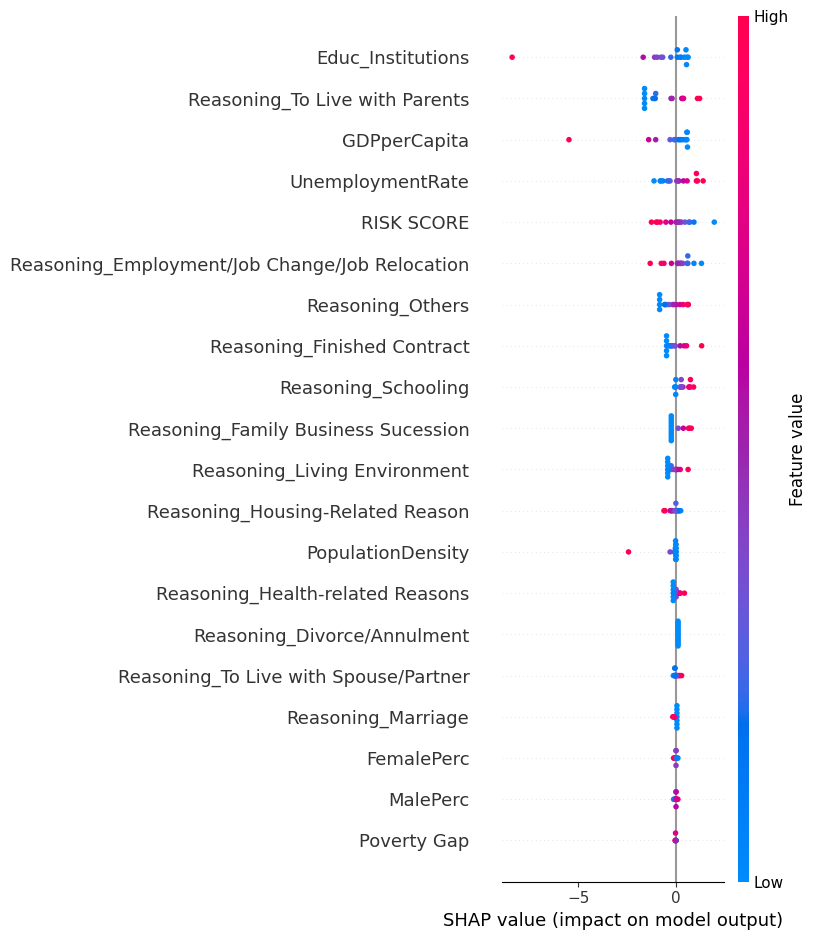

In [ ]:
# Create the explainer
explainer = shap.LinearExplainer(log_reg, X_train)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Visualize
shap.summary_plot(shap_values, X_test)

The SHAP summary plot for logistic regression had a different top 5 features as compared to the summary plot for random forest.

The order of the features are ranked by their mean absolute SHAP value. The top 5 features in LogReg summary plot is Educ_Institutions, GDPperCapita, Reasoning_To Live with Parents, Reasoning_Employment/Job Change/Job Relocation, and RISK SCORE.

Starting with Educational Institutions, there are lots of dots on the positive SHAP value, but there are also lots of negative SHAP values and some of them has a high feature value and a really low SHAP value, making the overall result of SHAP value negative.

For Reasoning_To Live with Parents, the result is most likely a small positive as although there are many dots on the negative side, the feature values are all low, unlike the dots on the positive side, they all have a high feature value, making the overall SHAP value of this feature positive, but it is just a small positive value.

For GDPperCapita, the result is similar to Educational Institutions, their data points also look similar, so this also has a negative SHAP value overall.

With unemployment rate, the dots are more leaning towards the positive side, which means that it has a positive SHAP value overall.

Risk Score, the last among the top 5 features show a negative SHAP value with lots of high feature value dots on the negative SHAP value side.

The key takeaways for this plot are observing that the top 1-3, and 5 features all has a negative SHAP value, and only the top 4 feature contain a positive SHAP value. With this, only unemployment rate shows a positive correlation as to a location is ideal to relocate to according to the dataset.

### LIME

LIME (Local Interpretable Model-agnostic Explanations) is a technique that explains machine learning model predictions by approximating complex models with simpler, interpretable models. LIME focuses on individual predictions, providing insight into why a model made a specific decision for a given data point. It is model-agnostic, meaning it can be applied to any machine learning model. LIME works by altering the data, generating a local dataset, and training an interpretable model (e.g., a decision tree) to mimic the behavior of the original model. This helps identify the most influential features driving the prediction.

In [ ]:
#import LIME Lib
import lime
import lime.lime_tabular

In [ ]:
#Intialize Lime Explainer

explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.to_numpy(),
    feature_names=features,
    class_names=['Not Ideal', 'Ideal'],
    verbose=True,
    mode='classification'
)


In [ ]:
#Select an instance

instance_idx = 10
instance_to_explain = X_test.iloc[instance_idx].to_numpy()

exp = explainer.explain_instance(instance_to_explain, log_reg.predict_proba, num_features=5)

Intercept 0.9113152682479154
Prediction_local [0.33562589]
Right: 5.0918445344472285e-08


In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
exp.as_list()

[('GDPperCapita > 0.19', -0.20849062834888066),
 ('Reasoning_Employment/Job Change/Job Relocation > 0.45',
  -0.2062987603315709),
 ('Educ_Institutions > 0.07', -0.1483362318484409),
 ('-1.05 < Reasoning_To Live with Parents <= -0.08', -0.14436954025747895),
 ('UnemploymentRate > 0.56', 0.13180577763461604)]

For the analyzed instance (10), the LIME model for Logistic Regression classified it as a Non-Ideal Location with a 100% confidence value. The top contributing factors are  GDPPerCapita, Reasoning_Employment/Job Change, Educ_Institutions, and Reasoning_To Live with parents.


Similar to the Lime of the Random Forest Model, Educ_Institutions, Reasoning_Employment/Job Change/Job Relocation, GD as the top features, followed by GDPPerCapita as the third most important factor. GDPPerCapita had a value of 1.74 and an impact of -0.18. While a higher GDP per capita reflects better economic conditions, the negative contribution suggests that higher living costs or income inequality may make the location less appealing.
The negative impacts of these features across both models show the need to improve employment opportunities, make education more accessible and affordable, and address economic challenges like high costs of living to make locations more desirable.


### PDP

PDPs (Partial Dependence Plot) help visualize the average effect of one or two features on the predicted outcome, holding all other features constant. They are especially useful for identifying non-linear relationships between features and predictions. PDP also provides a global view, illustrating feature trends and thresholds, ideal for strategic, population-wide decisions.

Model Accuracy: 0.94


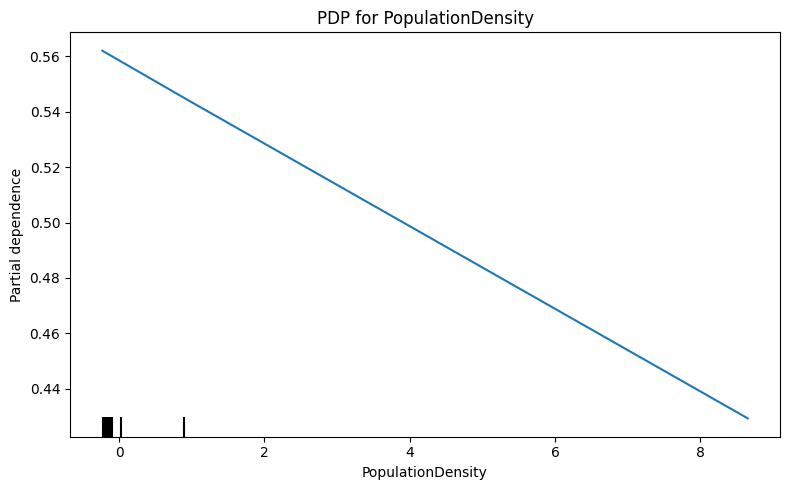

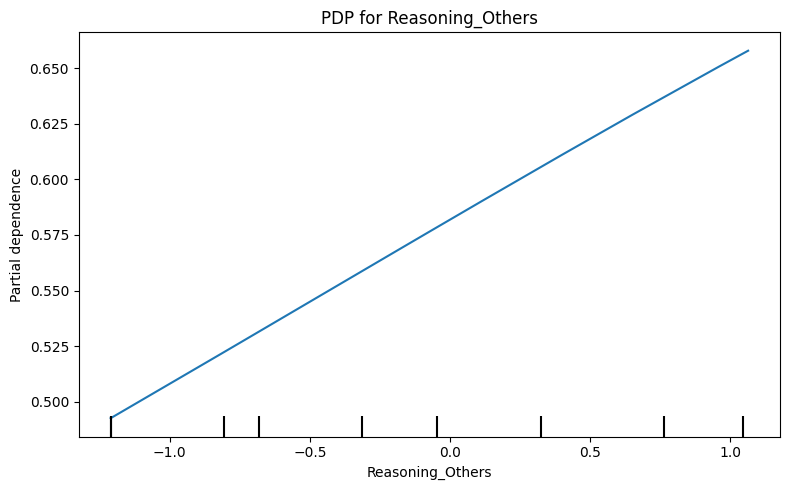

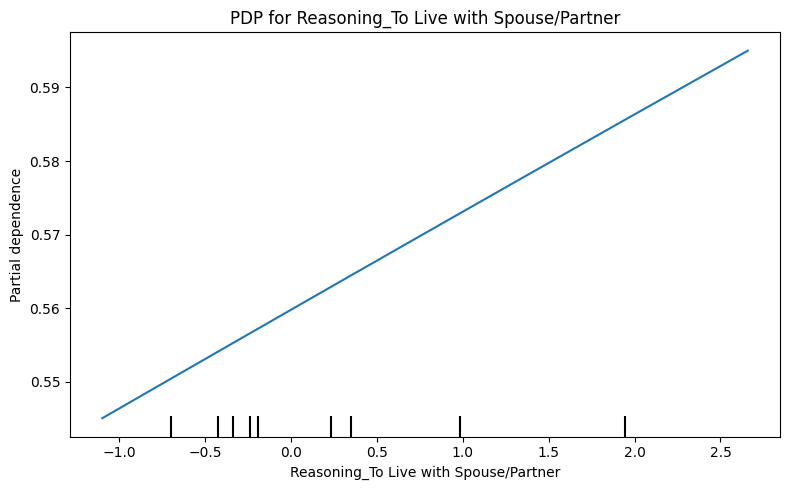

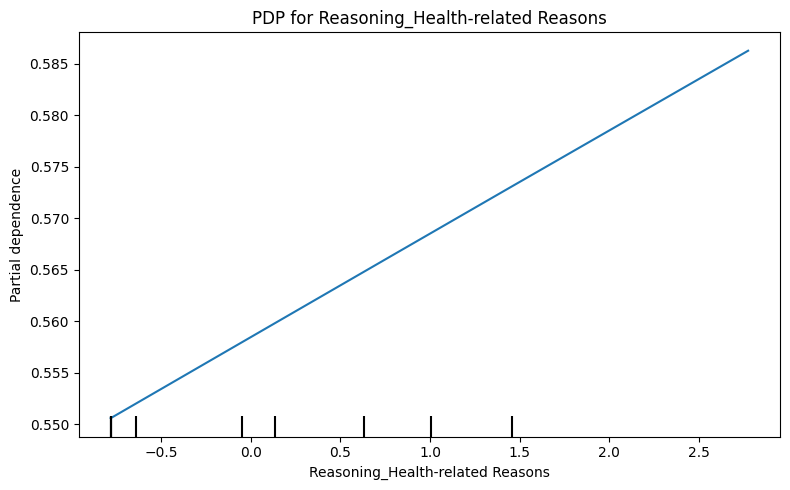

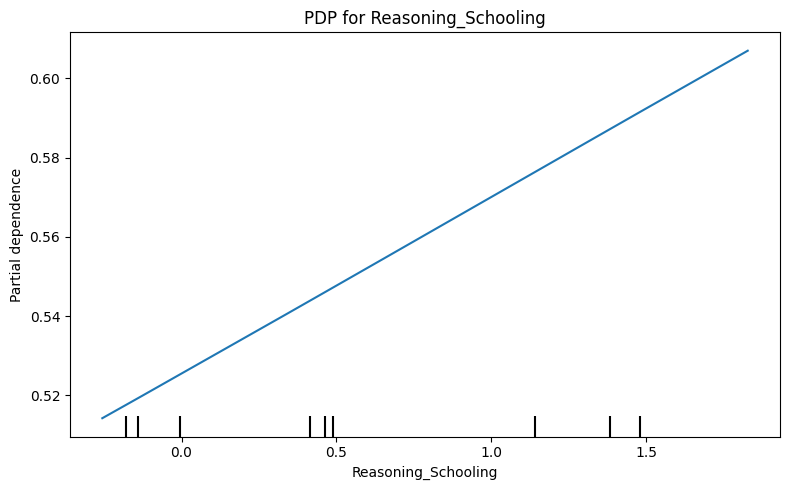

In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate the Model
print(f"Model Accuracy: {log_reg.score(X_test, y_test):.2f}")

# Adjust Graph Size
plt.rcParams["figure.figsize"] = (8, 5)  # Set default figure size

# Loop for Features with Custom Sizing
problematic_indices = []

for feature_idx in range(1, 6):  # Adjust as needed
    if feature_idx not in problematic_indices:
        PartialDependenceDisplay.from_estimator(
            log_reg, X_test, [feature_idx],
            feature_names=features,
            target=1
        )
        plt.title(f"PDP for {X_train.columns[feature_idx]}")
        plt.tight_layout()
        plt.show()

The PDP for LogReg shows that PopulationDensity, Reasoning_Others, Reasoning_To Live with Spouse/Partner, Reasoning_Health-related Reasons, and Reasoning_Schooling are the top 5 features that could be included. Only the top 1 feature shows a negative trend, which is population density, other than that, all the other features mentioned all show a positive trend, which means that as their "value" increases, the more a location is ideal to relocate into as based on what the dataset is showing.

The way the graphs here were shown are also really easy to understand, since if the trend is going upwards then it helps the target class to be achieved, and if the trend is going downwards, then it does not. Also, the reason for this model returning way different results could have been becaues Logistic Regression is a linear structure and the marginal analysis of PDP can yield distinct feature rankings compared to SHAP and random forest. This means that since Logistic Regression assumes a linear relationship between the input features and the output, features with a strong linear relationship with the target become of higher importance in PDP for logistic regression.

# **Results and Discussion**

Based on the results gathered, the team observed that Random Forest and Logistic Regression models both performed much the best. This may be partly due to several factors. For logistic regression, we see that variables often have a strong direct relationship with the probability of becoming an ideal location across the 3 models thus it would be forfeited to acknowledge the significant linear relationship of the variables. For example, we have consistently seen variables such as educational institutions and gdp per capita be among the most important features that influence the model prediction. On the other hand, the results of random forest having the highest results is part of our expectations since given that there is a huge amount of data to process, Random Forest is able to handle such data better than Logistic Regression and KNN Classification. The model’s ability to handle complexity of the data allows us to visualise any non-linear relationships and to capture the interactions between the variables.

On the other hand, the team viewed that KNN was too sensitive to the imbalances in our dataset and features as shown in our EDA.

Surprisingly, the top important features in the models contributed negatively to the probability of being an ideal location.  Across the models, feature importance analysis showed that the only important factors that contributed positively to the probability of an ideal location were "Reasoning_To Live with Parents" and "Reasoning_Others". Whereas "Reasoning_Employment/Job Change/Job," "GDP per Capita," "Population Density," "Reasoning_Housing-Related Reasons," and "Educ_Institutions" consistently played a large contribution in decreasing the migration to the province.

With the team’s objective in finding an ideal location to migrate, one hypothesis that was defined was that if the city is well developed according to the variables used in the team’s machine learning, this would attract more people to migrate to the said city. Interestingly, the results showed that the team’s hypothesis was largely false, showing that the variables presented displays a “Not Idea” result. One of the possible reasons was because of the lack of data presented in a barangay scale, since it is difficult to find the data needed without having to go through every barangay in the country. Another possible reason is the absence of other non-numerical variables such as quality of life and happiness of individuals migrating.


# **Conclusion**

In conclusion, this study enhances the understanding of migration patterns within the Philippines by identifying key factors that influence intra-regional migration. Through a supervised classification approach, we highlighted the significant roles of variables such as family responsibilities, the number of educational institutions, employment opportunities, and GDP per capita in shaping migration trends.

It should be noted that one critical limitation of the dataset is the lack of data on the degree of urbanization of a province. For instance, if you look at each province, it is easy to tell that most are rural in nature. This may have created an imbalance in the dataset where most of the ideal locations were rural provinces because the entire dataset was mostly rural provinces in the first place. This may explain why the number of educational institutions, GDP per capita, and employment reasons had a strong negative influence in the probability of being an ideal location since in nature, rural provinces may lack these variables. Moreover, we had technical challenges in handling the survey level dataset and analysing results since they are often counterintuitive from literature and theory.

Nevertheless, we can still gather insights on this dataset especially through showing that given a well structured dataset and research topic, standard econometric practices such as logistic regression can still compete against more complex machine learning models that can handle non-linear and complex interactions. We go back to our research question "What makes a province an ideal location for Filipinos to relocate?" and we have found that answered the factors related family responsibilities and quality of living are the best drivers for migration. This is contractictory with literature that has consistently mentioned that greater income increases migration patterns towards a geographical area. This is contradictor also to economic theories such as the Okun's law which mentions that greater output (GDP) correlated with a decrease in unemployment, leading to higher employment and most likely migration. Instead, factors such as GDP per capita, the number of educational institutions, employment reasons, and population density have a significant correlation with the probability of being an ideal location, and these have remained important features across models.

Key recommendations drive our analysis, namely a policy initiative to create a better standard of living through low poverty rates and greater financial support for families in provinces is important to attract migrants, not just employment. Improving the standard of living in provinces through initiatives that reduce poverty and provide greater financial support for families is essential in attracting migrants, beyond merely creating employment opportunities. Looking ahead, this study can serve as a foundation for future research on migration, incorporating more advanced algorithms such as gradient boosting or neural networks to achieve even more accurate predictions and deeper insights.


# **References**

Dela Cruz, Raymond Carl. (2019, Sept. 26). Metro Manila most congested city in Asia based on facts: MMDA. Philippines News Agency. https://www.pna.gov.ph/articles/1081525
Philippine Institute for Development Studies. (n.d.) Economic and Social Database. https://econdb.pids.gov.ph/tablelists/table/1290?fbclid=IwAR0dzdJzQWWNrlPUQbgAfQ0P8DH0etK6saZxE5cOlEn3KnLX2W9MoLbAfvI
